# Initialize


This notebook runs on **tsz_likelihood_mpi kernel**. 

Plase it in a repository called **tsz_likelihood**. And then cd there:

```
$ cd  /path/to/tsz_likelihood
```


## Activating the environment in a terminal

```
$ source /path/to/tsz_likelihood/pyvenv/tsz_likelihood_mpi/bin/activate
```

## Install class_sz


We use class_sz to make theory predictions. If not installed, uncomment the code below and execute the cell in code mode.


```
project_dir = os.path.abspath("")
os.chdir(project_dir)
!pip install mcfit
!pip install cosmopower
!git clone https://github.com/CLASS-SZ/class_sz.git
%cd class_sz
!mv Makefile Makefile_os
!mv Makefile_linux Makefile
!make clean
!make -j
%cd python
!pip install -e .
%cd classy_szfast
!pip install -e .
os.chdir(project_dir)
!mkdir cosmopower-organization
%cd cosmopower-organization
!git clone https://github.com/cosmopower-organization/lcdm.git
!git clone https://github.com/cosmopower-organization/mnu.git
!git clone https://github.com/cosmopower-organization/neff.git
!git clone https://github.com/cosmopower-organization/wcdm.git
!git clone https://github.com/cosmopower-organization/reactemu-fr.git

# Define the new value you want to set for path_to_cosmopower_organization
new_value = project_dir + '/cosmopower-organization/'

# Define the path to the config.py file
config_file_path = project_dir +'/class_sz/python/classy_szfast/classy_szfast/config.py' 

# Read the content of the config.py file
with open(config_file_path, 'r') as file:
    lines = file.readlines()

# Iterate through the lines and look for the exact line to modify
for i, line in enumerate(lines):
    if line.strip() == "path_to_cosmopower_organization = 'cosmopower-organization/'":
        lines[i] = f"path_to_cosmopower_organization = '{new_value}'\n"

# Write the modified content back to the file
with open(config_file_path, 'w') as file:
    file.writelines(lines)
```

# Test installations<a id="Test_installations"></a>

In [18]:
# import nemo
# import yaml
from classy_sz import Class
# import pyccl
# import astropy.io.fits as pyfits
# from astLib import astWCS, astImages
# import nemo
# from nemo.maps import simCMBMap
# import pixell
# from pixell import reproject, utils, curvedsky
# from pixell.enplot import *
# from enlib import enplot
# import enlib
# def eshow(x,**kwargs): 
#     ''' Define a function to help us plot the maps neatly '''
#     plots = enplot.get_plots(x, **kwargs)
#     enplot.show(plots, method = "ipython")
# from astropy.io import fits

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import scipy
# from scipy.interpolate import interp1d

# import healpy as hp

## Example of a sz-counts calculation with class_sz

In [62]:
%%time
from classy_sz import Class

M = Class()

M.set({
'output': 'sz_cluster_counts',

'mass function'  : 'T08M200c',
# 'mass function'  : 'M500',
'concentration parameter' : 'B13',
    
'h': 0.68,
'n_s': 0.965,
'Omega_b': 0.049,      
'Omega_cdm': 0.26, 
'sigma8': 0.81,
'tau_reio' : 0.06,
    
'z_min': 0.,
'z_max': 2.,
'redshift_epsrel': 1e-4,
'redshift_epsabs': 1e-100,    
    

    
'M_min': 5e13*0.68,
'M_max': 1e16*0.68,
'mass_epsrel':1e-4,
'mass_epsabs':1e-100,
'ndim_redshifts':50, 
# 'ndim_masses' : 100,


    
'has_selection_function' : 1,
'experiment' : 1, # Planck: 0 / ACT or SO: 1
'y_m_relation' : 1, # ycenter : 1, # y500 : 0
'signal-to-noise_cut-off_for_survey_cluster_completeness' : 5.,

'sz_selection_function_thetas_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/class_sz/class_sz_auxiliary_files/nemo_sim_thetas_030722_49bins.txt',
'sz_selection_function_skyfracs_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/class_sz/class_sz_auxiliary_files/nemo_sims_skyfracs_030722_49bins.txt',
'sz_selection_function_ylims_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/class_sz/class_sz_auxiliary_files/nemo_sim_ylims_030722_49bins.txt',    

'bin_z_min_cluster_counts' : 0.,
'bin_z_max_cluster_counts' : 2.,
'bin_dz_cluster_counts' : 0.1,

'bin_dlog10_snr' : 0.25,
'log10_snr_min' : np.log10(5.),
'log10_snr_max' : 2.,



'dlny' : 0.01,
'lnymin' : -13., # planck  -11.5 so/act -11
'lnymax' : -3.,  # planck 10. so/act -5
'dlnM_cluster_count_completeness_grid' : 0.005,


'cluster_count_completeness_grid_z_cutoff_low' : 0.4,
'cluster_count_completeness_grid_z_cutoff_mid' : 1.,

'dz_cluster_count_completeness_grid_low_z' : 1e-3,
'dz_cluster_count_completeness_grid_mid_z' : 1e-2,
'dz_cluster_count_completeness_grid_high_z' : 1e-1,



'mass_epsrel_cluster_counts' : 1e-6,
'mass_epsabs_cluster_counts' : 1e-40,

'redshift_epsrel_cluster_counts' : 1e-4,
'redshift_epsabs_cluster_counts' : 1e-40,

    

'A_ym'  : 1.9e-05,
'B_ym'  : 0.08,
'C_ym' : 0.,
'sigmaM_ym' : 0.173,
'm_pivot_ym_[Msun]' : 4.25e14,

'use_m500c_in_ym_relation' : 0,
'use_planck_binned_proba' : 0, #use diff of erfs
'use_skyaveraged_noise': 0, # this will speed-up everything

'szcc_dof': 3.,
'szcc_qtrunc': 2.,
# 'szcc_dof': 0.,
# 'szcc_qtrunc': 0.,
        })
        
M.compute_class_szfast()


CPU times: user 24.1 s, sys: 140 ms, total: 24.2 s
Wall time: 4.21 s


In [63]:
dNdzdy_theoretical = M.dndzdy_theoretical()['dndzdy']
z_center = M.dndzdy_theoretical()['z_center']
z_edges = M.dndzdy_theoretical()['z_edges']
log10y_center = M.dndzdy_theoretical()['log10y_center']
log10y_edges = M.dndzdy_theoretical()['log10y_edges']

N_z,N_y = np.shape(dNdzdy_theoretical)
N_clusters_z_theory = []
for iz in range(N_z):
    N_clusters_z_theory.append(np.sum(dNdzdy_theoretical[iz][0:]))
N_clusters_y_theory = []

for iy in range(N_y):
    N_clusters_y_theory.append(np.sum(np.asarray(dNdzdy_theoretical)[:,iy]))
    
# print total number of clusters: 
np.sum(N_clusters_z_theory)

3663.1632632457054

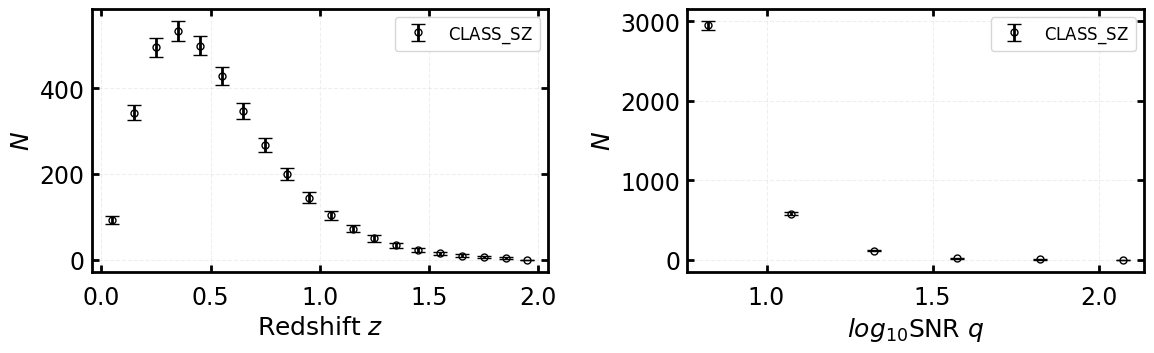

In [64]:

label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')

ax.errorbar(z_center,N_clusters_z_theory,yerr=np.sqrt(N_clusters_z_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            label=r'$\mathrm{CLASS\_SZ}$',capsize=5,c='k')

ax.set_xlabel(r'$\mathrm{Redshift}$ $z$',size=title_size)
ax.set_ylabel(r'$N$',size=title_size)
ax.legend(loc=1,frameon=True,fontsize=12)


ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')


ax.errorbar(log10y_center,N_clusters_y_theory,yerr=np.sqrt(N_clusters_y_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            label=r'$\mathrm{CLASS\_SZ}$',capsize=5,c='k')

ax.set_xlabel(r'$log_{10}\mathrm{SNR}$ $q$',size=title_size)
ax.set_ylabel(r'$N$',size=title_size)


# plt.grid()
ax.legend(loc=1,frameon=True,fontsize=12)
fig.tight_layout()
plt.show()

## unbinned calculation

In [65]:
%%time
M = Class()


szcounts_param ={
'output': 'sz_cluster_counts_fft',
    
'mass function'  : 'T08M200c',
# 'mass function'  : 'M500',
'concentration parameter' : 'B13',
    
'h': 0.68,
'n_s': 0.965,
'Omega_b': 0.049,      
'Omega_cdm': 0.26, 
'sigma8': 0.81,
'tau_reio' : 0.06,
    
# 'z_min': 0.,
# 'z_max': 2.,
'redshift_epsrel': 1e-4,
'redshift_epsabs': 1e-100,    
    

    
'M_min': 5e13*0.68,
'M_max': 1e16*0.68,
'mass_epsrel':1e-4,
'mass_epsabs':1e-100,
'ndim_redshifts':100, 
# 'ndim_masses' : 100,


    
'has_selection_function' : 1,
'experiment' : 1, # Planck: 0 / ACT or SO: 1
'y_m_relation' : 1, # ycenter : 1, # y500 : 0
'signal-to-noise_cut-off_for_survey_cluster_completeness' : 5.,

'sz_selection_function_thetas_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/class_sz/class_sz_auxiliary_files/nemo_sim_thetas_030722_49bins.txt',
'sz_selection_function_skyfracs_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/class_sz/class_sz_auxiliary_files/nemo_sims_skyfracs_030722_49bins.txt',
'sz_selection_function_ylims_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/class_sz/class_sz_auxiliary_files/nemo_sim_ylims_030722_49bins.txt',    
     
    
# 'bin_z_min_cluster_counts' : 0.,
# 'bin_z_max_cluster_counts' : 2.,
# 'bin_dz_cluster_counts' : 0.1,

# 'bin_dlog10_snr' : 0.25,
# 'log10_snr_min' : 0.6,
# 'log10_snr_max' : 2.,



# # 'dlny' : 0.01,
# # 'lnymin' : -13., # planck  -11.5 so/act -11
# # 'lnymax' : -3.,  # planck 10. so/act -5
# # 'dlnM_cluster_count_completeness_grid' : 0.005,


# # 'cluster_count_completeness_grid_z_cutoff_low' : 0.4,
# # 'cluster_count_completeness_grid_z_cutoff_mid' : 1.,

# # 'dz_cluster_count_completeness_grid_low_z' : 1e-3,
# # 'dz_cluster_count_completeness_grid_mid_z' : 1e-2,
# # 'dz_cluster_count_completeness_grid_high_z' : 1e-1,



# # 'mass_epsrel_cluster_counts' : 1e-6,
# # 'mass_epsabs_cluster_counts' : 1e-40,

# # 'redshift_epsrel_cluster_counts' : 1e-4,
# # 'redshift_epsabs_cluster_counts' : 1e-40,

    

'A_ym'  : 1.9e-05,
'B_ym'  : 0.08,
'C_ym' : 0.,
'sigmaM_ym' : 0.173,
'm_pivot_ym_[Msun]' : 4.25e14,

'use_m500c_in_ym_relation' : 0,
# 'use_planck_binned_proba' : 0, #use diff of erfs
'use_skyaveraged_noise': 0, # this will speed-up everything
    
    
'N_samp_fftw' : 2048,
# 'N_samp_fftw' : 8192,

'szcounts_fft_nz' : 250,

'z_min' : 0.0,
'z_max' : 2.0,
    
'szcounts_fft_z_min' : 0.0,
'szcounts_fft_z_max' : 2.0,
    
    
    
'tol_dlnm_dlnq':0.001,
'ntab_dlnm_dlnq':1000, # fiducial 1000

'szcounts_qmax_fft_padded':500.,
    
'sigma_derivative' : 0,
'szcc_dof': 3.,
'szcc_qtrunc':2.,
# 'szcc_dof': 0.,
# 'szcc_qtrunc':0.,

        }
M.set(szcounts_param)
        
M.compute_class_szfast()

CPU times: user 37.6 s, sys: 706 ms, total: 38.3 s
Wall time: 4.93 s


In [66]:
szcounts = M.szcounts_ntot_rates_loglike()
print(szcounts['ntot'],szcounts['loglike'])

3718.3405180639256 -1377.3147368515183


In [67]:
zmin = szcounts_param['szcounts_fft_z_min']
zmax = szcounts_param['szcounts_fft_z_max']
nz = szcounts_param['szcounts_fft_nz']
z_arr = np.linspace(zmin,zmax,nz)

q_threshold = 5.
q_max = 100.
nq = 5000
# q_arr = np.linspace(q_threshold, q_max,nq)
q_arr = np.geomspace(q_threshold, q_max,nq)
dq = (q_max-q_threshold)/(nq-1.)
dz = (zmax - zmin)/(nz-1.)
get_dndzdq = np.vectorize(M.get_szcounts_dndzdq_at_z_q)
Nz = []
for zp in z_arr:
    Nz.append(np.trapz(get_dndzdq(zp,q_arr)*q_arr,x=np.log(q_arr)))
Nz = np.asarray(Nz)
Nq = []
for qp in q_arr:
    Nq.append(np.trapz(get_dndzdq(z_arr,qp),x=z_arr))
    # Nq.append(np.sum(get_dndzdq(z_arr,qp)*dz))
Nq = np.asarray(Nq)
Ntot = np.trapz(Nz,x=z_arr)
# Ntot = np.sum(Nz)*dz
Ntot

3718.058750937373

In [68]:

z_edges_low = z_edges[:-1]
z_edges_high = z_edges[1:]
Nz_binned = []
# Nz_cnc_binned = []
# z_cnc,dnz_cnc = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/cnc/test_files/n_z.txt',unpack=True)
for (zm,zp) in zip(z_edges_low,z_edges_high):
    z_arr_bin = np.linspace(zm,zp,50)
    Nz_in = []
    for zpbin in z_arr_bin:
        Nz_in.append(np.trapz(get_dndzdq(zpbin,q_arr)*q_arr,x=np.log(q_arr)))
    Nz_binned.append(np.trapz(Nz_in,x=z_arr_bin))
    # dnz_cnc_interp = np.interp(z_arr_bin,z_cnc,dnz_cnc)
    # Nz_cnc_binned.append(np.trapz(dnz_cnc_interp,x=z_arr_bin))
Nz_binned = np.asarray(Nz_binned)

In [69]:
# log10y_edges

In [70]:

q_edges_low = log10y_edges[:-1]
q_edges_low[0] = np.log10(5.)
q_edges_high = log10y_edges[1:]
Nq_binned = []
# Nq_cnc_binned = []
# q_cnc,dnq_cnc = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/cnc/test_files/n_q.txt',unpack=True)

for (qm,qp) in zip(q_edges_low,q_edges_high):
    q_arr_bin = np.linspace(qm,qp,50)
    Nq_in = []
    for qpbin in q_arr_bin:
        Nq_in.append(np.trapz(get_dndzdq(z_arr,10**qpbin),x=z_arr))
    Nq_binned.append(np.trapz(Nq_in,x=10**q_arr_bin))
    # dnq_cnc_interp = np.interp(10**q_arr_bin,q_cnc,dnq_cnc)
    # Nq_cnc_binned.append(np.trapz(dnq_cnc_interp,x=10**q_arr_bin))
Nq_binned = np.asarray(Nq_binned)

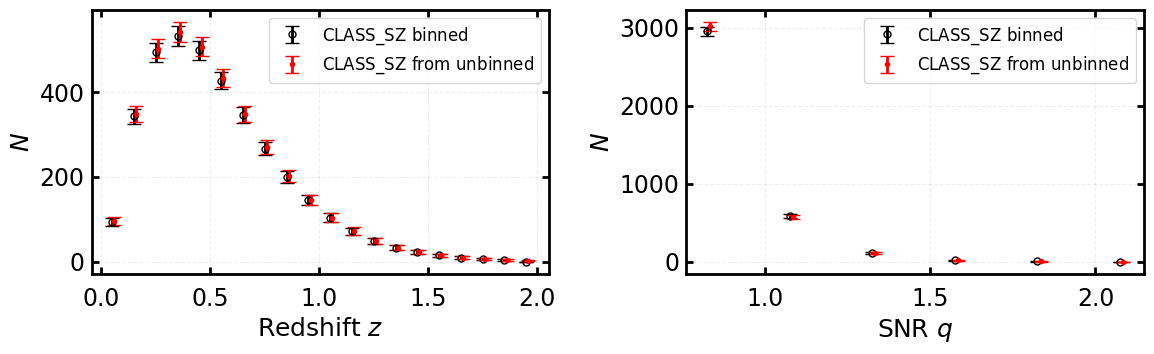

In [71]:

label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
# ax.set_xlabel(r'$\theta$ [arcminute]',size=title_size)
# ax.set_ylabel(r'$\gamma_t(\theta)$',size=title_size)
# ax.set_xscale('log')
# ax.set_yscale('log')

ax.errorbar(z_center,N_clusters_z_theory,yerr=np.sqrt(N_clusters_z_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,binned}$',capsize=5,c='k')
ax.errorbar(np.asarray(z_center)+0.01,Nz_binned,yerr=np.sqrt(Nz_binned),marker='o',markersize=3.,ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,from\,\,unbinned}$',capsize=5,c='red')
# ax.errorbar(np.asarray(z_center)+0.02,Nz_cnc_binned,yerr=np.sqrt(Nz_cnc_binned),
#             marker='*',
#             markersize=8.,
#             # markerfacecolor=None,
#             fillstyle='none',
#             ls='none',
#             label=r'$\mathrm{CNC\,\,from\,\,unbinned\,\,no\,\,opt\,\,bias}$',capsize=5,c='blue')

ax.set_xlabel(r'$\mathrm{Redshift}$ $z$',size=title_size)
ax.set_ylabel(r'$N$',size=title_size)


# plt.grid()
ax.legend(loc=1,frameon=True,fontsize=12)
# ax.set_ylim(0.,250.)

ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
# ax.set_xlabel(r'$\theta$ [arcminute]',size=title_size)
# ax.set_ylabel(r'$\gamma_t(\theta)$',size=title_size)
# ax.set_xscale('log')
# ax.set_yscale('log')

ax.errorbar(log10y_center,N_clusters_y_theory,yerr=np.sqrt(N_clusters_y_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,binned}$',capsize=5,c='k')
ax.errorbar(np.asarray(log10y_center)+0.01,Nq_binned,yerr=np.sqrt(Nq_binned),marker='o',markersize=3.,ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,from\,\,unbinned}$',capsize=5,c='red')
# ax.errorbar(np.asarray(log10y_center)+0.020,Nq_cnc_binned,yerr=np.sqrt(Nq_cnc_binned),
#             marker='*',
#             markersize=8.,
#             # markerfacecolor=None,
#             fillstyle='none',
#             ls='none',label=r'$\mathrm{CNC\,\,from\,\,unbinned\,\,no\,\,opt\,\,bias}$',capsize=5,c='blue')

ax.set_xlabel(r'$\mathrm{SNR}$ $q$',size=title_size)
ax.set_ylabel(r'$N$',size=title_size)


# plt.grid()
ax.legend(loc=1,frameon=True,fontsize=12)
fig.tight_layout()
# plt.savefig('N_of_z_N_of_q.pdf')
# ax.set_ylim(0.,1000.)
plt.show()

# Creating selection function files for theory predictions

## first step: read-in nemo files and downsample

The folllowing code can be found in the clusters.py file of soliket. 


```
        filename_Q, ext = os.path.splitext(self.datafile_Q)
        datafile_Q_dwsmpld = os.path.join(self.data_directory,
            filename_Q + 'dwsmpld_nbins={}'.format(self.selfunc['dwnsmpl_bins']) + '.npz')

        if os.path.exists(datafile_Q_dwsmpld):
            Qfile = np.load(datafile_Q_dwsmpld)
            self.Q = Qfile['Q_dwsmpld']
            self.tt500 = Qfile['tt500']
            self.log.info("Down-sampled Q funcs exists. Number of Q funcs = {}.".format(len(self.Q[0])))

        else:
            self.log.info("Reading in full Q function.")
            tile_info = np.genfromtxt(os.path.join(self.data_directory, self.data['tile_file']), dtype=str)

            # removing tiles with zero areas
            tile_area0 = tile_info[:, 1]
            zero_index = np.where(tile_area0 == '0.000000')[0]
            tile_area = np.delete(tile_info, zero_index, 0)

            tile_name = tile_area[:, 0]
            QFit = nm.signals.QFit(QFitFileName=os.path.join(self.data_directory, self.datafile_Q),
                                   tileNames=tile_name, QSource=self.selfunc['whichQ'], selFnDir=self.data_directory+'/selFn')
            Nt = len(tile_name)
            self.log.info("Number of tiles = {}.".format(Nt))
            self.tname = file_rms['tileName']

            hdulist = fits.open(os.path.join(self.data_directory, self.datafile_Q))
            data = hdulist[1].data
            tt500 = data.field("theta500Arcmin")

            # reading in all Q functions
            allQ = np.zeros((len(tt500), Nt))
            for i in range(Nt):
                allQ[:, i] = QFit.getQ(tt500, tileName=tile_name[i])
            assert len(tt500) == len(allQ[:, 0])
            self.tt500 = tt500
            self.Q = allQ

            # # fiddling Q fit using injection Q ---------------------------------
            #
            # if self.selfunc['Qtest'] == True:
            #
            #     injQFit = nm.signals.QFit(QFitFileName=os.path.join(self.data_directory, self.datafile_Q),
            #                             tileNames=tile_name, QSource='injection', selFnDir=self.data_directory+'/selFn')
            #
            #     injQ = np.zeros(len(tt500))
            #     injQ = injQFit.getQ(tt500, tileName=tile_area[:, 0][0])
            #
            #     meanQ = np.average(allQ, axis=1)
            #     fac = injQ / meanQ
            #     fac_arr = np.repeat(fac[:, np.newaxis], allQ.shape[1], axis=1)
            #
            #     self.Q = allQ * fac_arr
            #
            # #-------------------------------------------------------------------


        filename_rms, ext = os.path.splitext(self.datafile_rms)
        filename_tile, ext = os.path.splitext(self.datafile_tile)
        datafile_rms_dwsmpld = os.path.join(self.data_directory,
                filename_rms + 'dwsmpld_nbins={}'.format(self.selfunc['dwnsmpl_bins']) + '.npz')
        datafile_tiles_dwsmpld = os.path.join(self.data_directory,
                filename_tile + 'dwsmpld_nbins={}'.format(self.selfunc['dwnsmpl_bins']) + '.npy')

        if os.path.exists(datafile_rms_dwsmpld):
            rms = np.load(datafile_rms_dwsmpld)
            self.noise = rms['noise']
            self.skyfracs = rms['skyfracs']
            self.log.info("Down-sampled RMS table exists. Number of RMS bins = {}.".format(self.skyfracs.size))

            self.tiles_dwnsmpld = np.load(datafile_tiles_dwsmpld, allow_pickle='TRUE').item()

        else:

            self.log.info("Reading in full RMS table.")

            self.noise = file_rms['y0RMS']
            self.skyfracs = file_rms['areaDeg2'] * np.deg2rad(1.) ** 2
            self.log.info("Number of RMS values = {}.".format(self.skyfracs.size))
            self.log.info("Down-sampling RMS and Q function using {} bins.".format(self.selfunc['dwnsmpl_bins']))
            binned_stat = stats.binned_statistic(self.noise, self.skyfracs, statistic='sum',
                                                       bins=self.selfunc['dwnsmpl_bins'])
            binned_area = binned_stat[0]
            binned_rms_edges = binned_stat[1]

            bin_ind = np.digitize(self.noise, binned_rms_edges)
            tiledict = dict(zip(tile_name, np.arange(tile_area[:, 0].shape[0])))

            Qdwnsmpld = np.zeros((self.Q.shape[0], self.selfunc['dwnsmpl_bins']))
            tiles_dwnsmpld = {}

            for i in range(self.selfunc['dwnsmpl_bins']):
                tempind = np.where(bin_ind == i + 1)[0]
                if len(tempind) == 0:
                    #self.log.info('Found empty bin.')
                    Qdwnsmpld[:, i] = np.zeros(self.Q.shape[0])
                else:
                    #print('dowsampled rms bin ',i)
                    temparea = self.skyfracs[tempind]
                    #print('areas of tiles in bin',temparea)
                    temptiles = self.tname[tempind]
                    #print('names of tiles in bin',temptiles)
                    for t in temptiles:
                        tiles_dwnsmpld[t] = i

                    test = [tiledict[key] for key in temptiles]
                    Qdwnsmpld[:, i] = np.average(self.Q[:, test], axis=1, weights=temparea)

            self.noise = 0.5*(binned_rms_edges[:-1] + binned_rms_edges[1:])
            self.skyfracs = binned_area
            self.Q = Qdwnsmpld
            self.tiles_dwnsmpld = tiles_dwnsmpld

            self.log.info("Number of down-sampled RMS = {}.".format(self.skyfracs.size))
            self.log.info("Number of down-sampled Q funcs = {}.".format(len(self.Q[0])))

            assert self.noise.shape[0] == self.skyfracs.shape[0] and self.noise.shape[0] == self.Q.shape[1]

            if self.selfunc['save_dwsmpld']:
                np.savez(datafile_Q_dwsmpld, Q_dwsmpld=Qdwnsmpld, tt500=self.tt500)
                np.savez(datafile_rms_dwsmpld, noise=self.noise, skyfracs=self.skyfracs)
                np.save(datafile_tiles_dwsmpld, self.tiles_dwnsmpld)
```

In [135]:
%%time
from scipy import special, stats, interpolate, integrate
import os
import nemo as nm
from astropy.io import fits
#path_to_nemo_selfn_dir = '/Users/boris/Work/nemosimkit/sim-kit_NemoCCL_A10tSZ_DR5Atmos_ACT-DR5-2Pass_scatter_realisation2/NemoCCL_A10tSZ_DR5Atmos_ACT-DR5-2Pass_scatter_realisation2/selFn'
# path_to_nemo_selfn_dir = '/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/MFMF_WebSkyHalos_A10tSZ_3freq_tiles_pass2/MFMF_WebSkyHalos_A10tSZ_3freq_tiles_pass2/selFn'
path_to_nemo_selfn_dir = '/Users/boris/Desktop/bkp2/soliket_trash/binned_clusters/data/advact/DR5CosmoSims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/selFn'
class self:
    datafile_Q = 'QFit.fits'
    data_directory = path_to_nemo_selfn_dir
    data = {
        'data_path': path_to_nemo_selfn_dir +'/../',
        # 'cat_file': "NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_mass.fits",
        'Q_file': "QFit.fits",
        'tile_file': "tileAreas.txt",
        'rms_file': "RMSTab.fits"}
    selfunc = {
        'SNRcut': 5.,
        'method': 'SNRbased',
        'whichQ': 'fit',
        'resolution': 'downsample',
        'dwnsmpl_bins': 49,
        'save_dwsmpld': True,
        }
filename_Q, ext = os.path.splitext(self.datafile_Q)


self.datafile_rms = self.data['rms_file']
self.datafile_Q = self.data['Q_file']
self.datafile_tile = self.data['tile_file']

list = fits.open(os.path.join(self.data_directory, self.datafile_rms))
file_rms = list[1].data
# self.log.info("Reading in full Q function.")
tile_info = np.genfromtxt(os.path.join(self.data_directory, self.data['tile_file']), dtype=str)

# removing tiles with zero areas
tile_area0 = tile_info[:, 1]
zero_index = np.where(tile_area0 == '0.000000')[0]
tile_area = np.delete(tile_info, zero_index, 0)

tile_name = tile_area[:, 0]
QFit = nm.signals.QFit(QFitFileName=os.path.join(self.data_directory, self.datafile_Q),
                       tileNames=tile_name, QSource=self.selfunc['whichQ'], selFnDir=self.data_directory+'/selFn')
Nt = len(tile_name)
# self.log.info("Number of tiles = {}.".format(Nt))
self.tname = file_rms['tileName']

hdulist = fits.open(os.path.join(self.data_directory, self.datafile_Q))
data = hdulist[1].data
tt500 = data.field("theta500Arcmin")

# reading in all Q functions
allQ = np.zeros((len(tt500), Nt))
for i in range(Nt):
    allQ[:, i] = QFit.getQ(tt500, tileName=tile_name[i])
assert len(tt500) == len(allQ[:, 0])
self.tt500 = tt500
self.Q = allQ

filename_rms, ext = os.path.splitext(self.datafile_rms)
filename_tile, ext = os.path.splitext(self.datafile_tile)
datafile_Q_dwsmpld = os.path.join(self.data_directory,
    filename_Q + 'dwsmpld_nbins={}'.format(self.selfunc['dwnsmpl_bins']) + '.npz')
datafile_rms_dwsmpld = os.path.join(self.data_directory,
        filename_rms + 'dwsmpld_nbins={}'.format(self.selfunc['dwnsmpl_bins']) + '.npz')
datafile_tiles_dwsmpld = os.path.join(self.data_directory,
        filename_tile + 'dwsmpld_nbins={}'.format(self.selfunc['dwnsmpl_bins']) + '.npy')

self.noise = file_rms['y0RMS']
self.skyfracs = file_rms['areaDeg2'] * np.deg2rad(1.) ** 2
# self.log.info("Number of RMS values = {}.".format(self.skyfracs.size))
# self.log.info("Down-sampling RMS and Q function using {} bins.".format(self.selfunc['dwnsmpl_bins']))
binned_stat = stats.binned_statistic(self.noise, self.skyfracs, statistic='sum',
                                           bins=self.selfunc['dwnsmpl_bins'])
binned_area = binned_stat[0]
binned_rms_edges = binned_stat[1]

bin_ind = np.digitize(self.noise, binned_rms_edges)
tiledict = dict(zip(tile_name, np.arange(tile_area[:, 0].shape[0])))

Qdwnsmpld = np.zeros((self.Q.shape[0], self.selfunc['dwnsmpl_bins']))
tiles_dwnsmpld = {}

for i in range(self.selfunc['dwnsmpl_bins']):
    tempind = np.where(bin_ind == i + 1)[0]
    if len(tempind) == 0:
        #self.log.info('Found empty bin.')
        Qdwnsmpld[:, i] = np.zeros(self.Q.shape[0])
    else:
        #print('dowsampled rms bin ',i)
        temparea = self.skyfracs[tempind]
        #print('areas of tiles in bin',temparea)
        temptiles = self.tname[tempind]
        #print('names of tiles in bin',temptiles)
        for t in temptiles:
            tiles_dwnsmpld[t] = i

        test = [tiledict[key] for key in temptiles]
        Qdwnsmpld[:, i] = np.average(self.Q[:, test], axis=1, weights=temparea)

self.noise = 0.5*(binned_rms_edges[:-1] + binned_rms_edges[1:])
self.skyfracs = binned_area
self.Q = Qdwnsmpld
self.tiles_dwnsmpld = tiles_dwnsmpld

# self.log.info("Number of down-sampled RMS = {}.".format(self.skyfracs.size))
# self.log.info("Number of down-sampled Q funcs = {}.".format(len(self.Q[0])))

assert self.noise.shape[0] == self.skyfracs.shape[0] and self.noise.shape[0] == self.Q.shape[1]


np.savez(datafile_Q_dwsmpld, Q_dwsmpld=Qdwnsmpld, tt500=self.tt500)
np.savez(datafile_rms_dwsmpld, noise=self.noise, skyfracs=self.skyfracs)
np.save(datafile_tiles_dwsmpld, self.tiles_dwnsmpld)


CPU times: user 14.3 s, sys: 285 ms, total: 14.6 s
Wall time: 14.6 s


In [136]:
# self.tt500

## second step: reformat and save

```
rad_in_deg2 = (np.deg2rad(1.))**2.
datafile_Q_dwsmpld = path2_sim_data+'selFn/QFitdwsmpld_nbins=50.npz'
Qfile = np.load(datafile_Q_dwsmpld)
allQ = Qfile['Q_dwsmpld']
tt500 = Qfile['tt500']

datafile_rms_dwsmpld = path2_sim_data+'selFn/RMSTabdwsmpld_nbins=50.npz'
rms = np.load(datafile_rms_dwsmpld)
noise = rms['noise']
skyfracs = rms['skyfracs']

```

In [137]:
rad_in_deg2 = (np.deg2rad(1.))**2.
datafile_Q_dwsmpld = path_to_nemo_selfn_dir+'/QFitdwsmpld_nbins=49.npz'
Qfile = np.load(datafile_Q_dwsmpld)
allQ = Qfile['Q_dwsmpld']
tt500 = Qfile['tt500']

datafile_rms_dwsmpld = path_to_nemo_selfn_dir+'/RMSTabdwsmpld_nbins=49.npz'
rms = np.load(datafile_rms_dwsmpld)
noise = rms['noise']
skyfracs = rms['skyfracs']

```
path_to_save = '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/'
np.savetxt(path_to_save+'nemo_sims_skyfracs_030722_Xbins.txt',np.c_[skyfracs/rad_in_deg2/41253.])
so_skyfracs = np.loadtxt(path_to_save+'nemo_sims_skyfracs_Xbins.txt')
so_ylims = []
for index_thetas in range(tt500.size):
    for id_patches in range(so_skyfracs.size):
        so_ylims.append(noise[id_patches]/allQ[index_thetas,id_patches])
so_ylims = np.asarray(so_ylims)
np.savetxt(path_to_save+'nemo_sim_ylims_Xbins.txt',np.c_[so_ylims])
np.savetxt(path_to_save+'nemo_sim_thetas_Xbins.txt',np.c_[tt500])
```

In [138]:
path_to_save = '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/'
np.savetxt(path_to_save+'nemo_sim_skyfracs_120923_49bins.txt',np.c_[skyfracs/rad_in_deg2/41253.])
so_skyfracs = np.loadtxt(path_to_save+'nemo_sim_skyfracs_120923_49bins.txt')
so_ylims = []
for index_thetas in range(tt500.size):
    for id_patches in range(so_skyfracs.size):
        allQ[allQ==0] = 1e-100
        so_ylims.append(noise[id_patches]/allQ[index_thetas,id_patches])
so_ylims = np.asarray(so_ylims)
np.savetxt(path_to_save+'nemo_sim_ylims_120923_49bins.txt',np.c_[so_ylims])
np.savetxt(path_to_save+'nemo_sim_thetas_120923_49bins.txt',np.c_[tt500])

In [139]:
so_ylims

array([8.65365510e-04, 9.39972532e-04, 1.04181299e-03, ...,
       8.39587889e-06, 7.81201003e-06, 2.78196617e+95])

# Creating the catalog file for class_sz

In [42]:
%%time
from scipy import special, stats, interpolate, integrate
import os
import nemo as nm
from astropy.io import fits
#path_to_nemo_selfn_dir = '/Users/boris/Work/nemosimkit/sim-kit_NemoCCL_A10tSZ_DR5Atmos_ACT-DR5-2Pass_scatter_realisation2/NemoCCL_A10tSZ_DR5Atmos_ACT-DR5-2Pass_scatter_realisation2/selFn'
# path_to_nemo_selfn_dir = '/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/MFMF_WebSkyHalos_A10tSZ_3freq_tiles_pass2/MFMF_WebSkyHalos_A10tSZ_3freq_tiles_pass2/selFn'
path_to_nemo_selfn_dir = '/Users/boris/Work/CLASS-SZ/SO-SZ/SOLikeT/soliket/clusters/data/advact/DR5CosmoSims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/selFn'
class self:
    datafile_Q = 'QFit.fits'
    data_directory = path_to_nemo_selfn_dir
    
    data = {
        'data_path': path_to_nemo_selfn_dir +'/../',
        'cat_file': "../NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_mass.fits",
        'Q_file': "QFit.fits",
        'tile_file': "tileAreas.txt",
        'rms_file': "RMSTab.fits"}
    selfunc = {
        'SNRcut': 5.,
        'method': 'SNRbased',
        'whichQ': 'fit',
        'resolution': 'downsample',
        'dwnsmpl_bins': 49,
        'save_dwsmpld': True,
        }
    datafile = data['cat_file']

catf = fits.open(os.path.join(self.data_directory, self.datafile))
data = catf[1].data
zcat = data.field("redshift")
qcat = data.field("fixed_SNR") #NB note that there are another SNR in the catalogue
cat_tsz_signal = data.field("fixed_y_c")
cat_tsz_signal_err = data.field("fixed_err_y_c")
cat_tile_name = data.field("tileName")

CPU times: user 17.9 ms, sys: 2.33 ms, total: 20.3 ms
Wall time: 37.6 ms


In [43]:
zcat

array([0.545, 0.685, 0.455, ..., 0.225, 0.375, 0.915])

In [44]:
qcat

array([4.36159398, 4.12072489, 6.0468303 , ..., 4.42716998, 4.16356876,
       5.35425758])

In [45]:
zerocat = qcat*0

In [35]:
# szcat = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/SZ_cat.txt')

In [36]:
szcat

array([[0.171  , 0.     , 9.25669],
       [0.1651 , 0.     , 8.57995],
       [0.3416 , 0.     , 6.58179],
       ...,
       [0.209  , 0.     , 8.87111],
       [0.1082 , 0.     , 8.859  ],
       [0.1786 , 0.     , 9.21071]])

In [47]:
szcat = np.dstack([zcat,zerocat,qcat])[0]
np.shape(szcat)

(6522, 3)

In [49]:
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/SZ_cat_nemosimkit_130923.txt',
           np.c_[zcat,zerocat,qcat])

In [50]:
szcat = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/SZ_cat_nemosimkit_130923.txt')
np.shape(szcat)

(6522, 3)

# Creating the catalog file for cnc

In [71]:
%%time
from scipy import special, stats, interpolate, integrate
import os
import nemo as nm
from astropy.io import fits
#path_to_nemo_selfn_dir = '/Users/boris/Work/nemosimkit/sim-kit_NemoCCL_A10tSZ_DR5Atmos_ACT-DR5-2Pass_scatter_realisation2/NemoCCL_A10tSZ_DR5Atmos_ACT-DR5-2Pass_scatter_realisation2/selFn'
# path_to_nemo_selfn_dir = '/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/MFMF_WebSkyHalos_A10tSZ_3freq_tiles_pass2/MFMF_WebSkyHalos_A10tSZ_3freq_tiles_pass2/selFn'
path_to_nemo_selfn_dir = '/Users/boris/Work/CLASS-SZ/SO-SZ/SOLikeT/soliket/clusters/data/advact/DR5CosmoSims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/selFn'
class self:
    datafile_Q = 'QFit.fits'
    data_directory = path_to_nemo_selfn_dir
    
    data = {
        'data_path': path_to_nemo_selfn_dir +'/../',
        'cat_file': "../NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_mass.fits",
        'Q_file': "QFit.fits",
        'tile_file': "tileAreas.txt",
        'rms_file': "RMSTab.fits"}
    selfunc = {
        'SNRcut': 5.,
        'method': 'SNRbased',
        'whichQ': 'fit',
        'resolution': 'downsample',
        'dwnsmpl_bins': 49,
        'save_dwsmpld': True,
        }
    datafile = data['cat_file']

catf = fits.open(os.path.join(self.data_directory, self.datafile))
data = catf[1].data
zcat = data.field("redshift")
qcat = data.field("fixed_SNR") #NB note that there are another SNR in the catalogue
cat_tsz_signal = data.field("fixed_y_c")
cat_tsz_signal_err = data.field("fixed_err_y_c")
cat_tile_name = data.field("tileName")

CPU times: user 18.1 ms, sys: 2.71 ms, total: 20.8 ms
Wall time: 53.9 ms


In [43]:
zcat

array([0.545, 0.685, 0.455, ..., 0.225, 0.375, 0.915])

In [44]:
qcat

array([4.36159398, 4.12072489, 6.0468303 , ..., 4.42716998, 4.16356876,
       5.35425758])

In [45]:
zerocat = qcat*0

In [35]:
# szcat = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/SZ_cat.txt')

In [36]:
szcat

array([[0.171  , 0.     , 9.25669],
       [0.1651 , 0.     , 8.57995],
       [0.3416 , 0.     , 6.58179],
       ...,
       [0.209  , 0.     , 8.87111],
       [0.1082 , 0.     , 8.859  ],
       [0.1786 , 0.     , 9.21071]])

In [47]:
szcat = np.dstack([zcat,zerocat,qcat])[0]
np.shape(szcat)

(6522, 3)

In [50]:
szcat = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/SZ_cat_nemosimkit_130923.txt')
np.shape(szcat)

(6522, 3)

In [68]:
datafile_tiles_dwsmpld = path_to_nemo_selfn_dir+'/tileAreasdwsmpld_nbins=30.npy'
tiles = np.load(datafile_tiles_dwsmpld,allow_pickle=True).flatten()[0]
# noise = rms['noise']
# skyfracs = rms['skyfracs']

In [70]:
len(tiles.keys())

264

In [81]:
cluster_patch_indices = []
for i,q in enumerate(qcat):
    cluster_patch_indices.append(tiles[cat_tile_name[i]])

In [82]:
len(cluster_patch_indices)

6522

In [86]:
np.save('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/SZ_cat_nemosimkit_cluster_patch_indices.npy',cluster_patch_indices)



In [87]:
cluster_patch_indices = np.load('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/SZ_cat_nemosimkit_cluster_patch_indices.npy',
                                allow_pickle=True)

In [88]:
cluster_patch_indices

array([ 4,  7,  4, ..., 18,  5,  5])

# Normalization of Y-m scaling relations


in the notebook tsz_map_generation_300123.ipynb i show how to compute the ym relation normalizations that we use for the truth catalog.

in the notebook class_sz_ym_planck.ipynb (lapop) i show how to compute the conversion between yc and y500.

In [6]:
n_lev/(180.*60./np.pi*np.sqrt(hp.pixelfunc.nside2pixarea(8192)))

165.33321105453666

# Otimization bias and convergence

## szcc_dof = 0

In [92]:
%%time
szcounts_param ={
'omega_cdm':  0.11933,
'Omega_b': 0.049,
'H0': 67.66,
'tau_reio': 0.0561,
'ln10^{10}A_s': 2.98,
'n_s': 0.9665,

'mass function' : 'M500', 
    
'k_pivot': 0.05,
'N_ncdm': 1,
'N_ur': 2.0328,
'm_ncdm': 0.06,

'output': 'sz_cluster_counts_fft',
'use_skyaveraged_noise': 1,
    
'signal-to-noise_cut-off_for_survey_cluster_completeness':6.,
'experiment' : 0, # planck
'y_m_relation' : 0, # planck
'm_pivot_ym_[Msun]': 3e14,    

'M_min' : 5e11, 
'M_max' : 5e15,
    
# 'ndim_masses' : 500, # now muted/set by k's in cosmopower emulator.
'ndim_redshifts' :150,
# tabulation of mass function:
'n_z_dndlnM' : 150,
'n_m_dndlnM' : 500,
    
'sigmaM_ym' : 0.173,

# 'N_samp_fftw' : 2048,
'N_samp_fftw' : 4056,

'szcounts_fft_nz' : 150,

'z_min' : 0.0,
'z_max' : 1.02,
    
'szcounts_fft_z_min' : 0.01,
'szcounts_fft_z_max' : 1.01,
    
'B':1.25,
    
    
'tol_dlnm_dlnq':0.01,
'ntab_dlnm_dlnq':100, # fiducial 1000

'szcounts_qmax_fft_padded':100.,
    
'sigma_derivative' : 0,
    
# 'ndim_redshifts' :285,
# # tabulation of mass function:
# 'n_z_dndlnM' : 285,
# 'szcounts_fft_nz' : 185,
# 'n_m_dndlnM' : 100,
'szcc_dof': 0.,
'szcc_qtrunc': 0.,
}
M = Class()
M.set(szcounts_param)
M.compute_class_szfast()

CPU times: user 1.71 s, sys: 376 ms, total: 2.09 s
Wall time: 1.56 s


In [93]:
szcounts = M.szcounts_ntot_rates_loglike()
print(szcounts['ntot'],szcounts['loglike'])

637.9974852867158 1475.1983542232156


In [94]:
zmin = szcounts_param['szcounts_fft_z_min']
zmax = szcounts_param['szcounts_fft_z_max']
nz = szcounts_param['szcounts_fft_nz']
z_arr = np.linspace(zmin,zmax,nz)

q_threshold = 6.
q_max = 100.
nq = 5000
# q_arr = np.linspace(q_threshold, q_max,nq)
q_arr = np.geomspace(q_threshold, q_max,nq)
dq = (q_max-q_threshold)/(nq-1.)
dz = (zmax - zmin)/(nz-1.)
get_dndzdq = np.vectorize(M.get_szcounts_dndzdq_at_z_q)
Nz = []
for zp in z_arr:
    Nz.append(np.trapz(get_dndzdq(zp,q_arr)*q_arr,x=np.log(q_arr)))
Nz = np.asarray(Nz)
Nq = []
for qp in q_arr:
    Nq.append(np.trapz(get_dndzdq(z_arr,qp),x=z_arr))
    # Nq.append(np.sum(get_dndzdq(z_arr,qp)*dz))
Nq = np.asarray(Nq)
Ntot = np.trapz(Nz,x=z_arr)
# Ntot = np.sum(Nz)*dz
Ntot

637.988006127569

In [95]:
%%time

M_binned = Class()

# M_binned.set(cosmo_params)
M_binned.set({
'omega_cdm':  0.11933,
'Omega_b': 0.049,
'H0': 67.66,
'tau_reio': 0.0561,
'ln10^{10}A_s': 2.98,
'n_s': 0.9665,
'output' : 'sz_cluster_counts',
'mass function' :  'M500',
'has_selection_function' : 1,
'experiment' : 0,
'y_m_relation' : 0,
'use_skyaveraged_noise': 1,
'use_planck_binned_proba' : 0,


'm_pivot_ym_[Msun]': 3e14,    

'M_min' : 5e11, 
'M_max' : 5e15,

'z_min' : 0.,
'z_max' : 1.02,

'm_pivot_ym_[Msun]' : 3e14,



'bin_z_min_cluster_counts' : 0.01,
'bin_z_max_cluster_counts' : 1.01,
'bin_dz_cluster_counts' : 0.1,
'bin_dlog10_snr': 0.25,

#the paramater dlny is crucial, it controls the speed of the calculation
#important to check that lnymin and lnymax are broad enough
'dlny' : 0.05,
'lnymin' : -11.,
'lnymax' : 1.,
'sigmaM_ym' : 0.173,

#case with no scatter:
#sigmaM_ym = 0.

'dlnM_cluster_count_completeness_grid' : 0.01,


'cluster_count_completeness_grid_z_cutoff_low' : 0.5,
'cluster_count_completeness_grid_z_cutoff_mid' : 1.5,
'dz_cluster_count_completeness_grid_low_z' : 5e-3,
'dz_cluster_count_completeness_grid_mid_z' : 1e-2,
'dz_cluster_count_completeness_grid_high_z' : 1e-1,





'signal-to-noise_cut-off_for_survey_cluster_completeness' : 6,


# X ray mass bias (if applicable)
'B' : 1.25,




# tabulation of mass function:
'n_z_dndlnM' : 100,
'n_m_dndlnM' : 500,

# computation of mass function
# (grid in mass and redshifts for sigma and dsigma)
# 'ndim_masses' : 500,
'ndim_redshifts' : 100,

# # pk setup for computation of sigma and dsigma
# 'k_per_decade_class_sz' : 20.,
# 'k_min_for_pk_class_sz' : 1e-3,
# 'k_max_for_pk_class_sz' : 1e1,
# 'P_k_max_h/Mpc' : 1e1,
'szcc_dof': 0.,
'szcc_qtrunc': 0.,
})
M_binned.compute_class_szfast()

CPU times: user 2 s, sys: 229 ms, total: 2.23 s
Wall time: 746 ms


In [96]:
dNdzdy_theoretical = M_binned.dndzdy_theoretical()['dndzdy']
z_center = M_binned.dndzdy_theoretical()['z_center']
z_edges = M_binned.dndzdy_theoretical()['z_edges']
log10y_center = M_binned.dndzdy_theoretical()['log10y_center']
log10y_edges = M_binned.dndzdy_theoretical()['log10y_edges']

N_z,N_y = np.shape(dNdzdy_theoretical)
N_clusters_z_theory = []
N_clusters_z_theory_with_rel = []
for iz in range(N_z):
    N_clusters_z_theory.append(np.sum(dNdzdy_theoretical[iz]))
N_clusters_y_theory = []
N_clusters_y_theory_with_rel = []
for iy in range(N_y):
    N_clusters_y_theory.append(np.sum(np.asarray(dNdzdy_theoretical)[:,iy]))
np.sum(N_clusters_z_theory)

634.5123148162996

In [97]:

z_edges_low = z_edges[:-1]
z_edges_high = z_edges[1:]
Nz_binned = []
# Nz_cnc_binned = []
# z_cnc,dnz_cnc = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/cnc/test_files/n_z.txt',unpack=True)
for (zm,zp) in zip(z_edges_low,z_edges_high):
    z_arr_bin = np.linspace(zm,zp,50)
    Nz_in = []
    for zpbin in z_arr_bin:
        Nz_in.append(np.trapz(get_dndzdq(zpbin,q_arr)*q_arr,x=np.log(q_arr)))
    Nz_binned.append(np.trapz(Nz_in,x=z_arr_bin))
    # dnz_cnc_interp = np.interp(z_arr_bin,z_cnc,dnz_cnc)
    # Nz_cnc_binned.append(np.trapz(dnz_cnc_interp,x=z_arr_bin))
Nz_binned = np.asarray(Nz_binned)

In [98]:

q_edges_low = log10y_edges[:-1]
q_edges_low[0] = np.log10(6.)
q_edges_high = log10y_edges[1:]
Nq_binned = []
# Nq_cnc_binned = []
# q_cnc,dnq_cnc = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/cnc/test_files/n_q.txt',unpack=True)

for (qm,qp) in zip(q_edges_low,q_edges_high):
    q_arr_bin = np.linspace(qm,qp,50)
    Nq_in = []
    for qpbin in q_arr_bin:
        Nq_in.append(np.trapz(get_dndzdq(z_arr,10**qpbin),x=z_arr))
    Nq_binned.append(np.trapz(Nq_in,x=10**q_arr_bin))
    # dnq_cnc_interp = np.interp(10**q_arr_bin,q_cnc,dnq_cnc)
    # Nq_cnc_binned.append(np.trapz(dnq_cnc_interp,x=10**q_arr_bin))
Nq_binned = np.asarray(Nq_binned)

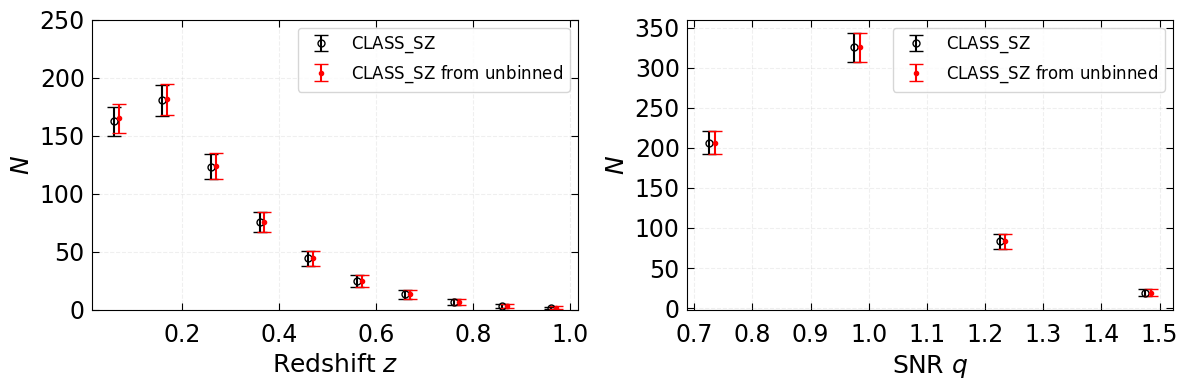

In [99]:

label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
# ax.set_xlabel(r'$\theta$ [arcminute]',size=title_size)
# ax.set_ylabel(r'$\gamma_t(\theta)$',size=title_size)
# ax.set_xscale('log')
# ax.set_yscale('log')

ax.errorbar(z_center,N_clusters_z_theory,yerr=np.sqrt(N_clusters_z_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            label=r'$\mathrm{CLASS\_SZ}$',capsize=5,c='k')
ax.errorbar(np.asarray(z_center)+0.01,Nz_binned,yerr=np.sqrt(Nz_binned),marker='o',markersize=3.,ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,from\,\,unbinned}$',capsize=5,c='red')
# ax.errorbar(np.asarray(z_center)+0.02,Nz_cnc_binned,yerr=np.sqrt(Nz_cnc_binned),
#             marker='*',
#             markersize=8.,
#             # markerfacecolor=None,
#             fillstyle='none',
#             ls='none',
#             label=r'$\mathrm{CNC\,\,from\,\,unbinned\,\,no\,\,opt\,\,bias}$',capsize=5,c='blue')

ax.set_xlabel(r'$\mathrm{Redshift}$ $z$',size=title_size)
ax.set_ylabel(r'$N$',size=title_size)


# plt.grid()
ax.legend(loc=1,frameon=True,fontsize=12)
ax.set_ylim(0.,250.)

ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
# ax.set_xlabel(r'$\theta$ [arcminute]',size=title_size)
# ax.set_ylabel(r'$\gamma_t(\theta)$',size=title_size)
# ax.set_xscale('log')
# ax.set_yscale('log')

ax.errorbar(log10y_center,N_clusters_y_theory,yerr=np.sqrt(N_clusters_y_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            label=r'$\mathrm{CLASS\_SZ}$',capsize=5,c='k')
ax.errorbar(np.asarray(log10y_center)+0.01,Nq_binned,yerr=np.sqrt(Nq_binned),marker='o',markersize=3.,ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,from\,\,unbinned}$',capsize=5,c='red')
# ax.errorbar(np.asarray(log10y_center)+0.020,Nq_cnc_binned,yerr=np.sqrt(Nq_cnc_binned),
#             marker='*',
#             markersize=8.,
#             # markerfacecolor=None,
#             fillstyle='none',
#             ls='none',label=r'$\mathrm{CNC\,\,from\,\,unbinned\,\,no\,\,opt\,\,bias}$',capsize=5,c='blue')

ax.set_xlabel(r'$\mathrm{SNR}$ $q$',size=title_size)
ax.set_ylabel(r'$N$',size=title_size)


# plt.grid()
ax.legend(loc=1,frameon=True,fontsize=12)
fig.tight_layout()
# plt.savefig('N_of_z_N_of_q.pdf')
# ax.set_ylim(0.,1000.)

## szcc_dof = 3

In [66]:
%%time

szcounts_param ={
'omega_cdm':  0.11933,
'Omega_b': 0.049,
'H0': 67.66,
'tau_reio': 0.0561,
'ln10^{10}A_s': 2.98,
'n_s': 0.9665,

'mass function' : 'M500', 
    
'k_pivot': 0.05,
'N_ncdm': 1,
'N_ur': 2.0328,
'm_ncdm': 0.06,

'output': 'sz_cluster_counts_fft',
'use_skyaveraged_noise': 1,
    
'signal-to-noise_cut-off_for_survey_cluster_completeness':6.,
'experiment' : 0, # planck
'y_m_relation' : 0, # planck
'm_pivot_ym_[Msun]': 3e14,    

'M_min' : 5e11, 
'M_max' : 5e15,
    
# 'ndim_masses' : 500, # now muted/set by k's in cosmopower emulator.
'ndim_redshifts' :150,
# tabulation of mass function:
'n_z_dndlnM' : 150,
'n_m_dndlnM' : 500,
    
'sigmaM_ym' : 0.173,

# 'N_samp_fftw' : 2048,
'N_samp_fftw' : 2**13,

'szcounts_fft_nz' : 150,

'z_min' : 0.0,
'z_max' : 1.02,
    
'szcounts_fft_z_min' : 0.01,
'szcounts_fft_z_max' : 1.01,
    
'B':1.25,
    
    
'tol_dlnm_dlnq':0.001,
'ntab_dlnm_dlnq':1000, # fiducial 1000

'szcounts_qmax_fft_padded':200.,
    
'sigma_derivative' : 0,
    
# 'ndim_redshifts' :285,
# # tabulation of mass function:
# 'n_z_dndlnM' : 285,
# 'szcounts_fft_nz' : 185,
# 'n_m_dndlnM' : 100,
'szcc_dof': 2.,
'szcc_qtrunc':2.,
    
}
M = Class()
M.set(szcounts_param)
M.compute_class_szfast()

CPU times: user 5.66 s, sys: 437 ms, total: 6.1 s
Wall time: 5.51 s


In [67]:
szcounts = M.szcounts_ntot_rates_loglike()
print(szcounts['ntot'],szcounts['loglike'])

690.8434080877652 1456.7456046815432


In [68]:
szcounts = M.szcounts_ntot_rates_loglike()
print(szcounts['ntot'],szcounts['loglike'])

690.8434080877652 1456.7456046815432


In [69]:
szcounts = M.szcounts_ntot_rates_loglike()
print(szcounts['ntot'],szcounts['loglike'])

690.8434080877652 1456.7456046815432


In [70]:
zmin = szcounts_param['szcounts_fft_z_min']
zmax = szcounts_param['szcounts_fft_z_max']
nz = szcounts_param['szcounts_fft_nz']
z_arr = np.linspace(zmin,zmax,nz)

q_threshold = 6.
q_max = 100.
nq = 5000
# q_arr = np.linspace(q_threshold, q_max,nq)
q_arr = np.geomspace(q_threshold, q_max,nq)
dq = (q_max-q_threshold)/(nq-1.)
dz = (zmax - zmin)/(nz-1.)
get_dndzdq = np.vectorize(M.get_szcounts_dndzdq_at_z_q)
Nz = []
for zp in z_arr:
    Nz.append(np.trapz(get_dndzdq(zp,q_arr)*q_arr,x=np.log(q_arr)))
Nz = np.asarray(Nz)
Nq = []
for qp in q_arr:
    Nq.append(np.trapz(get_dndzdq(z_arr,qp),x=z_arr))
    # Nq.append(np.sum(get_dndzdq(z_arr,qp)*dz))
Nq = np.asarray(Nq)
Ntot = np.trapz(Nz,x=z_arr)
# Ntot = np.sum(Nz)*dz
Ntot

690.652443536058

In [71]:
%%time

# for lnyp in [-35,-25,-20,-15,-10,-5.]:

for lnyp in [-10]:
    M_binned = Class()

    # M_binned.set(cosmo_params)
    M_binned.set({
    'omega_cdm':  0.11933,
    'Omega_b': 0.049,
    'H0': 67.66,
    'tau_reio': 0.0561,
    'ln10^{10}A_s': 2.98,
    'n_s': 0.9665,
    'output' : 'sz_cluster_counts',
    'mass function' :  'M500',
    'has_selection_function' : 1,
    'experiment' : 0,
    'y_m_relation' : 0,
    'use_skyaveraged_noise': 1,
    'use_planck_binned_proba' : 0,


    'm_pivot_ym_[Msun]': 3e14,    

    'M_min' : 5e11, 
    'M_max' : 5e15,

    'z_min' : 0.,
    'z_max' : 1.02,

    'm_pivot_ym_[Msun]' : 3e14,



    'bin_z_min_cluster_counts' : 0.01,
    'bin_z_max_cluster_counts' : 1.01,
    'bin_dz_cluster_counts' : 0.1,
    'bin_dlog10_snr': 0.25,

    #the paramater dlny is crucial, it controls the speed of the calculation
    #important to check that lnymin and lnymax are broad enough
    'dlny' : 0.05,
    'lnymin' : lnyp,
    'lnymax' : 4.,
    'sigmaM_ym' : 0.173,

    #case with no scatter:
    #sigmaM_ym = 0.

    # 'dlnM_cluster_count_completeness_grid' : 0.01,


    'cluster_count_completeness_grid_z_cutoff_low' : 0.5,
    'cluster_count_completeness_grid_z_cutoff_mid' : 1.5,
    'dz_cluster_count_completeness_grid_low_z' : 5e-3,
    'dz_cluster_count_completeness_grid_mid_z' : 1e-2,
    'dz_cluster_count_completeness_grid_high_z' : 1e-1,





    'signal-to-noise_cut-off_for_survey_cluster_completeness' : 6,


    # X ray mass bias (if applicable)
    'B' : 1.25,




    # tabulation of mass function:
    'n_z_dndlnM' : 100,
    'n_m_dndlnM' : 500,

    # computation of mass function
    # (grid in mass and redshifts for sigma and dsigma)
    # 'ndim_masses' : 500,
    'ndim_redshifts' : 100,

    # # pk setup for computation of sigma and dsigma
    # 'k_per_decade_class_sz' : 20.,
    # 'k_min_for_pk_class_sz' : 1e-3,
    # 'k_max_for_pk_class_sz' : 1e1,
    # 'P_k_max_h/Mpc' : 1e1,

    'szcc_dof':2.,
    'szcc_qtrunc':2.,
    })
    M_binned.compute_class_szfast()
    dNdzdy_theoretical = M_binned.dndzdy_theoretical()['dndzdy']
    z_center = M_binned.dndzdy_theoretical()['z_center']
    z_edges = M_binned.dndzdy_theoretical()['z_edges']
    log10y_center = M_binned.dndzdy_theoretical()['log10y_center']
    log10y_edges = M_binned.dndzdy_theoretical()['log10y_edges']

    N_z,N_y = np.shape(dNdzdy_theoretical)
    N_clusters_z_theory = []
    for iz in range(N_z):
        N_clusters_z_theory.append(np.sum(dNdzdy_theoretical[iz]))
    N_clusters_y_theory = []
    for iy in range(N_y):
        N_clusters_y_theory.append(np.sum(np.asarray(dNdzdy_theoretical)[:,iy]))
    print("lnyp %.3e Ntot %.5e"%(lnyp,np.sum(N_clusters_z_theory)))

lnyp -1.000e+01 Ntot 6.86798e+02
CPU times: user 769 ms, sys: 197 ms, total: 966 ms
Wall time: 415 ms


In [72]:

z_edges_low = z_edges[:-1]
z_edges_high = z_edges[1:]
Nz_binned = []
# Nz_cnc_binned = []
# z_cnc,dnz_cnc = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/cnc/test_files/n_z.txt',unpack=True)
for (zm,zp) in zip(z_edges_low,z_edges_high):
    z_arr_bin = np.linspace(zm,zp,50)
    Nz_in = []
    for zpbin in z_arr_bin:
        Nz_in.append(np.trapz(get_dndzdq(zpbin,q_arr)*q_arr,x=np.log(q_arr)))
    Nz_binned.append(np.trapz(Nz_in,x=z_arr_bin))
    # dnz_cnc_interp = np.interp(z_arr_bin,z_cnc,dnz_cnc)
    # Nz_cnc_binned.append(np.trapz(dnz_cnc_interp,x=z_arr_bin))
Nz_binned = np.asarray(Nz_binned)

In [73]:

q_edges_low = log10y_edges[:-1]
q_edges_low[0] = np.log10(6.)
q_edges_high = log10y_edges[1:]
Nq_binned = []
# Nq_cnc_binned = []
# q_cnc,dnq_cnc = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/cnc/test_files/n_q.txt',unpack=True)

for (qm,qp) in zip(q_edges_low,q_edges_high):
    q_arr_bin = np.linspace(qm,qp,50)
    Nq_in = []
    for qpbin in q_arr_bin:
        Nq_in.append(np.trapz(get_dndzdq(z_arr,10**qpbin),x=z_arr))
    Nq_binned.append(np.trapz(Nq_in,x=10**q_arr_bin))
    # dnq_cnc_interp = np.interp(10**q_arr_bin,q_cnc,dnq_cnc)
    # Nq_cnc_binned.append(np.trapz(dnq_cnc_interp,x=10**q_arr_bin))
Nq_binned = np.asarray(Nq_binned)

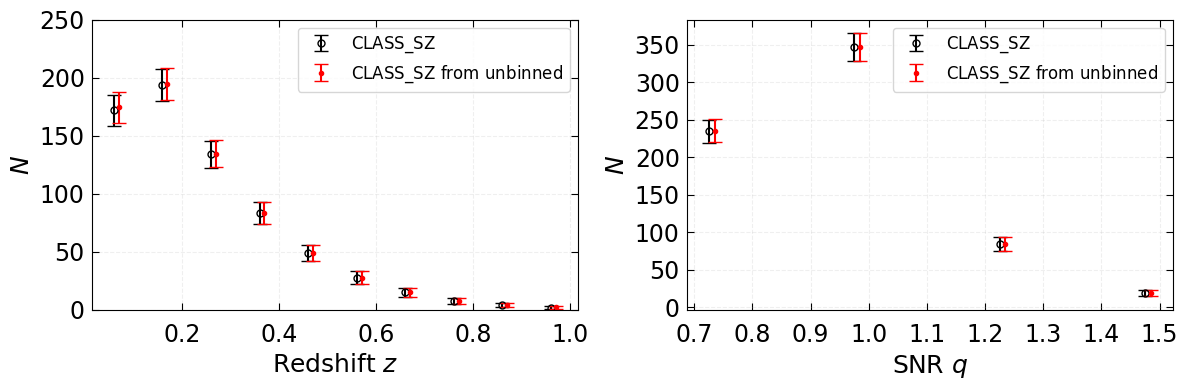

In [74]:

label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
# ax.set_xlabel(r'$\theta$ [arcminute]',size=title_size)
# ax.set_ylabel(r'$\gamma_t(\theta)$',size=title_size)
# ax.set_xscale('log')
# ax.set_yscale('log')

ax.errorbar(z_center,N_clusters_z_theory,yerr=np.sqrt(N_clusters_z_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            label=r'$\mathrm{CLASS\_SZ}$',capsize=5,c='k')
ax.errorbar(np.asarray(z_center)+0.01,Nz_binned,yerr=np.sqrt(Nz_binned),marker='o',markersize=3.,ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,from\,\,unbinned}$',capsize=5,c='red')
# ax.errorbar(np.asarray(z_center)+0.02,Nz_cnc_binned,yerr=np.sqrt(Nz_cnc_binned),
#             marker='*',
#             markersize=8.,
#             # markerfacecolor=None,
#             fillstyle='none',
#             ls='none',
#             label=r'$\mathrm{CNC\,\,from\,\,unbinned\,\,no\,\,opt\,\,bias}$',capsize=5,c='blue')

ax.set_xlabel(r'$\mathrm{Redshift}$ $z$',size=title_size)
ax.set_ylabel(r'$N$',size=title_size)


# plt.grid()
ax.legend(loc=1,frameon=True,fontsize=12)
ax.set_ylim(0.,250.)

ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
# ax.set_xlabel(r'$\theta$ [arcminute]',size=title_size)
# ax.set_ylabel(r'$\gamma_t(\theta)$',size=title_size)
# ax.set_xscale('log')
# ax.set_yscale('log')

ax.errorbar(log10y_center,N_clusters_y_theory,yerr=np.sqrt(N_clusters_y_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            label=r'$\mathrm{CLASS\_SZ}$',capsize=5,c='k')
ax.errorbar(np.asarray(log10y_center)+0.01,Nq_binned,yerr=np.sqrt(Nq_binned),marker='o',markersize=3.,ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,from\,\,unbinned}$',capsize=5,c='red')
# ax.errorbar(np.asarray(log10y_center)+0.020,Nq_cnc_binned,yerr=np.sqrt(Nq_cnc_binned),
#             marker='*',
#             markersize=8.,
#             # markerfacecolor=None,
#             fillstyle='none',
#             ls='none',label=r'$\mathrm{CNC\,\,from\,\,unbinned\,\,no\,\,opt\,\,bias}$',capsize=5,c='blue')

ax.set_xlabel(r'$\mathrm{SNR}$ $q$',size=title_size)
ax.set_ylabel(r'$N$',size=title_size)


# plt.grid()
ax.legend(loc=1,frameon=True,fontsize=12)
fig.tight_layout()
# plt.savefig('N_of_z_N_of_q.pdf')
# ax.set_ylim(0.,1000.)

# illustration of truncation issue

In [49]:
%%time

for lnyp in [-35,-25,-20,-15,-10,-5.]:

# for lnyp in [-10]:
    M_binned = Class()

    # M_binned.set(cosmo_params)
    M_binned.set({
    'omega_cdm':  0.11933,
    'Omega_b': 0.049,
    'H0': 67.66,
    'tau_reio': 0.0561,
    'ln10^{10}A_s': 2.98,
    'n_s': 0.9665,
    'output' : 'sz_cluster_counts',
    'mass function' :  'M500',
    'has_selection_function' : 1,
    'experiment' : 0,
    'y_m_relation' : 0,
    'use_skyaveraged_noise': 1,
    'use_planck_binned_proba' : 0,


    'm_pivot_ym_[Msun]': 3e14,    

    'M_min' : 5e11, 
    'M_max' : 5e15,

    'z_min' : 0.,
    'z_max' : 1.02,

    'm_pivot_ym_[Msun]' : 3e14,



    'bin_z_min_cluster_counts' : 0.01,
    'bin_z_max_cluster_counts' : 1.01,
    'bin_dz_cluster_counts' : 0.1,
    'bin_dlog10_snr': 0.25,

    #the paramater dlny is crucial, it controls the speed of the calculation
    #important to check that lnymin and lnymax are broad enough
    'dlny' : 0.05,
    'lnymin' : lnyp,
    'lnymax' : 4.,
    'sigmaM_ym' : 0.173,

    #case with no scatter:
    #sigmaM_ym = 0.

    # 'dlnM_cluster_count_completeness_grid' : 0.01,


    'cluster_count_completeness_grid_z_cutoff_low' : 0.5,
    'cluster_count_completeness_grid_z_cutoff_mid' : 1.5,
    'dz_cluster_count_completeness_grid_low_z' : 5e-3,
    'dz_cluster_count_completeness_grid_mid_z' : 1e-2,
    'dz_cluster_count_completeness_grid_high_z' : 1e-1,





    'signal-to-noise_cut-off_for_survey_cluster_completeness' : 6,


    # X ray mass bias (if applicable)
    'B' : 1.25,




    # tabulation of mass function:
    'n_z_dndlnM' : 100,
    'n_m_dndlnM' : 500,

    # computation of mass function
    # (grid in mass and redshifts for sigma and dsigma)
    # 'ndim_masses' : 500,
    'ndim_redshifts' : 100,

    # # pk setup for computation of sigma and dsigma
    # 'k_per_decade_class_sz' : 20.,
    # 'k_min_for_pk_class_sz' : 1e-3,
    # 'k_max_for_pk_class_sz' : 1e1,
    # 'P_k_max_h/Mpc' : 1e1,

    'szcc_dof':3.,
    'szcc_qtrunc':3.,
    })
    M_binned.compute_class_szfast()
    dNdzdy_theoretical = M_binned.dndzdy_theoretical()['dndzdy']
    z_center = M_binned.dndzdy_theoretical()['z_center']
    z_edges = M_binned.dndzdy_theoretical()['z_edges']
    log10y_center = M_binned.dndzdy_theoretical()['log10y_center']
    log10y_edges = M_binned.dndzdy_theoretical()['log10y_edges']

    N_z,N_y = np.shape(dNdzdy_theoretical)
    N_clusters_z_theory = []
    for iz in range(N_z):
        N_clusters_z_theory.append(np.sum(dNdzdy_theoretical[iz]))
    N_clusters_y_theory = []
    for iy in range(N_y):
        N_clusters_y_theory.append(np.sum(np.asarray(dNdzdy_theoretical)[:,iy]))
    print("lnyp %.2f Ntot %.5e"%(lnyp,np.sum(N_clusters_z_theory)))

lnyp -35.00 Ntot 7.12330e+02
lnyp -25.00 Ntot 7.12330e+02
lnyp -20.00 Ntot 7.12330e+02
lnyp -15.00 Ntot 7.12330e+02
lnyp -10.00 Ntot 7.12330e+02
lnyp -5.00 Ntot 3.28627e+01
CPU times: user 5.17 s, sys: 1.33 s, total: 6.49 s
Wall time: 2.76 s


# clean-up the selfn files

In [16]:
ylims = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/class_sz/class_sz_auxiliary_files/nemo_sim_ylims_030722_50bins.txt')
tha = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/class_sz/class_sz_auxiliary_files/nemo_sim_thetas_030722_50bins.txt')
skyfracs = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/class_sz/class_sz_auxiliary_files/nemo_sims_skyfracs_030722_50bins.txt')

In [20]:
skyfracs_new = skyfracs[:-1]

In [26]:
ylims_new = []
for yl in ylims:
    if not np.isinf(yl):
        ylims_new.append(yl)
ylims_new = np.asarray(ylims_new)

In [30]:
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/class_sz/class_sz_auxiliary_files/nemo_sim_thetas_030722_49bins.txt',np.c_[tha])
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/class_sz/class_sz_auxiliary_files/nemo_sim_ylims_030722_49bins.txt',np.c_[ylims_new])
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/class_sz/class_sz_auxiliary_files/nemo_sims_skyfracs_030722_49bins.txt',np.c_[skyfracs_new])

# Run soliket case

In [2]:
import soliket
from cobaya.model import get_model

In [3]:
params = {
    'h': 0.68,
    'n_s': 0.965,
    'Omega_b': 0.049,      
    'Omega_c': 0.261, 
    'sigma8': 0.81,
    'tenToA0': 1.9e-5,
    'B0': 0.08,
    'scatter_sz': 0.173,
    'bias_sz': 1.,
    'm_nu': 0.,
    'C0': 0. ### not used in current soliket

}

# path2data ='/Users/boris/Work/nemosimkit/sim-kit_NemoCCL_A10tSZ_DR5Atmos_ACT-DR5-2Pass_scatter_realisation2/NemoCCL_A10tSZ_DR5Atmos_ACT-DR5-2Pass_scatter_realisation2/'
# path2data ='/Users/boris/Desktop/bkp2/soliket_trash/binned_clusters/data/advact/DR5CosmoSims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned'
path2data ='/Users/boris/Work/CLASS-SZ/SO-SZ/SOLikeT/soliket/clusters/data/advact/DR5CosmoSims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned'

info = {
    'params': params,
    'likelihood': {'soliket.BinnedClusterLikelihood': {
    'verbose': False,
    'data': {
        'data_path': path2data,
        'cat_file': "NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_mass.fits",
        'Q_file': "selFn/QFit.fits",
        'tile_file': "selFn/tileAreas.txt",
        'rms_file': "selFn/RMSTab.fits"
    },
    'theorypred': {
        'choose_theory': "CCL",
        'massfunc_mode': 'ccl',
        'compl_mode': 'erf_diff',
        'md_hmf': '200c',
        'md_ym': '200c'
        
    },
    'YM': {
        'Mpivot': 4.25e14
    },
    'selfunc': {
        'SNRcut': 5.,
        'method': 'SNRbased',
        'whichQ': 'fit',
        'resolution': 'downsample',
        'dwnsmpl_bins': 30,
        'save_dwsmpld': False,
        'debiasDOF' : 3.,
        'debias_cutoff' : 2.
    },
    'binning': {
        'z': {
            'zmin': 0.,
            'zmax': 2.,
            'dz': 0.1
        },
        'q': {
            'log10qmin': 0.6,
            'log10qmax': 2.0,
            'dlog10q': 0.25
        },
        'M': {
            'Mmin': 5e13,
            'Mmax': 1e16,
            'dlogM': 0.01
        },
        'exclude_zbin' : -1.,
    }
    }},
    'theory': {'soliket.clusters.CCL': 
               {'transfer_function': 'boltzmann_camb',
                'matter_pk': 'halofit',
                'baryons_pk': 'nobaryons',
                'md_hmf': '200c'}} ## uses t08 m200c and B13 for m200c->m500c
}

# initialisation 
model = get_model(info)
like = model.likelihood['soliket.BinnedClusterLikelihood']
model.loglikes({})[0]

[6.0468303  5.97718498 5.61699056 ... 5.98763011 7.97136298 5.35425758] [6.0468303  5.97718498 5.61699056 ... 5.98763011 7.97136298 5.35425758]
5.0
reprocessing catalog to avaluate rates on a z,q-grid in each patch
skyfracs: [0.03958957 0.20227552 0.09889711 0.14610827 0.10690069 0.09548085
 0.1997195  0.25654976 0.24665212 0.17306544 0.13669197 0.1088023
 0.14353799 0.20509662 0.27918201 0.26619694 0.22123694 0.25983329
 0.25630219 0.21694899 0.14862113 0.11366503 0.07697329 0.05597665
 0.04164899 0.02733358 0.01875423 0.00830217 0.00151236 0.00050419]
zq_lnqs: [1.60943791 1.7884483  1.96745869 2.14646908 2.32547947 2.50448985
 2.68350024 2.86251063 3.04152102 3.22053141 3.3995418  3.57855219
 3.75756257 3.93657296 4.11558335 4.29459374 4.47360413 4.65261452
 4.83162491 5.01063529]
zq_ln1pzs: [9.99995000e-06 7.84815920e-02 1.56953184e-01 2.35424776e-01
 3.13896368e-01 3.92367960e-01 4.70839552e-01 5.49311144e-01
 6.27782736e-01 7.06254328e-01 7.84725920e-01 8.63197513e-01
 9.41669105e

FileNotFoundError: [Errno 2] No such file or directory: 'chains/test_unbinned_ccl_evaluate_binned_from_unbinned_rate_densities_ln1pzs.npy'

In [4]:
pk_intp = like.theory.get_Pk_interpolator(("delta_nonu", "delta_nonu"), nonlinear=False)
SZparams = {
    'tenToA0': 1.9e-05,
    'B0': 0.08,
    'C0': 0., # not read by soliket
    'scatter_sz': 0.173,
    'bias_sz': 1.,
}

NameError: name 'like' is not defined

In [5]:
Nzq = like._get_theory(pk_intp, **SZparams)
z_slt, q_slt, catNzq, zcut = like.delN2Dcat

Nq_slt = np.zeros(len(q_slt))
for i in range(len(q_slt)):
    Nq_slt[i] = Nzq[:,i].sum()    
Nz_slt = np.zeros(len(z_slt))
for i in range(len(z_slt)):
    Nz_slt[i] = Nzq[i, :].sum()    
    
bin_params = info['likelihood']['soliket.BinnedClusterLikelihood']['binning']

zbins = np.arange(bin_params['z']['zmin'], bin_params['z']['zmax'] + bin_params['z']['dz'], \
                  bin_params['z']['dz'])

logqmin = bin_params['q']['log10qmin']
logqmax = bin_params['q']['log10qmax']
dlogq = bin_params['q']['dlog10q']

# TODO: I removed the bin where everything is larger than qmax - is this ok?
qbins = 10**np.arange(logqmin, logqmax+dlogq, dlogq)
print(np.sum(Nz_slt))

NameError: name 'like' is not defined

In [52]:
%%time
from classy_sz import Class

M = Class()

M.set({
'output': 'sz_cluster_counts',

'mass function'  : 'T08M200c',
'concentration parameter' : 'B13',
    
'h': 0.68,
'n_s': 0.965,
'Omega_b': 0.049,      
'Omega_cdm': 0.261, 
'sigma8': 0.81,
'tau_reio' : 0.06,

    
'z_min': 0.,
'z_max': 2.,
'redshift_epsrel': 1e-6,
'redshift_epsabs': 1e-100,    
    

    
'M_min': 5e13,
'M_max': 1e16,
'mass_epsrel':1e-6,
'mass_epsabs':1e-100,
'ndim_redshifts':200, 
# 'ndim_masses' : 100,


    
'has_selection_function' : 1,
'experiment' : 1, # Planck: 0 / ACT or SO: 1
'y_m_relation' : 1, # ycenter : 1, # y500 : 0
'signal-to-noise_cut-off_for_survey_cluster_completeness' : 5.,

'sz_selection_function_thetas_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_thetas_120923_30bins.txt',
'sz_selection_function_skyfracs_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_skyfracs_120923_30bins.txt',
'sz_selection_function_ylims_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_ylims_120923_30bins.txt',    

# 'sz_selection_function_thetas_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/class_sz/class_sz_auxiliary_files/nemo_sim_thetas_030722_49bins.txt',
# 'sz_selection_function_skyfracs_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/class_sz/class_sz_auxiliary_files/nemo_sims_skyfracs_030722_49bins.txt',
# 'sz_selection_function_ylims_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/class_sz/class_sz_auxiliary_files/nemo_sim_ylims_030722_49bins.txt',    
   
    
'bin_z_min_cluster_counts' : 0.,
'bin_z_max_cluster_counts' : 2.,
'bin_dz_cluster_counts' : 0.1,

'bin_dlog10_snr' : 0.25,
'log10_snr_min' : 0.6,#np.log10(5.),
'log10_snr_max' : 2.,
# 'bin_dlog10_snr' : 0.25,
# 'log10_snr_min' : np.log10(5.),
# 'log10_snr_max' : 2.,



'dlny' : 0.006,
'lnymin' : -15., # planck  -11.5 so/act -11
'lnymax' : -3.,  # planck 10. so/act -5
'dlnM_cluster_count_completeness_grid' : 0.005,


'cluster_count_completeness_grid_z_cutoff_low' : 0.4,
'cluster_count_completeness_grid_z_cutoff_mid' : 1.,

'dz_cluster_count_completeness_grid_low_z' : 1e-3,
'dz_cluster_count_completeness_grid_mid_z' : 1e-2,
'dz_cluster_count_completeness_grid_high_z' : 1e-1,



'mass_epsrel_cluster_counts' : 1e-6,
'mass_epsabs_cluster_counts' : 1e-40,

'redshift_epsrel_cluster_counts' : 1e-6,
'redshift_epsabs_cluster_counts' : 1e-40,

    
'A_ym'  : 1.9e-05,
'B_ym'  : 0.08,
'C_ym' : 0.,
'sigmaM_ym' : 0.173,
# 'sigmaM_ym' : 0.,
'm_pivot_ym_[Msun]' : 4.25e14,

'use_m500c_in_ym_relation' : 0,
'use_planck_binned_proba' : 0, #use diff of erfs
'use_skyaveraged_noise': 0, # this will speed-up everything

'szcc_dof': 3.,
'szcc_qtrunc': 2.,
        })
        
M.compute_class_szfast()


CPU times: user 49.3 s, sys: 524 ms, total: 49.9 s
Wall time: 8.75 s


In [53]:
dNdzdy_theoretical = M.dndzdy_theoretical()['dndzdy']
z_center = M.dndzdy_theoretical()['z_center']
z_edges = M.dndzdy_theoretical()['z_edges']
log10y_center = M.dndzdy_theoretical()['log10y_center']
log10y_edges = M.dndzdy_theoretical()['log10y_edges']

N_z,N_y = np.shape(dNdzdy_theoretical)
N_clusters_z_theory = []
for iz in range(N_z):
    N_clusters_z_theory.append(np.sum(dNdzdy_theoretical[iz][0:]))
N_clusters_y_theory = []

for iy in range(N_y):
    N_clusters_y_theory.append(np.sum(np.asarray(dNdzdy_theoretical)[:,iy]))
    
# print total number of clusters: 
np.sum(N_clusters_z_theory)

3704.8974084769193

In [54]:
np.sum(dNdzdy_theoretical[:][:])

3704.897408476919

In [55]:
%%time
M = Class()


szcounts_param ={
'output': 'sz_cluster_counts_fft',
    
'mass function'  : 'T08M200c',
# 'mass function'  : 'M500',
'concentration parameter' : 'B13',
    
'h': 0.68,
'n_s': 0.965,
'Omega_b': 0.049,      
'Omega_cdm': 0.261, 
'sigma8': 0.81,
'tau_reio' : 0.06,
    
# 'z_min': 0.,
# 'z_max': 2.,
'redshift_epsrel': 1e-4,
'redshift_epsabs': 1e-100,    
    

    
'M_min': 5e13,
'M_max': 1e16,
'mass_epsrel':1e-4,
'mass_epsabs':1e-100,
'ndim_redshifts':100, 



    
'has_selection_function' : 1,
'experiment' : 1, # Planck: 0 / ACT or SO: 1
'y_m_relation' : 1, # ycenter : 1, # y500 : 0
'signal-to-noise_cut-off_for_survey_cluster_completeness' : 5.,

'sz_selection_function_thetas_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_thetas_120923_30bins.txt',
'sz_selection_function_skyfracs_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_skyfracs_120923_30bins.txt',
'sz_selection_function_ylims_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_ylims_120923_30bins.txt',    

# 'sz_selection_function_thetas_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/class_sz/class_sz_auxiliary_files/nemo_sim_thetas_030722_49bins.txt',
# 'sz_selection_function_skyfracs_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/class_sz/class_sz_auxiliary_files/nemo_sims_skyfracs_030722_49bins.txt',
# 'sz_selection_function_ylims_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/class_sz/class_sz_auxiliary_files/nemo_sim_ylims_030722_49bins.txt',    
   
    
    
'A_ym'  : 1.9e-05,
'B_ym'  : 0.08,
'C_ym' : 0.,
'sigmaM_ym' : 0.173,
# 'sigmaM_ym' : 0.,
'm_pivot_ym_[Msun]' : 4.25e14,

'use_m500c_in_ym_relation' : 0,
'use_skyaveraged_noise': 0, # this will speed-up everything
    
    
'N_samp_fftw' : 2048,
# 'N_samp_fftw' : 8192,

'szcounts_fft_nz' : 250,

'z_min' : 0.0,
'z_max' : 2.0,
    
'szcounts_fft_z_min' : 0.0,
'szcounts_fft_z_max' : 2.0,
    
    
    
'tol_dlnm_dlnq':0.001,
'ntab_dlnm_dlnq':1000, # fiducial 1000

'szcounts_qmax_fft_padded':500.,
    
'sigma_derivative' : 0,
'szcc_dof': 3.,
'szcc_qtrunc':2.,

        }
M.set(szcounts_param)
        
M.compute_class_szfast()

CPU times: user 23.1 s, sys: 468 ms, total: 23.6 s
Wall time: 3.49 s


In [56]:
szcounts = M.szcounts_ntot_rates_loglike()
print(szcounts['ntot'],szcounts['loglike'])

3755.2502667252616 -1409.782755739393


In [57]:
zmin = szcounts_param['szcounts_fft_z_min']
zmax = szcounts_param['szcounts_fft_z_max']
nz = szcounts_param['szcounts_fft_nz']
z_arr = np.linspace(zmin,zmax,nz)

q_threshold = 5.
q_max = 100.
nq = 5000
q_arr = np.geomspace(q_threshold, q_max,nq)
dq = (q_max-q_threshold)/(nq-1.)
dz = (zmax - zmin)/(nz-1.)
get_dndzdq = np.vectorize(M.get_szcounts_dndzdq_at_z_q)
Nz = []
for zp in z_arr:
    Nz.append(np.trapz(get_dndzdq(zp,q_arr)*q_arr,x=np.log(q_arr)))
Nz = np.asarray(Nz)
Nq = []
for qp in q_arr:
    Nq.append(np.trapz(get_dndzdq(z_arr,qp),x=z_arr))
Nq = np.asarray(Nq)
Ntot = np.trapz(Nz,x=z_arr)
# Ntot = np.sum(Nz)*dz
Ntot

z_edges_low = z_edges[:-1]
z_edges_high = z_edges[1:]
Nz_binned = []
for (zm,zp) in zip(z_edges_low,z_edges_high):
    z_arr_bin = np.linspace(zm,zp,50)
    Nz_in = []
    for zpbin in z_arr_bin:
        Nz_in.append(np.trapz(get_dndzdq(zpbin,q_arr)*q_arr,x=np.log(q_arr)))
    Nz_binned.append(np.trapz(Nz_in,x=z_arr_bin))
Nz_binned = np.asarray(Nz_binned)

q_edges_low = log10y_edges[:-1]
q_edges_low[0] = 0.6
q_edges_high = log10y_edges[1:]
Nq_binned = []
for (qm,qp) in zip(q_edges_low,q_edges_high):
    q_arr_bin = np.linspace(qm,qp,50)
    Nq_in = []
    for qpbin in q_arr_bin:
        if 10.**qpbin<q_threshold:
            Nq_in.append(0.)
        else:
            Nq_in.append(np.trapz(get_dndzdq(z_arr,10**qpbin),x=z_arr))
    Nq_binned.append(np.trapz(Nq_in,x=10**q_arr_bin))
Nq_binned = np.asarray(Nq_binned)

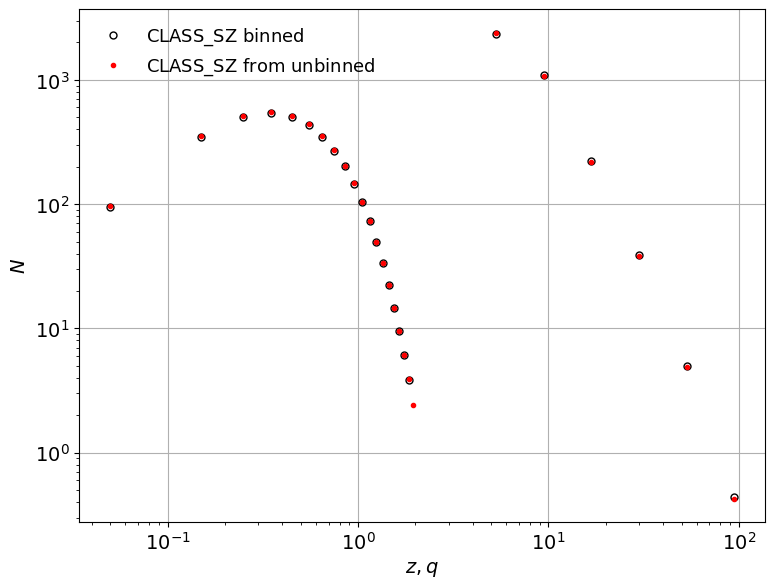

In [58]:
# color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

plt.figure(figsize=(8,6))
# plt.plot(z_slt, Nz_slt, color='green', marker='o', alpha=1., label='SOLikeT/ccl binned')
plt.errorbar(z_center,N_clusters_z_theory,#yerr=np.sqrt(N_clusters_z_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,binned}$',capsize=5,c='k')
plt.errorbar(np.asarray(z_center),Nz_binned,#yerr=np.sqrt(Nz_binned),
             marker='o',markersize=3.,ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,from\,\,unbinned}$',capsize=5,c='red')

# plt.plot(q_slt, Nq_slt, color='green', marker='o', alpha=1., #label='SOLikeT Nq'
#         )
plt.errorbar(10**np.asarray(log10y_center),N_clusters_y_theory,#yerr=np.sqrt(N_clusters_y_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            #label=r'$\mathrm{CLASS\_SZ\,\,binned}$',
             capsize=5,c='k')
plt.errorbar(10**(np.asarray(log10y_center)),Nq_binned,#yerr=np.sqrt(Nq_binned),
             marker='o',markersize=3.,ls='none',
            #label=r'$\mathrm{CLASS\_SZ\,\,from\,\,unbinned}$',
             capsize=5,c='red')


plt.xlabel('$z,q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,frameon=False)
plt.grid()
plt.tight_layout()
plt.loglog()
plt.show()

#### Binned from unbinned cnc

In [59]:
import cnc as cnc
import classy_sz
import numpy as np
number_counts = cnc.cluster_number_counts()
cnc_params = number_counts.cnc_params
#### set params here
cnc_params_new = {
    'cosmology_tool': "classy_sz",
    'number_cores_abundance' : 10,
    'number_cores_hmf' : 10,
    'number_cores_data' : 10,
    
    "mass_definition": "200c",
    "hmf_calc": "classy_sz",
    
    # "mass_definition": "500c",
    # "hmf_calc": "cnc",
    
    'observables': [["q_act"]],
    'obs_select': "q_act",
    'cluster_catalogue' : 'act',
    
    # 'observables': [["q_mmf3_mean"]],
    # 'obs_select': "q_mmf3_mean",
    # 'cluster_catalogue' : 'Planck_MMF3_cosmo',
    
    # "catalogue_params":{"downsample":True},
    'z_errors' : False,

    'scalrel_type_deriv' : "numerical",
    # 'scalrel_type_deriv' : "analytical",
    'z_min' : 0.0,
    'z_max' : 2.,
    'n_z':200,
    'bins_edges_z': np.linspace(0.,2.,201), ## this needs to be set ! why ??

    'M_min': 5e13,
    'M_max': 1e16,
    
    'obs_select_min': 5.,
    'obs_select_max': 100.,
    
     "n_points" : 60000, ##number of points in which the mass function at each redshift (and all the convolutions) is evaluated
     "n_obs_select" : 60000,
    
    'bins_edges_obs_select': np.exp(np.linspace(np.log(5.),np.log(100),6)),
    'dof': 3.,
    
    'h' : 0.68,
    'sigma_8' : 0.81,
    'n_s' : 0.965,
    'Om0' : 0.31,
    'Ob0' : 0.049,

    'tenToA0' : 1.9e-5,
    'B0 ': 0.08,
    'SZmPivot' : 4.25e14,
    'bias_sz' : 1.,
    'sigma_lnq' : 0.173
    # 'sigma_lnq' : 0.
    
}
for k,v in cnc_params_new.items():
    cnc_params[k] = v
number_counts.cnc_params = cnc_params
number_counts.initialise()

cosmo_params = number_counts.cosmo_params
scal_rel_params = number_counts.scal_rel_params
# print(cosmo_params)

# cosmo_params["H0"] = 68.
for k,v in cnc_params_new.items():
    cosmo_params[k] = v
    scal_rel_params[k] = v

number_counts.get_number_counts()
number_counts.get_abundance_matrix()
# log_lik_binned = number_counts.get_lik_binned()
dndz = number_counts.n_z
dndq = number_counts.n_obs
cnc_zs = number_counts.redshift_vec
cnc_qs = number_counts.obs_select_vec
# print("dndz:",dndz)
# print("dndq:",dndq)
# print("cnc_zs:",cnc_zs)
# print("cnc_qs:",cnc_qs)

using classy_sz
N tot 3562.8324724321037


In [60]:
from scipy import interpolate
zmin = cnc_zs[0]
zmax = cnc_zs[-1]
nz = len(cnc_zs)
z_arr = cnc_zs

q_threshold = cnc_qs[0]
q_max = cnc_qs[-1]
nq = len(cnc_qs)
q_arr = cnc_qs
dq = (q_max-q_threshold)/(nq-1.)
dz = (zmax - zmin)/(nz-1.)
# get_dndzdq = np.vectorize(M.get_szcounts_dndzdq_at_z_q)
# Nz = []
# for zp in z_arr:
#     Nz.append(np.trapz(get_dndzdq(zp,q_arr)*q_arr,x=np.log(q_arr)))
# Nz = np.asarray(Nz)
# Nq = []
# for qp in q_arr:
#     Nq.append(np.trapz(get_dndzdq(z_arr,qp),x=z_arr))
# Nq = np.asarray(Nq)
Ntot = np.trapz(dndz,x=z_arr)
# Ntot = np.sum(Nz)*dz
print(Ntot)

z_edges_low = z_edges[:-1]
z_edges_high = z_edges[1:]
Nz_binned = []
for (zm,zp) in zip(z_edges_low,z_edges_high):
    z_arr_bin = np.linspace(zm,zp,50)
    # Nz_in = []
    # for zpbin in z_arr_bin:
    #     Nz_in.append(np.trapz(get_dndzdq(zpbin,q_arr)*q_arr,x=np.log(q_arr)))
    dndz_inter = interpolate.interp1d(cnc_zs,dndz,bounds_error=None,fill_value=0.)
    # dndz_inter = np.interp(z_arr_bin,cnc_zs,dndz)
    Nz_binned.append(np.trapz(dndz_inter(z_arr_bin),x=z_arr_bin))
Nz_binned = np.asarray(Nz_binned)

q_edges_low = log10y_edges[:-1]
q_edges_low[0] = 0.6
q_edges_high = log10y_edges[1:]
Nq_binned = []
for (qm,qp) in zip(q_edges_low,q_edges_high):
    q_arr_bin = np.linspace(qm,qp,50)
    # Nq_in = []
    # for qpbin in q_arr_bin:
    #     if 10.**qpbin<q_threshold:
    #         Nq_in.append(0.)
    #     else:
    #         Nq_in.append(np.trapz(get_dndzdq(z_arr,10**qpbin),x=z_arr))
    dndq_inter = interpolate.interp1d(cnc_qs,dndq,bounds_error=False,fill_value=0.)
    Nq_binned.append(np.trapz(dndq_inter(10**q_arr_bin),x=10**q_arr_bin))
Nq_binned = np.asarray(Nq_binned)

3562.791878777859


In [61]:
10.**q_edges_low[0]

3.9810717055349722

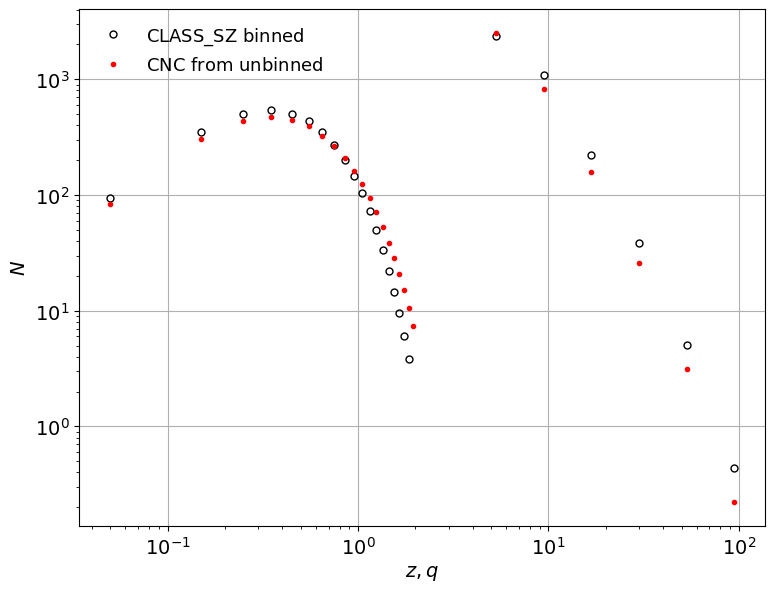

In [62]:
# color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

plt.figure(figsize=(8,6))
# plt.plot(z_slt, Nz_slt, color='green', marker='o', alpha=1., label='SOLikeT/ccl binned')
plt.errorbar(z_center,N_clusters_z_theory,#yerr=np.sqrt(N_clusters_z_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,binned}$',capsize=5,c='k')
plt.errorbar(np.asarray(z_center),Nz_binned,#yerr=np.sqrt(Nz_binned),
             marker='o',markersize=3.,ls='none',
            label=r'$\mathrm{CNC\,\,from\,\,unbinned}$',capsize=5,c='red')

# plt.plot(q_slt, Nq_slt, color='green', marker='o', alpha=1., #label='SOLikeT Nq'
#         )
plt.errorbar(10**np.asarray(log10y_center),N_clusters_y_theory,#yerr=np.sqrt(N_clusters_y_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            #label=r'$\mathrm{CLASS\_SZ\,\,binned}$',
             capsize=5,c='k')
plt.errorbar(10**(np.asarray(log10y_center)),Nq_binned,#yerr=np.sqrt(Nq_binned),
             marker='o',markersize=3.,ls='none',
            #label=r'$\mathrm{CLASS\_SZ\,\,from\,\,unbinned}$',
             capsize=5,c='red')


plt.xlabel('$z,q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,frameon=False)
plt.grid()
plt.tight_layout()
plt.loglog()
plt.show()

#### Binned from unbinned soliket

In [3]:
path_to_soliket_dndzdqs = '/Users/boris/Work/CLASS-SZ/SO-SZ/SOLikeT/soliket/clusters/chains/'
dndzdqs_ln1pz = np.load(path_to_soliket_dndzdqs+'test_unbinned_ccl_evaluate_binned_from_unbinned_rate_densities_ln1pzs.npy')
dndzdqs_lnq = np.load(path_to_soliket_dndzdqs+'test_unbinned_ccl_evaluate_binned_from_unbinned_rate_densities_lnqs.npy')
dndzdqs_dn = np.load(path_to_soliket_dndzdqs+'test_unbinned_ccl_evaluate_binned_from_unbinned_rate_densities.npy')

In [4]:
npatches = 30
dndzdqs_dn_3d = np.zeros((30,len(dndzdqs_ln1pz),len(dndzdqs_lnq)))
dndzdqs_dn_2d = np.zeros((len(dndzdqs_ln1pz),len(dndzdqs_lnq)))
l = 0
for i in range(npatches):
    for j in range(len(dndzdqs_ln1pz)):
        for k in range(len(dndzdqs_lnq)):
            dndzdqs_dn_3d[i][j][k] = dndzdqs_dn[l]
            l+=1

In [5]:
dndzdqs_dn_2d = np.sum(dndzdqs_dn_3d,axis=0)

In [6]:
np.shape(dndzdqs_dn_2d)

(15, 20)

In [7]:
idz = 12
idq = 19
dndzdqs_dn_2d[idz][idq]

0.0

In [285]:
x,y = np.meshgrid(dndzdqs_lnq,dndzdqs_ln1pz)

In [286]:
np.shape(y)

(15, 20)

In [287]:
np.isnan(dndzdqs_dn_2d).any()

False

In [288]:
soliket_get_szcounts_dndzdq_at_z_q = interpolate.interp2d(y,x,np.log(dndzdqs_dn_2d),kind='linear')

In [289]:
np.exp(soliket_get_szcounts_dndzdq_at_z_q(dndzdqs_ln1pz[idz],dndzdqs_lnq[idq]))

array([203694.86788356])

In [265]:
# np.exp(soliket_get_szcounts_dndzdq_at_z_q(dndzdqs_lnq[idq],dndzdqs_ln1pz[idz]))

In [294]:
%%time
zmin = szcounts_param['szcounts_fft_z_min']
zmax = szcounts_param['szcounts_fft_z_max']
nz = szcounts_param['szcounts_fft_nz']
z_arr = np.linspace(zmin,zmax,nz)

q_threshold = 5.
q_max = 100.
nq = 5000
q_arr = np.geomspace(q_threshold, q_max,nq)
dq = (q_max-q_threshold)/(nq-1.)
dz = (zmax - zmin)/(nz-1.)
get_dndzdq = np.vectorize(soliket_get_szcounts_dndzdq_at_z_q)
Nz = []
for zp in z_arr:
    Nz.append(np.trapz(np.exp(get_dndzdq(np.log(1.+zp),np.log(q_arr)))*q_arr,x=np.log(q_arr)))
Nz = np.asarray(Nz)
Nq = []
for qp in q_arr:
    Nq.append(np.trapz(np.exp(get_dndzdq(np.log(1.+z_arr),np.log(qp))),x=z_arr))
Nq = np.asarray(Nq)
Ntot = np.trapz(Nz,x=z_arr)
# Ntot = np.sum(Nz)*dz
print(Ntot)

z_edges_low = z_edges[:-1]
z_edges_low[0] *= 1.01 
z_edges_high = z_edges[1:]
z_edges_high[-1]*=0.99
Nz_binned = []
for (zm,zp) in zip(z_edges_low,z_edges_high):
    z_arr_bin = np.linspace(zm,zp,50)
    Nz_in = []
    for zpbin in z_arr_bin:
        Nz_in.append(np.trapz(np.exp(get_dndzdq(np.log(1.+zpbin),np.log(q_arr)))*q_arr,x=np.log(q_arr)))
    Nz_binned.append(np.trapz(Nz_in,x=z_arr_bin))
Nz_binned = np.asarray(Nz_binned)

q_edges_low = log10y_edges[:-1]
q_edges_low[0] = 0.6
q_edges_high = log10y_edges[1:]
Nq_binned = []
for (qm,qp) in zip(q_edges_low,q_edges_high):
    q_arr_bin = np.linspace(qm,qp,50)
    Nq_in = []
    for qpbin in q_arr_bin:
        if 10.**qpbin<q_threshold:
            Nq_in.append(0.)
        else:
            Nq_in.append(np.trapz(np.exp(get_dndzdq(np.log(1.+z_arr),np.log(10**qpbin))),x=z_arr))
    Nq_binned.append(np.trapz(Nq_in,x=10**q_arr_bin))
Nq_binned = np.asarray(Nq_binned)

10563298426.095285
CPU times: user 50.6 s, sys: 390 ms, total: 51 s
Wall time: 50.9 s


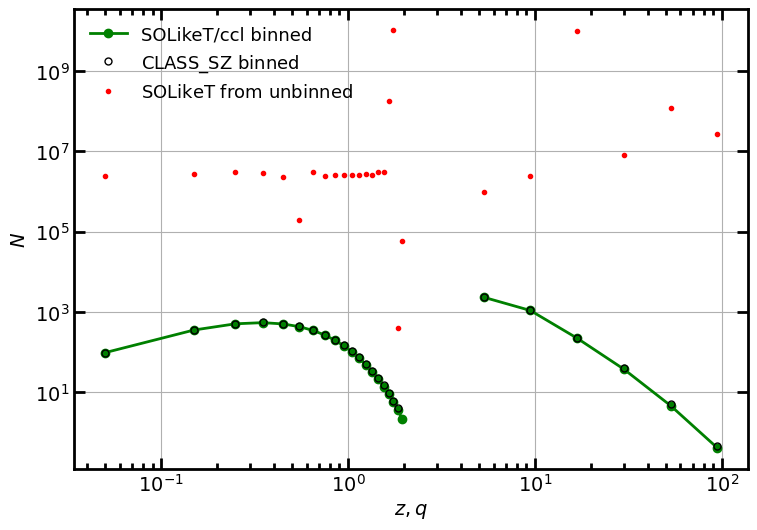

In [295]:
# color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

plt.figure(figsize=(8,6))
plt.plot(z_slt, Nz_slt, color='green', marker='o', alpha=1., label='SOLikeT/ccl binned')
plt.errorbar(z_center,N_clusters_z_theory,#yerr=np.sqrt(N_clusters_z_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,binned}$',capsize=5,c='k')
plt.errorbar(np.asarray(z_center),Nz_binned,#yerr=np.sqrt(Nz_binned),
             marker='o',markersize=3.,ls='none',
            label=r'$\mathrm{SOLikeT\,\,from\,\,unbinned}$',capsize=5,c='red')

plt.plot(q_slt, Nq_slt, color='green', marker='o', alpha=1., #label='SOLikeT Nq'
        )
plt.errorbar(10**np.asarray(log10y_center),N_clusters_y_theory,#yerr=np.sqrt(N_clusters_y_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            #label=r'$\mathrm{CLASS\_SZ\,\,binned}$',
             capsize=5,c='k')
plt.errorbar(10**(np.asarray(log10y_center)),Nq_binned,#yerr=np.sqrt(Nq_binned),
             marker='o',markersize=3.,ls='none',
            #label=r'$\mathrm{CLASS\_SZ\,\,from\,\,unbinned}$',
             capsize=5,c='red')


plt.xlabel('$z,q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,frameon=False)
plt.grid()
plt.tight_layout()
plt.loglog()
plt.show()

# No completeness

In [45]:
%%time
from classy_sz import Class
common_class_sz_settings = {
                   'mass function' : 'T08M200c', 
                   'hm_consistency': 0,
                   'concentration parameter' : 'B13',
                   'B':1.,

                   'N_ncdm' : 1,
                   'N_ur' : 2.0328,
                   'm_ncdm' : 0.0,
                   'T_ncdm' : 0.71611,
    
                   'z_min': 1.e-3, # chose a wide range 
                   'z_max': 4., # chose a wide range 
                   'redshift_epsrel': 1e-6,
                   'redshift_epsabs': 1e-100,  
    
                   'M_min': 1e13, # chose a wide range 
                   'M_max': 1e17, # chose a wide range 
                   'mass_epsrel':1e-6,
                   'mass_epsabs':1e-100,
   
                   'ndim_redshifts' :500,
                   'ndim_masses' : 500,
                   'n_m_dndlnM' : 500,
                   'n_z_dndlnM' : 500,
                   'HMF_prescription_NCDM': 1,
                   'no_spline_in_tinker': 1,
    
    
                   'use_m500c_in_ym_relation' : 0,
                   'use_m200c_in_ym_relation' : 1,
                   'y_m_relation' : 1,
    
                   'output': 'dndlnM,m500c_to_m200c,m200c_to_m500c',
}

class_sz_cosmo_params = {
'Omega_b': 0.04,
'Omega_cdm':  0.27,
'H0': 69.,
'sigma8': 0.81,
'tau_reio':  0.0561, ## doesnt matter 
'n_s': 0.965,
}


# class_sz_ym_params = {
# 'A_ym'  : Dict_yaml['tenToA0'],
# 'B_ym'  : Dict_yaml['B0'],
# 'C_ym' : 0.,
# 'sigmaM_ym' : Dict_yaml['sigma_int'],
# 'm_pivot_ym_[Msun]' : Dict_yaml['Mpivot'],   
# }


# M.compute()


CPU times: user 7 µs, sys: 11 µs, total: 18 µs
Wall time: 18.8 µs


In [48]:
%%time
cosmo = Class()
cosmo.set(common_class_sz_settings)
cosmo.set(class_sz_cosmo_params)
# cosmo.set(class_sz_ym_params)
cosmo.compute_class_szfast()



z_min = 0.01 
z_max = 5.
z_edges = np.linspace(z_min,z_max,20)
z_center = (z_edges[:-1] + z_edges[1:])/2.



m200_min = 1e14*cosmo.h() #cat_df_truth['M200c'].values.min() # but the catalogu is not complete at very low mass... so need to cut there: 1.13992147e+14 
m200_max = 1e16*cosmo.h() #cat_df_truth['M200c'].values.max()
m_edges = np.linspace(np.log(m200_min),np.log(m200_max),50)
m_center = (m_edges[:-1] + m_edges[1:])/2.

nms = 500 
nzs = 500

wsim = 60/41252.96125 

lnms = np.linspace(np.log(m200_min),np.log(m200_max),nms)
zs = np.linspace(z_min,z_max,nzs)
dndmdz = np.zeros((nms,nzs))

for (im,mm) in enumerate(lnms):
    dndmdz[im,:] = 4.*np.pi*wsim*np.vectorize(cosmo.get_volume_dVdzdOmega_at_z)(zs)*np.vectorize(cosmo.get_dndlnM_at_z_and_M)(zs,np.exp(mm))

CPU times: user 37.9 s, sys: 905 ms, total: 38.8 s
Wall time: 7.39 s


In [51]:
wsim

0.0014544410433081334

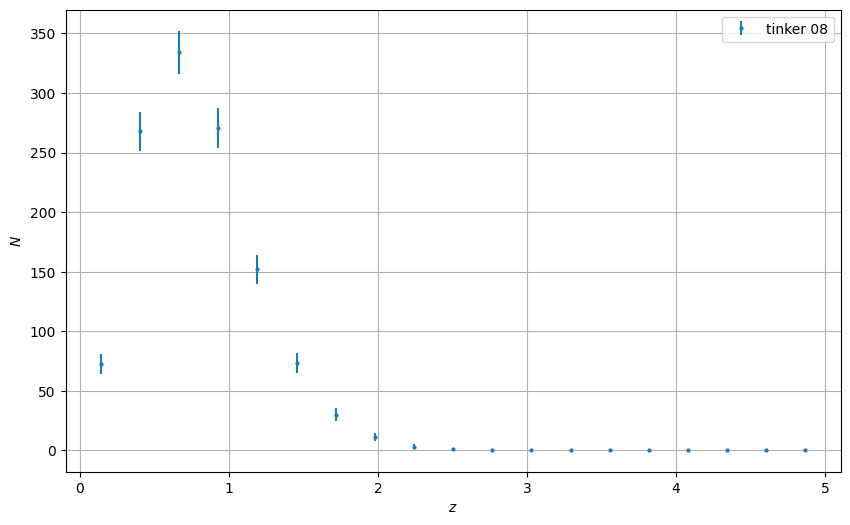

CPU times: user 82.3 ms, sys: 13.4 ms, total: 95.6 ms
Wall time: 98.3 ms


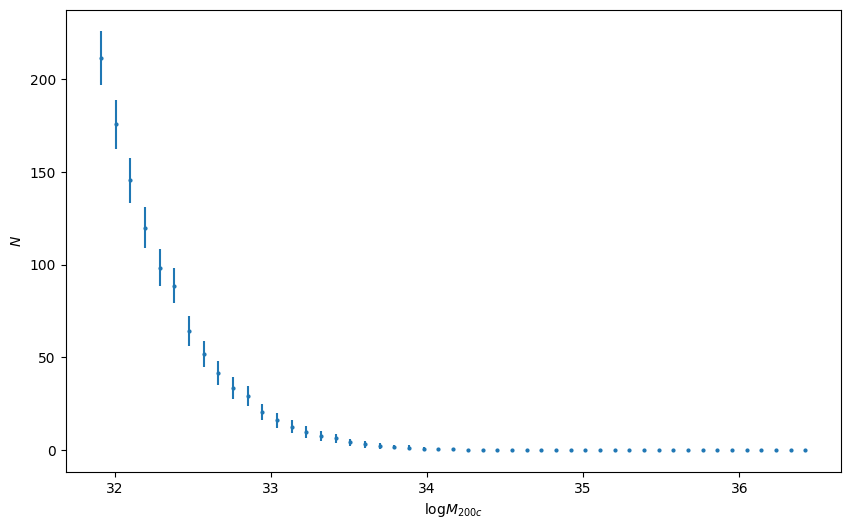

<Figure size 1000x600 with 0 Axes>

In [49]:
%%time

mass_limit = m200_min

# integrate over massses at each z:
filter_bin = (lnms>np.log(m200_min))  & (lnms > np.log(mass_limit))
dndz = np.trapz(dndmdz[filter_bin],x=lnms[filter_bin],axis=0)

ntot_th = np.trapz(dndz,x = zs)

nz = np.zeros((len(z_center)))

for (iz,zz) in enumerate(z_center): 
    filter_bin = (zs>z_edges[iz]) & (zs<z_edges[iz+1])
    nz[iz] = np.trapz(dndz[filter_bin],x=zs[filter_bin] )

    
# integrate over zs at each m:
# filter_bin = (lnms>np.log(1e15*h))
dndm = np.trapz(dndmdz,x=zs,axis=1)
nm = np.zeros((len(m_center)))

for (im,mm) in enumerate(m_center): 
    filter_bin = (lnms>m_edges[im]) & (lnms<m_edges[im+1]) & (lnms > np.log(mass_limit))
    nm[im] = np.trapz(dndm[filter_bin],x=lnms[filter_bin] )



    
# for index_cat in cat_indices:

#     catf_truth = fits.open('sim-kit_actnow_newcat_%d_ACT-DR5-largeRef-2Pass-1degTiles/actnow_newcat_%d_ACT-DR5-largeRef-2Pass-1degTiles_truthCatalog.fits'%(index_cat,index_cat))
#     data_truth = catf_truth[1].data

#     cat_df_truth = pd.DataFrame()
#     cat_df_truth['z'] = data_truth.field("redshift")
#     cat_df_truth['name'] = data_truth.field("name")
#     cat_df_truth['RADeg'] = data_truth.field("RADeg")
#     cat_df_truth['decDeg'] = data_truth.field("decDeg")
#     cat_df_truth['m200c'] = data_truth.field("true_M200c")
#     cat_df_truth['true_yc'] = data_truth.field("true_y_c")
#     cat_df_truth['M200c'] = cat_df_truth['m200c']*1e14*cosmo.h()
#     cat_df_truth['tileName'] = data_truth.field("tileName")
#     cat_df_truth['true_yc_post_sigmaint'] = data_truth.field("true_y_c_post_sigmaint")
    
#     wsim = catf_truth[1].header["fsky"]

#     filter_bin = cat_df_truth['M200c'].values > mass_limit
#     M200_truthcat = cat_df_truth['M200c'][filter_bin]
#     z_truthcat = cat_df_truth['z'][filter_bin]
#     yc_truthcat = cat_df_truth['true_yc'][filter_bin]
#     scatt_yc_truthcat = cat_df_truth['true_yc_post_sigmaint'][filter_bin]
    
#     N_clusters_z_truthcat, xedges_truthcat = np.histogram(z_truthcat, bins=z_edges)
#     N_clusters_m_truthcat, xedges_truthcat = np.histogram(np.log(M200_truthcat), bins=m_edges)
    
    
#     cat_nms.append(N_clusters_m_truthcat)
#     cat_nzs.append(N_clusters_z_truthcat)





#     if make_figure:

fig = plt.figure(figsize=(10,6))

        # n, bins, patches = plt.hist(x=np.repeat(z_center,
        #                                         N_clusters_z_truthcat), 
        #                             bins=z_edges, 
        #                             color='orange',
        #                             alpha=0.7, 
        #                             rwidth=0.95,
        #                             label='sim-cat')

plt.errorbar(z_center,nz,yerr=np.sqrt(nz),label='tinker 08',marker='o',markersize=2,ls='None')

plt.grid()
# plt.xlim(0,2.)
plt.legend(loc=1)
plt.xlabel(r'$z$')
plt.ylabel(r'$N$')
plt.yscale('linear')
plt.show()


fig = plt.figure(figsize=(10,6))


# n, bins, patches = plt.hist(x=np.repeat(m_center,
#                                         N_clusters_m_truthcat), 
#                             bins=m_edges, 
#                             color='orange',
#                             alpha=0.7, 
#                             rwidth=0.95,
#                             label='sim-cat')
plt.errorbar(m_center,nm,yerr=np.sqrt(nm),label='tinker 08',marker='o',markersize=2,
             ls='None')
plt.ylabel(r'$N$')
plt.xlabel(r"$\mathrm{log}M_{200c}$")

fig = plt.figure(figsize=(10,6))
        

In [50]:
nm.sum()

1149.7826266911245

# Planck benchmarking

In [1]:
%%time
from classy_sz import Class

M = Class()

M.set({
'output': 'sz_cluster_counts,m500c_to_m200c,m200c_to_m500,m200m_to_m500',
# 'output': 'sz_cluster_counts,m200m_to_m500',

'mass function'  : 'M500',
'concentration parameter' : 'B13',
    
    
    
'omega_b': 0.0224178568132,
'omega_cdm':  0.11933148326520002,
'H0': 67.66,
'ln10^{10}A_s': 2.9799585,
'tau_reio':  0.0561,
'n_s': 0.96,
    
    
'B':1.25,
    
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'T_ncdm' : 0.71611,
    
'z_min': 0.,
'z_max': 1.02,
'redshift_epsrel': 1e-6,
'redshift_epsabs': 1e-100,    
    

    
'M_min': 1e13*0.6766,
'M_max': 1e16*0.6766,
'mass_epsrel':1e-6,
'mass_epsabs':1e-100,
# 'ndim_redshifts':200, 
'ndim_redshifts' :3850,
# 'ndim_masses' : 200,
'n_m_dndlnM' : 3000,
'n_z_dndlnM' : 3850,

'm_pivot_ym_[Msun]': 3e14,  
    
'has_selection_function' : 1,
'experiment' : 0, # Planck: 0 / ACT or SO: 1
'y_m_relation' : 0, # ycenter : 1, # y500 : 0
'signal-to-noise_cut-off_for_survey_cluster_completeness' : 6.,

# 'sz_selection_function_thetas_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_thetas_120923_30bins.txt',
# 'sz_selection_function_skyfracs_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_skyfracs_120923_30bins.txt',
# 'sz_selection_function_ylims_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_ylims_120923_30bins.txt',    

# 'sz_selection_function_thetas_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/class_sz/class_sz_auxiliary_files/nemo_sim_thetas_030722_49bins.txt',
# 'sz_selection_function_skyfracs_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/class_sz/class_sz_auxiliary_files/nemo_sims_skyfracs_030722_49bins.txt',
# 'sz_selection_function_ylims_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/class_sz/class_sz_auxiliary_files/nemo_sim_ylims_030722_49bins.txt',    
   
    
'bin_z_min_cluster_counts' : 0.01,
'bin_z_max_cluster_counts' : 1.01,
'bin_dz_cluster_counts' : 0.1,

'bin_dlog10_snr' : 0.25,
'log10_snr_min' : 0.6,#np.log10(5.),
'log10_snr_max' : 2.,
# 'bin_dlog10_snr' : 0.25,
# 'log10_snr_min' : np.log10(5.),
# 'log10_snr_max' : 2.,



'dlny' : 0.05,
'lnymin' : -20., # planck  -11.5 so/act -11
'lnymax' : 10.,  # planck 10. so/act -5
'dlnM_cluster_count_completeness_grid' : 0.005,


'cluster_count_completeness_grid_z_cutoff_low' : 0.4,
'cluster_count_completeness_grid_z_cutoff_mid' : 1.,

'dz_cluster_count_completeness_grid_low_z' : 1e-3,
'dz_cluster_count_completeness_grid_mid_z' : 1e-2,
'dz_cluster_count_completeness_grid_high_z' : 1e-1,



'mass_epsrel_cluster_counts' : 1e-6,
'mass_epsabs_cluster_counts' : 1e-40,

'redshift_epsrel_cluster_counts' : 1e-6,
'redshift_epsabs_cluster_counts' : 1e-40,

    
# 'A_ym'  : 1.9e-05,
# 'B_ym'  : 0.08,
# 'C_ym' : 0.,
'sigmaM_ym' : 0.173,
# 'sigmaM_ym' :0.,
# 'm_pivot_ym_[Msun]' : 4.25e14,

'use_m500c_in_ym_relation' : 1,
'use_planck_binned_proba' : 0, #use diff of erfs
'use_skyaveraged_noise': 1, # this will speed-up everything

'szcc_dof': 3.,
'szcc_qtrunc': 2.,
    
'HMF_prescription_NCDM': 1,
'no_spline_in_tinker': 1,
        })
        
M.compute_class_szfast()
# M.compute()


2024-02-14 14:31:59.328450: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-02-14 14:31:59.328481: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-02-14 14:31:59.328486: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-02-14 14:31:59.328518: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-14 14:31:59.328536: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


CPU times: user 2min 25s, sys: 7.56 s, total: 2min 33s
Wall time: 34.5 s


In [3]:
import numpy as np
dNdzdy_theoretical = M.dndzdy_theoretical()['dndzdy']
z_center = M.dndzdy_theoretical()['z_center']
z_edges = M.dndzdy_theoretical()['z_edges']
log10y_center = M.dndzdy_theoretical()['log10y_center']
log10y_edges = M.dndzdy_theoretical()['log10y_edges']

N_z,N_y = np.shape(dNdzdy_theoretical)
N_clusters_z_theory = []
for iz in range(N_z):
    N_clusters_z_theory.append(np.sum(dNdzdy_theoretical[iz][0:]))
N_clusters_y_theory = []

for iy in range(N_y):
    N_clusters_y_theory.append(np.sum(np.asarray(dNdzdy_theoretical)[:,iy]))
    
# print total number of clusters: 
np.sum(N_clusters_z_theory)

702.4343390586114

In [4]:
# z_edges

In [5]:
%%time
M = Class()


szcounts_param ={
'output': 'sz_cluster_counts_fft,m500c_to_m200c,m200c_to_m500',
    
# 'mass function'  : 'T08M200c',
'mass function'  : 'M500',
'concentration parameter' : 'B13',
    
'omega_b': 0.0224178568132,
'omega_cdm':  0.11933148326520002,
'H0': 67.66,
'ln10^{10}A_s': 2.9799585,
'tau_reio':  0.0561,
'n_s': 0.96,
    
    
    
'B':1.25,
    
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'T_ncdm' : 0.71611,
# 'z_min': 0.,
# 'z_max': 2.,
'redshift_epsrel': 1e-4,
'redshift_epsabs': 1e-100,    
    

    
'M_min': 5e13,
'M_max': 1e16,
'mass_epsrel':1e-4,
'mass_epsabs':1e-100,
'ndim_redshifts':1850, 
'n_z_dndlnM' : 1850,
'szcounts_fft_nz' : 1850,
'n_m_dndlnM' : 1000,


    
'has_selection_function' : 1,
'experiment' : 0, # Planck: 0 / ACT or SO: 1
'y_m_relation' : 0, # ycenter : 1, # y500 : 0
'signal-to-noise_cut-off_for_survey_cluster_completeness' : 6.,

# 'sz_selection_function_thetas_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_thetas_120923_30bins.txt',
# 'sz_selection_function_skyfracs_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_skyfracs_120923_30bins.txt',
# 'sz_selection_function_ylims_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_ylims_120923_30bins.txt',    

# 'sz_selection_function_thetas_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/class_sz/class_sz_auxiliary_files/nemo_sim_thetas_030722_49bins.txt',
# 'sz_selection_function_skyfracs_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/class_sz/class_sz_auxiliary_files/nemo_sims_skyfracs_030722_49bins.txt',
# 'sz_selection_function_ylims_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/class_sz/class_sz_auxiliary_files/nemo_sim_ylims_030722_49bins.txt',    
   
    
    
# 'A_ym'  : 1.9e-05,
# 'B_ym'  : 0.08,
# 'C_ym' : 0.,
# 'sigmaM_ym' : 0.173,
'sigmaM_ym' : 0.173,
# 'm_pivot_ym_[Msun]' : 4.25e14,

'use_m500c_in_ym_relation' : 1,
'use_skyaveraged_noise': 1, # this will speed-up everything
    
    
'N_samp_fftw' : 2**12,
# 'N_samp_fftw' : 8192,

'szcounts_fft_nz' : 1850,

'z_min' : 0.0,
'z_max' : 1.02,
    
'szcounts_fft_z_min' : 0.01,
'szcounts_fft_z_max' : 1.01,
    
    
    
'tol_dlnm_dlnq':0.001,
'ntab_dlnm_dlnq':1000, # fiducial 1000

'szcounts_qmax_fft_padded':500.,
    
'sigma_derivative' : 0,
'szcc_dof': 3.,
'szcc_qtrunc':2.,

    
'HMF_prescription_NCDM': 1,
'no_spline_in_tinker': 1,
        }
M.set(szcounts_param)
        
M.compute_class_szfast()
# M.compute()

CPU times: user 42.5 s, sys: 2.81 s, total: 45.3 s
Wall time: 25 s


In [6]:
szcounts = M.szcounts_ntot_rates_loglike()
print(szcounts['ntot'],szcounts['loglike'])

707.698447358018 1449.8926443252174


In [7]:
zmin = szcounts_param['szcounts_fft_z_min']
zmax = szcounts_param['szcounts_fft_z_max']
nz = szcounts_param['szcounts_fft_nz']
z_arr = np.linspace(zmin,zmax,nz)

q_threshold = 6.
q_max = 100.
nq = 5000
q_arr = np.geomspace(q_threshold, q_max,nq)
dq = (q_max-q_threshold)/(nq-1.)
dz = (zmax - zmin)/(nz-1.)
get_dndzdq = np.vectorize(M.get_szcounts_dndzdq_at_z_q)
Nz = []
for zp in z_arr:
    Nz.append(np.trapz(get_dndzdq(zp,q_arr)*q_arr,x=np.log(q_arr)))
Nz = np.asarray(Nz)
Nq = []
for qp in q_arr:
    Nq.append(np.trapz(get_dndzdq(z_arr,qp),x=z_arr))
Nq = np.asarray(Nq)
Ntot = np.trapz(Nz,x=z_arr)
# Ntot = np.sum(Nz)*dz
Ntot

z_edges_low = z_edges[:-1]
z_edges_high = z_edges[1:]
Nz_binned = []
for (zm,zp) in zip(z_edges_low,z_edges_high):
    z_arr_bin = np.linspace(zm,zp,50)
    Nz_in = []
    for zpbin in z_arr_bin:
        Nz_in.append(np.trapz(get_dndzdq(zpbin,q_arr)*q_arr,x=np.log(q_arr)))
    Nz_binned.append(np.trapz(Nz_in,x=z_arr_bin))
Nz_binned = np.asarray(Nz_binned)

q_edges_low = log10y_edges[:-1]
q_edges_low[0] = 0.6
q_edges_high = log10y_edges[1:]
Nq_binned = []
for (qm,qp) in zip(q_edges_low,q_edges_high):
    q_arr_bin = np.linspace(qm,qp,50)
    Nq_in = []
    for qpbin in q_arr_bin:
        if 10.**qpbin<q_threshold:
            Nq_in.append(0.)
        else:
            Nq_in.append(np.trapz(get_dndzdq(z_arr,10**qpbin),x=z_arr))
    Nq_binned.append(np.trapz(Nq_in,x=10**q_arr_bin))
Nq_binned = np.asarray(Nq_binned)

In [8]:
%%time
import cnc as cnc
import classy_sz
import numpy as np
number_counts = cnc.cluster_number_counts()
cnc_params = number_counts.cnc_params
#### set params here
cnc_params_new = {
    # "number_cores": 1,
    # "number_cores_hmf": 1,
    'cosmology_tool': "classy_sz",

    "n_points": 2**16,#2**7, #number of points in which the mass function at each redshift (and all the convolutions) is evaluated
    "M_min": 1e13,
    "M_max": 1e16,
    "hmf_type": "Tinker08",
    "mass_definition": "500c",
    "hmf_type_deriv": "numerical",
    "power_spectrum_type": "cosmopower",

    "obs_select_min": 6.,
    "obs_select_max": 100.,
    "n_obs_select": 100000,
    "z_min": 0.01,
    "z_max": 1.01,
    "n_z": 2000,

    "obs_select": "q_mmf3_mean", #"q_mmf3_mean",
    "n_patches": 1,
    "cov_patch_dependent":False,
    "obs_select_uncorrelated":False,
    "all_layers_uncorrelated":False, #if True, all observables have uncorrelated scatter
    "last_layer_uncorrelated":False, #if True, it means that the last layer of the observables is uncorrelated
    "first_layer_power_law":False,
    # "obs_mass": ["q_mmf3_mean"],
    "observables": [["q_mmf3_mean"]],

    "cluster_catalogue":"Planck_MMF3_cosmo",

    "cosmo_amplitude_parameter": "A_s",
    "bins_edges_z": np.linspace(0.01,1.01,11),
    "bins_edges_obs_select": np.exp(np.linspace(np.log(6.),np.log(60),6)),
    "non_validated_clusters": False,
    "binned_lik_type":"z_and_obs_select",

    "stacked_likelihood": False,
    # "stacked_data": ["p_zc19_stacked"], #list of stacked data
    # "compute_stacked_cov": False,
    #
    # #Parms to compute mass calibration likelihood in an alternative way
    #
    "likelihood_cal_alt": False,
    # # "observables_cal": ["p_zc19"],
    #
    # #Priors
    #
    # "priors": False,
    # "theta_mc_prior": False,
    "catalogue_params":{"downsample":False},
    "hmf_calc": "classy_sz",
    "number_cores_hmf": 1,
    "number_cores_abundance": 1,
    "number_cores_data": 1,
    "number_cores_stacked":1,
    "parallelise_type": "patch",
    "scalrel_type_deriv": "numerical",
    'apply_obs_cutoff' : True,
    "abundance_integral_type":"fft",
    "compute_abundance_matrix":True,
    # 'm_ncdm'

    # 'tenToA0' : 1.9e-5,
    # 'B0 ': 0.08,
    # 'SZmPivot' : 4.25e14,
    'bias_sz' : 0.8,
    'sigma_lnq' : 0.173,
    # 'sigma_lnq' : 0.
    
    "Om0":0.3096,
    "Ob0":0.04897,
    "h":0.6766,
    "A_s":1.9687e-9,
    "n_s":0.96,
    "m_nu":0.06,
    'tau_reio':  0.0561,
    "dof":3.,
    
}
for k,v in cnc_params_new.items():
    cnc_params[k] = v
number_counts.cnc_params = cnc_params
number_counts.initialise()

cosmo_params = number_counts.cosmo_params
scal_rel_params = number_counts.scal_rel_params
# print(cosmo_params)

# cosmo_params["H0"] = 68.
for k,v in cnc_params_new.items():
    cosmo_params[k] = v
    scal_rel_params[k] = v

number_counts.get_number_counts()
number_counts.get_abundance_matrix()
# log_lik_binned = number_counts.get_lik_binned()
dndz = number_counts.n_z
dndq = number_counts.n_obs
cnc_zs = number_counts.redshift_vec
cnc_qs = number_counts.obs_select_vec
# print("dndz:",dndz)
# print("dndq:",dndq)
# print("cnc_zs:",cnc_zs)
# print("cnc_qs:",cnc_qs)

using classy_sz
N tot 706.7586202671132
CPU times: user 43.2 s, sys: 6.24 s, total: 49.5 s
Wall time: 46.6 s


In [9]:
from scipy import interpolate
zmin = cnc_zs[0]
zmax = cnc_zs[-1]
nz = len(cnc_zs)
z_arr = cnc_zs

q_threshold = cnc_qs[0]
q_max = cnc_qs[-1]
nq = len(cnc_qs)
q_arr = cnc_qs
dq = (q_max-q_threshold)/(nq-1.)
dz = (zmax - zmin)/(nz-1.)
# get_dndzdq = np.vectorize(M.get_szcounts_dndzdq_at_z_q)
# Nz = []
# for zp in z_arr:
#     Nz.append(np.trapz(get_dndzdq(zp,q_arr)*q_arr,x=np.log(q_arr)))
# Nz = np.asarray(Nz)
# Nq = []
# for qp in q_arr:
#     Nq.append(np.trapz(get_dndzdq(z_arr,qp),x=z_arr))
# Nq = np.asarray(Nq)
Ntot = np.trapz(dndz,x=z_arr)
# Ntot = np.sum(Nz)*dz
print(Ntot)

z_edges_low = z_edges[:-1]
z_edges_high = z_edges[1:]
Nz_binned_cnc = []
for (zm,zp) in zip(z_edges_low,z_edges_high):
    z_arr_bin = np.linspace(zm,zp,50)
    # Nz_in = []
    # for zpbin in z_arr_bin:
    #     Nz_in.append(np.trapz(get_dndzdq(zpbin,q_arr)*q_arr,x=np.log(q_arr)))
    dndz_inter = interpolate.interp1d(cnc_zs,dndz,bounds_error=False,fill_value=0.)
    # dndz_inter = np.interp(z_arr_bin,cnc_zs,dndz)
    Nz_binned_cnc.append(np.trapz(dndz_inter(z_arr_bin),x=z_arr_bin))
Nz_binned_cnc = np.asarray(Nz_binned_cnc)

q_edges_low = log10y_edges[:-1]
q_edges_low[0] = 0.6
q_edges_high = log10y_edges[1:]
Nq_binned_cnc = []
for (qm,qp) in zip(q_edges_low,q_edges_high):
    q_arr_bin = np.linspace(qm,qp,50)
    # Nq_in = []
    # for qpbin in q_arr_bin:
    #     if 10.**qpbin<q_threshold:
    #         Nq_in.append(0.)
    #     else:
    #         Nq_in.append(np.trapz(get_dndzdq(z_arr,10**qpbin),x=z_arr))
    dndq_inter = interpolate.interp1d(cnc_qs,dndq,bounds_error=False,fill_value=0.)
    Nq_binned_cnc.append(np.trapz(dndq_inter(10**q_arr_bin),x=10**q_arr_bin))
Nq_binned_cnc = np.asarray(Nq_binned_cnc)

706.7572158222973


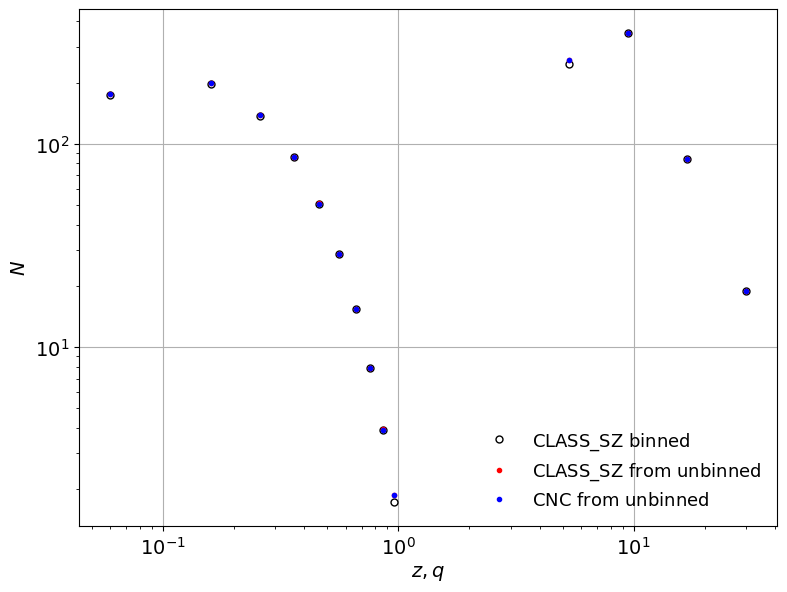

In [10]:
# color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

plt.figure(figsize=(8,6))
# plt.plot(z_slt, Nz_slt, color='green', marker='o', alpha=1., label='SOLikeT/ccl binned')
plt.errorbar(z_center,N_clusters_z_theory,#yerr=np.sqrt(N_clusters_z_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,binned}$',capsize=5,c='k')
plt.errorbar(np.asarray(z_center),Nz_binned,#yerr=np.sqrt(Nz_binned),
             marker='o',markersize=3.,ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,from\,\,unbinned}$',capsize=5,c='red')


plt.errorbar(np.asarray(z_center),Nz_binned_cnc,#yerr=np.sqrt(Nz_binned),
             marker='o',markersize=3.,ls='none',
            label=r'$\mathrm{CNC\,\,from\,\,unbinned}$',capsize=5,c='blue')

# plt.plot(q_slt, Nq_slt, color='green', marker='o', alpha=1., #label='SOLikeT Nq'
#         )
plt.errorbar(10**np.asarray(log10y_center),N_clusters_y_theory,#yerr=np.sqrt(N_clusters_y_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            #label=r'$\mathrm{CLASS\_SZ\,\,binned}$',
             capsize=5,c='k')
plt.errorbar(10**(np.asarray(log10y_center)),Nq_binned,#yerr=np.sqrt(Nq_binned),
             marker='o',markersize=3.,ls='none',
            #label=r'$\mathrm{CLASS\_SZ\,\,from\,\,unbinned}$',
             capsize=5,c='red')

plt.errorbar(10**(np.asarray(log10y_center)),Nq_binned_cnc,#yerr=np.sqrt(Nq_binned),
             marker='o',markersize=3.,ls='none',
            #label=r'$\mathrm{CLASS\_SZ\,\,from\,\,unbinned}$',
             capsize=5,c='blue')


plt.xlabel('$z,q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,frameon=False)
plt.grid()
plt.tight_layout()
plt.loglog()
plt.show()

# ACT benchmarking

this works when mass function set to T08M200c (see inside cnc for now)
for some reason it doesnt work when i ask M500... Prob in cnc, or class_sz.. need to check !

In [1203]:
%%time
from classy_sz import Class

M = Class()

M.set({
'output': 'sz_cluster_counts,m500c_to_m200c,m200c_to_m500',

'mass function'  : 'T08M200c',
'concentration parameter' : 'B13',
    
    
    
'omega_b': 0.0224178568132,
'omega_cdm':  0.11933148326520002,
'H0': 67.66,
'ln10^{10}A_s': 2.9799585,
'tau_reio':  0.0561,
'n_s': 0.96,
    
    
'B':1.,
    
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'T_ncdm' : 0.71611,
    
'z_min': 0.,
'z_max': 2.02,
'redshift_epsrel': 1e-6,
'redshift_epsabs': 1e-100,    
    

    
'M_min': 1e13*0.6766,
'M_max': 1e16*0.6766,
'mass_epsrel':1e-6,
'mass_epsabs':1e-100,
# 'ndim_redshifts':200, 
'ndim_redshifts' :500,
# 'ndim_masses' : 200,
'n_m_dndlnM' : 500,
'n_z_dndlnM' : 500,

# 'm_pivot_ym_[Msun]': 3e14,  
    
'has_selection_function' : 1,
'experiment' : 1, # Planck: 0 / ACT or SO: 1
'y_m_relation' : 1, # ycenter : 1, # y500 : 0
'signal-to-noise_cut-off_for_survey_cluster_completeness' : 5.,

'sz_selection_function_thetas_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_thetas_120923_30bins.txt',
'sz_selection_function_skyfracs_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_skyfracs_120923_30bins.txt',
'sz_selection_function_ylims_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_ylims_120923_30bins.txt',    


'bin_z_min_cluster_counts' : 0.01,
'bin_z_max_cluster_counts' : 2.01,
'bin_dz_cluster_counts' : 0.1,

'bin_dlog10_snr' : 0.25,
'log10_snr_min' : 0.6,#np.log10(5.),
'log10_snr_max' : 2.,
# 'bin_dlog10_snr' : 0.25,
# 'log10_snr_min' : np.log10(5.),
# 'log10_snr_max' : 2.,



'dlny' : 0.05,
'lnymin' : -20., # planck  -11.5 so/act -11
'lnymax' : 10.,  # planck 10. so/act -5
'dlnM_cluster_count_completeness_grid' : 0.005,


'cluster_count_completeness_grid_z_cutoff_low' : 0.4,
'cluster_count_completeness_grid_z_cutoff_mid' : 1.,

'dz_cluster_count_completeness_grid_low_z' : 1e-3,
'dz_cluster_count_completeness_grid_mid_z' : 1e-2,
'dz_cluster_count_completeness_grid_high_z' : 1e-1,



'mass_epsrel_cluster_counts' : 1e-6,
'mass_epsabs_cluster_counts' : 1e-40,

'redshift_epsrel_cluster_counts' : 1e-6,
'redshift_epsabs_cluster_counts' : 1e-40,

    
'A_ym'  : 1.9e-05,
'B_ym'  : 0.08,
'C_ym' : 0.,
'sigmaM_ym' : 0.173,
# 'sigmaM_ym' :0.,
'm_pivot_ym_[Msun]' : 4.25e14,

'use_m500c_in_ym_relation' : 0,
'use_m200c_in_ym_relation' : 1,
'use_planck_binned_proba' : 0, #use diff of erfs
'use_skyaveraged_noise': 0, # this will speed-up everything

'szcc_dof': 3.,
'szcc_qtrunc': 2.,
    
'HMF_prescription_NCDM': 1,
'no_spline_in_tinker': 1,
        })
        
M.compute_class_szfast()
# M.compute()


CPU times: user 25.1 s, sys: 525 ms, total: 25.7 s
Wall time: 4.89 s


In [1204]:
dNdzdy_theoretical = M.dndzdy_theoretical()['dndzdy']
z_center = M.dndzdy_theoretical()['z_center']
z_edges = M.dndzdy_theoretical()['z_edges']
log10y_center = M.dndzdy_theoretical()['log10y_center']
log10y_edges = M.dndzdy_theoretical()['log10y_edges']

N_z,N_y = np.shape(dNdzdy_theoretical)
N_clusters_z_theory = []
for iz in range(N_z):
    N_clusters_z_theory.append(np.sum(dNdzdy_theoretical[iz][0:]))
N_clusters_y_theory = []

for iy in range(N_y):
    N_clusters_y_theory.append(np.sum(np.asarray(dNdzdy_theoretical)[:,iy]))
    
# print total number of clusters: 
np.sum(N_clusters_z_theory)

2729.104791728495

In [18]:
2727.186498364335

In [20]:
%%time
M = Class()


szcounts_param ={
'output': 'sz_cluster_counts_fft,m500c_to_m200c,m200c_to_m500',
    
'mass function'  : 'T08M200c',
# 'mass function'  : 'M500',
'concentration parameter' : 'B13',
    
'omega_b': 0.0224178568132,
'omega_cdm':  0.11933148326520002,
'H0': 67.66,
'ln10^{10}A_s': 2.9799585,
'tau_reio':  0.0561,
'n_s': 0.96,
    
    
    
'B':1.,
    
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'T_ncdm' : 0.71611,
# 'z_min': 0.,
# 'z_max': 2.,
'redshift_epsrel': 1e-4,
'redshift_epsabs': 1e-100,    
    

    
'M_min': 5e13*0.6766,
'M_max': 1e16*0.6766,
'mass_epsrel':1e-4,
'mass_epsabs':1e-100,
'ndim_redshifts':185, 
'n_z_dndlnM' : 185,
'szcounts_fft_nz' : 185,
'n_m_dndlnM' : 100,


    
'has_selection_function' : 1,
'experiment' : 1, # Planck: 0 / ACT or SO: 1
'y_m_relation' : 1, # ycenter : 1, # y500 : 0
'signal-to-noise_cut-off_for_survey_cluster_completeness' : 5.,

'sz_selection_function_thetas_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_thetas_120923_30bins.txt',
'sz_selection_function_skyfracs_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_skyfracs_120923_30bins.txt',
'sz_selection_function_ylims_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_ylims_120923_30bins.txt',    


    
    
'A_ym'  : 1.9e-05,
'B_ym'  : 0.08,
'C_ym' : 0.,
# 'sigmaM_ym' : 0.173,
'sigmaM_ym' : 0.173,
'm_pivot_ym_[Msun]' : 4.25e14,

'use_m500c_in_ym_relation' : 0,
'use_m200c_in_ym_relation' : 1,
'use_skyaveraged_noise': 0, # this will speed-up everything
    
    
# 'N_samp_fftw' : 2**12,
'N_samp_fftw' : 4056,

'szcounts_fft_nz' : 250,

'z_min' : 0.0,
'z_max' : 2.02,
    
'szcounts_fft_z_min' : 0.01,
'szcounts_fft_z_max' : 2.01,
    
    
    
'tol_dlnm_dlnq':0.001,
'ntab_dlnm_dlnq':1000, # fiducial 1000

'szcounts_qmax_fft_padded':500.,
    
'sigma_derivative' : 0,
'szcc_dof': 3.,
'szcc_qtrunc':2.,

    
'HMF_prescription_NCDM': 1,
'no_spline_in_tinker': 1,
        }
M.set(szcounts_param)
        
M.compute_class_szfast()
# M.compute()

CPU times: user 41.6 s, sys: 609 ms, total: 42.2 s
Wall time: 6.75 s


In [21]:
M.sigma8()

0.7814144359696676

In [22]:
szcounts = M.szcounts_ntot_rates_loglike()
print(szcounts['ntot'],szcounts['loglike'])

2758.5966583647187 -520.556279884886


In [23]:
szcounts = M.szcounts_ntot_rates_loglike()
print(szcounts['ntot'],szcounts['loglike'])

2758.5966583647187 -520.556279884886


In [24]:
zmin = szcounts_param['szcounts_fft_z_min']
zmax = szcounts_param['szcounts_fft_z_max']
nz = szcounts_param['szcounts_fft_nz']
z_arr = np.linspace(zmin,zmax,nz)

q_threshold = 5.
q_max = 100.
nq = 5000
q_arr = np.geomspace(q_threshold, q_max,nq)
dq = (q_max-q_threshold)/(nq-1.)
dz = (zmax - zmin)/(nz-1.)
get_dndzdq = np.vectorize(M.get_szcounts_dndzdq_at_z_q)
Nz = []
for zp in z_arr:
    Nz.append(np.trapz(get_dndzdq(zp,q_arr)*q_arr,x=np.log(q_arr)))
Nz = np.asarray(Nz)
Nq = []
for qp in q_arr:
    Nq.append(np.trapz(get_dndzdq(z_arr,qp),x=z_arr))
Nq = np.asarray(Nq)
Ntot = np.trapz(Nz,x=z_arr)
# Ntot = np.sum(Nz)*dz
Ntot

z_edges_low = z_edges[:-1]
z_edges_high = z_edges[1:]
Nz_binned = []
for (zm,zp) in zip(z_edges_low,z_edges_high):
    z_arr_bin = np.linspace(zm,zp,50)
    Nz_in = []
    for zpbin in z_arr_bin:
        Nz_in.append(np.trapz(get_dndzdq(zpbin,q_arr)*q_arr,x=np.log(q_arr)))
    Nz_binned.append(np.trapz(Nz_in,x=z_arr_bin))
Nz_binned = np.asarray(Nz_binned)

q_edges_low = log10y_edges[:-1]
q_edges_low[0] = 0.6
q_edges_high = log10y_edges[1:]
Nq_binned = []
for (qm,qp) in zip(q_edges_low,q_edges_high):
    q_arr_bin = np.linspace(qm,qp,50)
    Nq_in = []
    for qpbin in q_arr_bin:
        if 10.**qpbin<q_threshold:
            Nq_in.append(0.)
        else:
            Nq_in.append(np.trapz(get_dndzdq(z_arr,10**qpbin),x=z_arr))
    Nq_binned.append(np.trapz(Nq_in,x=10**q_arr_bin))
Nq_binned = np.asarray(Nq_binned)

In [60]:
%%time
import cnc as cnc
import classy_sz
import numpy as np
number_counts = cnc.cluster_number_counts()
cnc_params = number_counts.cnc_params
#### set params here
cnc_params_new = {
    # "number_cores": 1,
    # "number_cores_hmf": 1,
    'cosmology_tool': "classy_sz",

    "n_points": 2**15,#2**7, #number of points in which the mass function at each redshift (and all the convolutions) is evaluated
    "M_min": 1e13,
    "M_max": 1e16,
    "hmf_type": "Tinker08",
    "mass_definition": "200c",
    "hmf_type_deriv": "numerical",
    "power_spectrum_type": "cosmopower",

    "obs_select_min": 5.,
    "obs_select_max": 100.,
    "n_obs_select": 10000,
    "z_min": 0.01,
    "z_max": 2.01,
    "n_z": 2000,

    # "obs_select": "q_mmf3_mean", #"q_mmf3_mean",
    # "n_patches": 1,
    "cov_patch_dependent":False,
    "obs_select_uncorrelated":False,
    "all_layers_uncorrelated":False, #if True, all observables have uncorrelated scatter
    "last_layer_uncorrelated":False, #if True, it means that the last layer of the observables is uncorrelated
    "first_layer_power_law":False,
    # "obs_mass": ["q_mmf3_mean"],
    # "observables": [["q_mmf3_mean"]],

    # "cluster_catalogue":"Planck_MMF3_cosmo",
    
    'observables': [["q_act"]],
    'obs_select': "q_act",
    'cluster_catalogue' : 'act',
    

    "cosmo_amplitude_parameter": "A_s",
    "bins_edges_z": np.linspace(0.01,1.01,11),
    "bins_edges_obs_select": np.exp(np.linspace(np.log(6.),np.log(60),6)),
    "non_validated_clusters": False,
    "binned_lik_type":"z_and_obs_select",

    "stacked_likelihood": False,
    # "stacked_data": ["p_zc19_stacked"], #list of stacked data
    # "compute_stacked_cov": False,
    #
    # #Parms to compute mass calibration likelihood in an alternative way
    #
    "likelihood_cal_alt": False,
    # # "observables_cal": ["p_zc19"],
    #
    # #Priors
    #
    # "priors": False,
    # "theta_mc_prior": False,
    "catalogue_params":{"downsample":False},
    
    "hmf_calc": "classy_sz",
    
    "number_cores_hmf": 1,
    "number_cores_abundance": 1,
    "number_cores_data": 1,
    "number_cores_stacked":1,
    "parallelise_type": "patch",
    "scalrel_type_deriv": "numerical",
    'apply_obs_cutoff' : True,
    "abundance_integral_type":"fft",
    "compute_abundance_matrix":True,
    # 'm_ncdm'

    'tenToA0' : 1.9e-5,
    'B0 ': 0.08,
    'SZmPivot' : 4.25e14,
    'bias_sz' : 1.,
    'sigma_lnq' : 0.173,
    # 'sigma_lnq' : 0.
# 'A_ym'  : 1.9e-05,
# 'B_ym'  : 0.08,
'C0' : 0.,
    
    "Om0":0.3096,
    "Ob0":0.04897,
    "h":0.6766,
    "A_s":1.9687e-9,
    "n_s":0.96,
    "m_nu":0.06,
    'tau_reio':  0.0561,
    "dof":3.,
    
    "classy_sz_ndim_redshifts" : 200,
    "classy_sz_ndim_masses" : 200,
    
}
for k,v in cnc_params_new.items():
    cnc_params[k] = v
number_counts.cnc_params = cnc_params
number_counts.initialise()

cosmo_params = number_counts.cosmo_params
scal_rel_params = number_counts.scal_rel_params
# print(cosmo_params)

# cosmo_params["H0"] = 68.
for k,v in cnc_params_new.items():
    cosmo_params[k] = v
    scal_rel_params[k] = v

number_counts.get_number_counts()
number_counts.get_abundance_matrix()
# log_lik_binned = number_counts.get_lik_binned()
dndz = number_counts.n_z
dndq = number_counts.n_obs
cnc_zs = number_counts.redshift_vec
cnc_qs = number_counts.obs_select_vec
# print("dndz:",dndz)
# print("dndq:",dndq)
# print("cnc_zs:",cnc_zs)
# print("cnc_qs:",cnc_qs)

N tot 2769.987582494032
CPU times: user 8min 10s, sys: 26.4 s, total: 8min 36s
Wall time: 8min 41s


In [61]:
from scipy import interpolate
zmin = cnc_zs[0]
zmax = cnc_zs[-1]
nz = len(cnc_zs)
z_arr = cnc_zs

q_threshold = cnc_qs[0]
q_max = cnc_qs[-1]
nq = len(cnc_qs)
q_arr = cnc_qs
dq = (q_max-q_threshold)/(nq-1.)
dz = (zmax - zmin)/(nz-1.)
# get_dndzdq = np.vectorize(M.get_szcounts_dndzdq_at_z_q)
# Nz = []
# for zp in z_arr:
#     Nz.append(np.trapz(get_dndzdq(zp,q_arr)*q_arr,x=np.log(q_arr)))
# Nz = np.asarray(Nz)
# Nq = []
# for qp in q_arr:
#     Nq.append(np.trapz(get_dndzdq(z_arr,qp),x=z_arr))
# Nq = np.asarray(Nq)
Ntot = np.trapz(dndz,x=z_arr)
# Ntot = np.sum(Nz)*dz
print(Ntot)

z_edges_low = z_edges[:-1]
z_edges_high = z_edges[1:]
Nz_binned_cnc = []
for (zm,zp) in zip(z_edges_low,z_edges_high):
    z_arr_bin = np.linspace(zm,zp,50)
    # Nz_in = []
    # for zpbin in z_arr_bin:
    #     Nz_in.append(np.trapz(get_dndzdq(zpbin,q_arr)*q_arr,x=np.log(q_arr)))
    dndz_inter = interpolate.interp1d(cnc_zs,dndz,bounds_error=False,fill_value=0.)
    # dndz_inter = np.interp(z_arr_bin,cnc_zs,dndz)
    Nz_binned_cnc.append(np.trapz(dndz_inter(z_arr_bin),x=z_arr_bin))
Nz_binned_cnc = np.asarray(Nz_binned_cnc)

q_edges_low = log10y_edges[:-1]
q_edges_low[0] = 0.6
q_edges_high = log10y_edges[1:]
Nq_binned_cnc = []
for (qm,qp) in zip(q_edges_low,q_edges_high):
    q_arr_bin = np.linspace(qm,qp,50)
    # Nq_in = []
    # for qpbin in q_arr_bin:
    #     if 10.**qpbin<q_threshold:
    #         Nq_in.append(0.)
    #     else:
    #         Nq_in.append(np.trapz(get_dndzdq(z_arr,10**qpbin),x=z_arr))
    dndq_inter = interpolate.interp1d(cnc_qs,dndq,bounds_error=False,fill_value=0.)
    Nq_binned_cnc.append(np.trapz(dndq_inter(10**q_arr_bin),x=10**q_arr_bin))
Nq_binned_cnc = np.asarray(Nq_binned_cnc)

2769.986858447905


In [34]:
import soliket
from cobaya.model import get_model
params = {
    'h': 0.6766,
    'n_s': 0.96,
    'Omega_b': 0.049,      
    'Omega_c': 0.3096-0.04897, 
    # 'sigma8': 0.81,
    'sigma8': 0.7814144359696676,
    # "A_s":1.9687e-9,
    'tenToA0': 1.9e-5,
    'B0': 0.08,
    'scatter_sz': 0.173,
    'bias_sz': 1.,
    'm_nu': 0.06,
    'C0': 0. ### not used in current soliket
    
    # "Om0":0.3096,
    # "Ob0":0.04897,
    # "h":0.6766,
    # "A_s":1.9687e-9,
    # "n_s":0.96,
    # "m_nu":0.06,
    # 'tau_reio':  0.0561,
    # "dof":3.,

}

# path2data ='/Users/boris/Work/nemosimkit/sim-kit_NemoCCL_A10tSZ_DR5Atmos_ACT-DR5-2Pass_scatter_realisation2/NemoCCL_A10tSZ_DR5Atmos_ACT-DR5-2Pass_scatter_realisation2/'
# path2data ='/Users/boris/Desktop/bkp2/soliket_trash/binned_clusters/data/advact/DR5CosmoSims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned'
path2data ='/Users/boris/Work/CLASS-SZ/SO-SZ/SOLikeT/soliket/clusters/data/advact/DR5CosmoSims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned'

info = {
    'params': params,
    'likelihood': {'soliket.BinnedClusterLikelihood': {
    'verbose': False,
    'data': {
        'data_path': path2data,
        'cat_file': "NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_mass.fits",
        'Q_file': "selFn/QFit.fits",
        'tile_file': "selFn/tileAreas.txt",
        'rms_file': "selFn/RMSTab.fits"
    },
    'theorypred': {
        'choose_theory': "CCL",
        'massfunc_mode': 'ccl',
        'compl_mode': 'erf_diff',
        'md_hmf': '200c',
        'md_ym': '200c'
        
    },
    'YM': {
        'Mpivot': 4.25e14
    },
    'selfunc': {
        'SNRcut': 5.,
        'method': 'SNRbased',
        'whichQ': 'fit',
        'resolution': 'downsample',
        'dwnsmpl_bins': 30,
        'save_dwsmpld': False,
        'debiasDOF' : 3.,
        'debias_cutoff' : 2.
    },
    'binning': {
        'z': {
            'zmin': 0.01,
            'zmax': 2.01,
            'dz': 0.1
        },
        'q': {
            'log10qmin': 0.6,
            'log10qmax': 2.0,
            'dlog10q': 0.25
        },
        'M': {
            'Mmin': 5e13,
            'Mmax': 1e16,
            'dlogM': 0.01
        },
        'exclude_zbin' : -1.,
    }
    }},
    'theory': {'soliket.clusters.CCL': 
               {'transfer_function': 'boltzmann_camb',
                'matter_pk': 'halofit',
                'baryons_pk': 'nobaryons',
                'md_hmf': '200c'}} ## uses t08 m200c and B13 for m200c->m500c
}

# initialisation 
model = get_model(info)
like = model.likelihood['soliket.BinnedClusterLikelihood']
model.loglikes({})[0]

 ::: 2D ln likelihood =  -253.7751737853214


array([-253.77517379])

In [35]:
pk_intp = like.theory.get_Pk_interpolator(("delta_nonu", "delta_nonu"), nonlinear=False)
SZparams = {
    'tenToA0': 1.9e-05,
    'B0': 0.08,
    'C0': 0., # not read by soliket
    'scatter_sz': 0.173,
    'bias_sz': 1.,
}

In [36]:
Nzq = like._get_theory(pk_intp, **SZparams)
z_slt, q_slt, catNzq, zcut = like.delN2Dcat

Nq_slt = np.zeros(len(q_slt))
for i in range(len(q_slt)):
    Nq_slt[i] = Nzq[:,i].sum()    
Nz_slt = np.zeros(len(z_slt))
for i in range(len(z_slt)):
    Nz_slt[i] = Nzq[i, :].sum()    
    
bin_params = info['likelihood']['soliket.BinnedClusterLikelihood']['binning']

zbins = np.arange(bin_params['z']['zmin'], bin_params['z']['zmax'] + bin_params['z']['dz'], \
                  bin_params['z']['dz'])

logqmin = bin_params['q']['log10qmin']
logqmax = bin_params['q']['log10qmax']
dlogq = bin_params['q']['dlog10q']

# TODO: I removed the bin where everything is larger than qmax - is this ok?
qbins = 10**np.arange(logqmin, logqmax+dlogq, dlogq)
print(np.sum(Nz_slt))

2732.273793369324


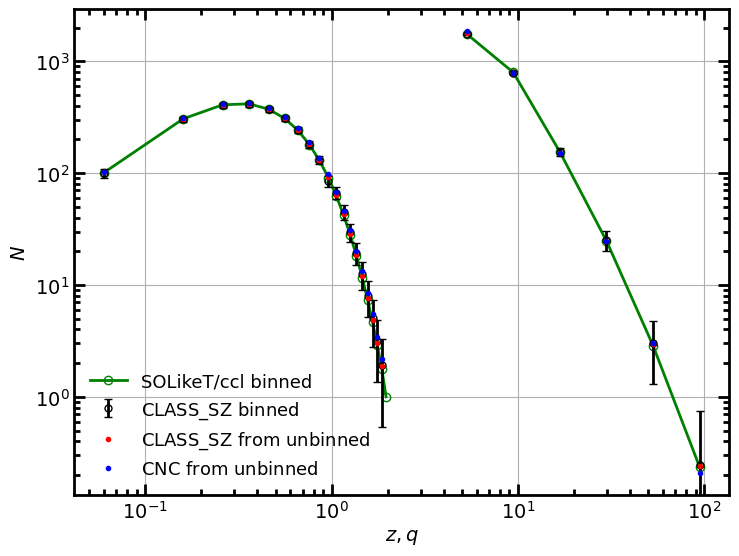

In [46]:
# color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

plt.figure(figsize=(8,6))
plt.plot(z_slt, Nz_slt, color='green', marker='o', alpha=1., label='SOLikeT/ccl binned',
        markerfacecolor=None,markeredgecolor='green',fillstyle='none',)
plt.errorbar(z_center,N_clusters_z_theory,yerr=np.sqrt(N_clusters_z_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,binned}$',capsize=3,c='k')
plt.errorbar(np.asarray(z_center),Nz_binned,#yerr=np.sqrt(Nz_binned),
             marker='o',markersize=3.,ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,from\,\,unbinned}$',capsize=5,c='red')


plt.errorbar(np.asarray(z_center),Nz_binned_cnc,#yerr=np.sqrt(Nz_binned),
             marker='o',markersize=3.,ls='none',
            label=r'$\mathrm{CNC\,\,from\,\,unbinned}$',capsize=5,c='blue')

plt.plot(q_slt, Nq_slt, color='green', marker='o', alpha=1., #label='SOLikeT Nq'
         markerfacecolor=None,markeredgecolor='green',fillstyle='none',
        )
plt.errorbar(10**np.asarray(log10y_center),N_clusters_y_theory,yerr=np.sqrt(N_clusters_y_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            #label=r'$\mathrm{CLASS\_SZ\,\,binned}$',
             capsize=3,c='k')
plt.errorbar(10**(np.asarray(log10y_center)),Nq_binned,#yerr=np.sqrt(Nq_binned),
             marker='o',markersize=3.,ls='none',
            #label=r'$\mathrm{CLASS\_SZ\,\,from\,\,unbinned}$',
             capsize=5,c='red')

plt.errorbar(10**(np.asarray(log10y_center)),Nq_binned_cnc,#yerr=np.sqrt(Nq_binned),
             marker='o',markersize=3.,ls='none',
            #label=r'$\mathrm{CLASS\_SZ\,\,from\,\,unbinned}$',
             capsize=5,c='blue')


plt.xlabel('$z,q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,frameon=False)
plt.grid()
plt.tight_layout()
plt.loglog()
plt.show()

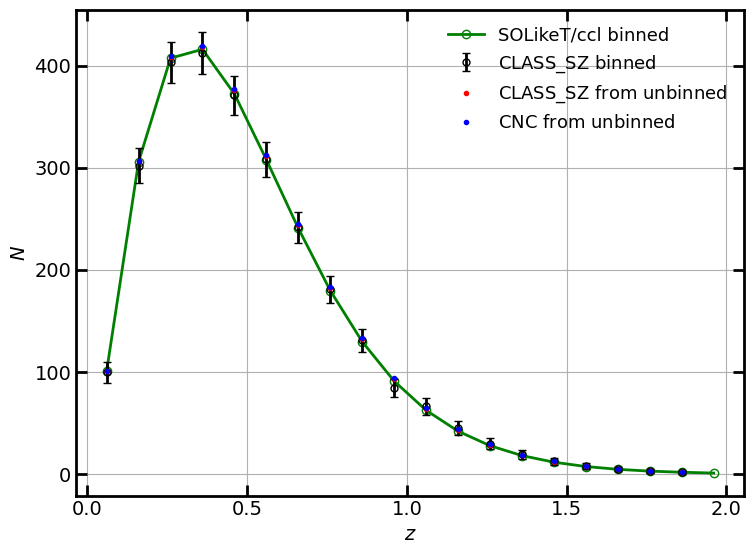

In [62]:
# color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

plt.figure(figsize=(8,6))
plt.plot(z_slt, Nz_slt, color='green', marker='o', alpha=1., label='SOLikeT/ccl binned',
        markerfacecolor=None,markeredgecolor='green',fillstyle='none',)
plt.errorbar(z_center,N_clusters_z_theory,yerr=np.sqrt(N_clusters_z_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,binned}$',capsize=3,c='k')
plt.errorbar(np.asarray(z_center),Nz_binned,#yerr=np.sqrt(Nz_binned),
             marker='o',markersize=3.,ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,from\,\,unbinned}$',capsize=5,c='red')


plt.errorbar(np.asarray(z_center),Nz_binned_cnc,#yerr=np.sqrt(Nz_binned),
             marker='o',markersize=3.,ls='none',
            label=r'$\mathrm{CNC\,\,from\,\,unbinned}$',capsize=5,c='blue')

plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,frameon=False)
plt.grid()
plt.tight_layout()
# plt.loglog()
plt.show()

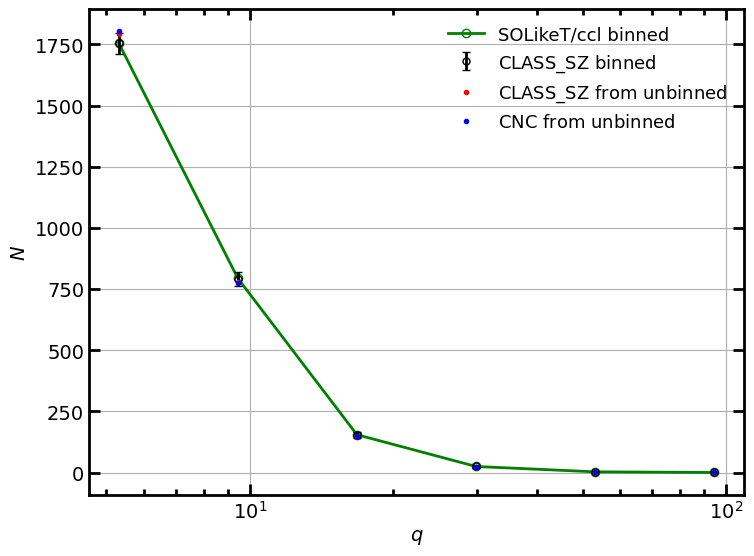

In [63]:
# color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

plt.figure(figsize=(8,6))
plt.plot(q_slt, Nq_slt, color='green', marker='o', alpha=1.,label='SOLikeT/ccl binned', #label='SOLikeT Nq'
         markerfacecolor=None,markeredgecolor='green',fillstyle='none',
        )
plt.errorbar(10**np.asarray(log10y_center),N_clusters_y_theory,yerr=np.sqrt(N_clusters_y_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,binned}$',
             capsize=3,c='k')
plt.errorbar(10**(np.asarray(log10y_center)),Nq_binned,#yerr=np.sqrt(Nq_binned),
             marker='o',markersize=3.,ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,from\,\,unbinned}$',
             capsize=5,c='red')

plt.errorbar(10**(np.asarray(log10y_center)),Nq_binned_cnc,#yerr=np.sqrt(Nq_binned),
             marker='o',markersize=3.,ls='none',
            label=r'$\mathrm{CNC\,\,from\,\,unbinned}$',
             capsize=5,c='blue')


plt.xlabel('$q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,frameon=False)
plt.grid()
plt.tight_layout()
plt.xscale('log')
plt.show()

In [37]:
1./1.25

0.8

In [41]:
z_slt

array([0.06, 0.16, 0.26, 0.36, 0.46, 0.56, 0.66, 0.76, 0.86, 0.96, 1.06,
       1.16, 1.26, 1.36, 1.46, 1.56, 1.66, 1.76, 1.86, 1.96])

In [44]:
z_edges

[0.010000000000000002,
 0.11,
 0.21000000000000002,
 0.31000000000000005,
 0.41000000000000003,
 0.51,
 0.61,
 0.71,
 0.81,
 0.91,
 1.01,
 1.11,
 1.21,
 1.31,
 1.4100000000000001,
 1.51,
 1.61,
 1.71,
 1.81,
 1.9100000000000001]

In [64]:
from scipy.stats import norm

# Amod in ACT cluster counts

In [36]:
%%time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import scipy
from classy_sz import Class

M = Class()

M.set({
'output': 'sz_cluster_counts,m500c_to_m200c,m200c_to_m500',

'mass function'  : 'T08M200c',
'concentration parameter' : 'B13',
    
    
    
'omega_b': 0.0224178568132,
'omega_cdm':  0.11933148326520002,
'H0': 67.66,
'ln10^{10}A_s': 2.9799585,
'tau_reio':  0.0561,
'n_s': 0.96,
    
    
'B':1.,
    
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'T_ncdm' : 0.71611,
    
'z_min': 0.,
'z_max': 2.02,
'redshift_epsrel': 1e-6,
'redshift_epsabs': 1e-100,    
    

    
'M_min': 1e13*0.6766,
'M_max': 1e16*0.6766,
'mass_epsrel':1e-6,
'mass_epsabs':1e-100,
# 'ndim_redshifts':200, 
'ndim_redshifts' :500,
# 'ndim_masses' : 200,
'n_m_dndlnM' : 500,
'n_z_dndlnM' : 500,

# 'm_pivot_ym_[Msun]': 3e14,  
    
'has_selection_function' : 1,
'experiment' : 1, # Planck: 0 / ACT or SO: 1
'y_m_relation' : 1, # ycenter : 1, # y500 : 0
'signal-to-noise_cut-off_for_survey_cluster_completeness' : 5.,

'sz_selection_function_thetas_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_thetas_120923_30bins.txt',
'sz_selection_function_skyfracs_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_skyfracs_120923_30bins.txt',
'sz_selection_function_ylims_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_ylims_120923_30bins.txt',    


'bin_z_min_cluster_counts' : 0.01,
'bin_z_max_cluster_counts' : 2.01,
'bin_dz_cluster_counts' : 0.1,

'bin_dlog10_snr' : 0.25,
'log10_snr_min' : 0.6,#np.log10(5.),
'log10_snr_max' : 2.,
# 'bin_dlog10_snr' : 0.25,
# 'log10_snr_min' : np.log10(5.),
# 'log10_snr_max' : 2.,



'dlny' : 0.05,
'lnymin' : -20., # planck  -11.5 so/act -11
'lnymax' : 10.,  # planck 10. so/act -5
'dlnM_cluster_count_completeness_grid' : 0.005,


'cluster_count_completeness_grid_z_cutoff_low' : 0.4,
'cluster_count_completeness_grid_z_cutoff_mid' : 1.,

'dz_cluster_count_completeness_grid_low_z' : 1e-3,
'dz_cluster_count_completeness_grid_mid_z' : 1e-2,
'dz_cluster_count_completeness_grid_high_z' : 1e-1,



'mass_epsrel_cluster_counts' : 1e-6,
'mass_epsabs_cluster_counts' : 1e-40,

'redshift_epsrel_cluster_counts' : 1e-6,
'redshift_epsabs_cluster_counts' : 1e-40,

    
'A_ym'  : 1.9e-05,
'B_ym'  : 0.08,
'C_ym' : 0.,
'sigmaM_ym' : 0.173,
# 'sigmaM_ym' :0.,
'm_pivot_ym_[Msun]' : 4.25e14,

'use_m500c_in_ym_relation' : 0,
'use_m200c_in_ym_relation' : 1,
'use_planck_binned_proba' : 0, #use diff of erfs
'use_skyaveraged_noise': 0, # this will speed-up everything

'szcc_dof': 3.,
'szcc_qtrunc': 2.,
    
'HMF_prescription_NCDM': 1,
'no_spline_in_tinker': 1,
    
'use_Amod': 1,
'Amod':-3.,
        })
        
M.compute_class_szfast()
# M.compute()


CPU times: user 24.7 s, sys: 1.05 s, total: 25.7 s
Wall time: 5.77 s


In [37]:
%%time
amod_ar = np.linspace(-3.,0.,5)
Nz_all = []
Nq_all = []
for amod in amod_ar:
    M.set({'Amod':amod})
    M.compute_class_szfast()
    dNdzdy_theoretical = M.dndzdy_theoretical()['dndzdy']
    z_center = M.dndzdy_theoretical()['z_center']
    z_edges = M.dndzdy_theoretical()['z_edges']
    log10y_center = M.dndzdy_theoretical()['log10y_center']
    log10y_edges = M.dndzdy_theoretical()['log10y_edges']

    N_z,N_y = np.shape(dNdzdy_theoretical)
    N_clusters_z_theory = []
    for iz in range(N_z):
        N_clusters_z_theory.append(np.sum(dNdzdy_theoretical[iz][0:]))
    N_clusters_y_theory = []

    for iy in range(N_y):
        N_clusters_y_theory.append(np.sum(np.asarray(dNdzdy_theoretical)[:,iy]))

    # print total number of clusters: 
    print(amod,np.sum(N_clusters_z_theory))
    Nz_all.append(N_clusters_z_theory)
    Nq_all.append(N_clusters_y_theory)

-3.0 657.5458309801561
-2.25 918.4683250226178
-1.5 1300.4038304252183
-0.75 1867.8248541869011
0.0 2729.104791728495
CPU times: user 2min 3s, sys: 5.28 s, total: 2min 8s
Wall time: 27.6 s


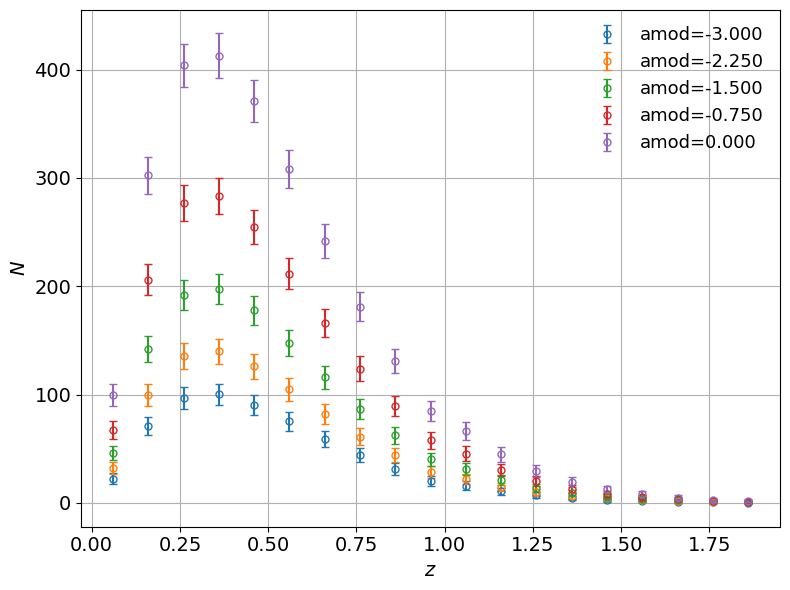

In [38]:

# from scipy.interpol

plt.figure(figsize=(8,6))

for ia,amod in enumerate(amod_ar):
    N_clusters_z_theory = Nz_all[ia]
    plt.errorbar(z_center,N_clusters_z_theory,yerr=np.sqrt(N_clusters_z_theory),
                marker='o',
                markersize=5.,
                fillstyle='none',
                ls='none',
                label=r'amod=%.3f'%amod,capsize=3)

plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,frameon=False)
plt.grid()
plt.tight_layout()
# plt.loglog()
plt.show()

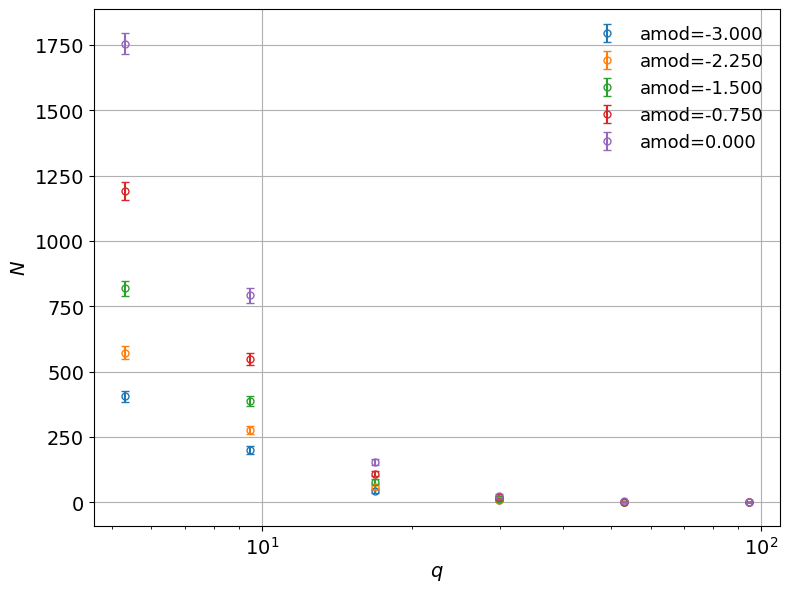

In [39]:
# color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

plt.figure(figsize=(8,6))

for ia,amod in enumerate(amod_ar):
    N_clusters_y_theory = Nq_all[ia]
    plt.errorbar(10**np.asarray(log10y_center),N_clusters_y_theory,yerr=np.sqrt(N_clusters_y_theory),
                marker='o',
                markersize=5.,
                fillstyle='none',
                ls='none',
                label=r'amod=%.3f'%amod,capsize=3)



plt.xlabel('$q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,frameon=False)
plt.grid()
plt.tight_layout()
plt.xscale('log')
plt.show()

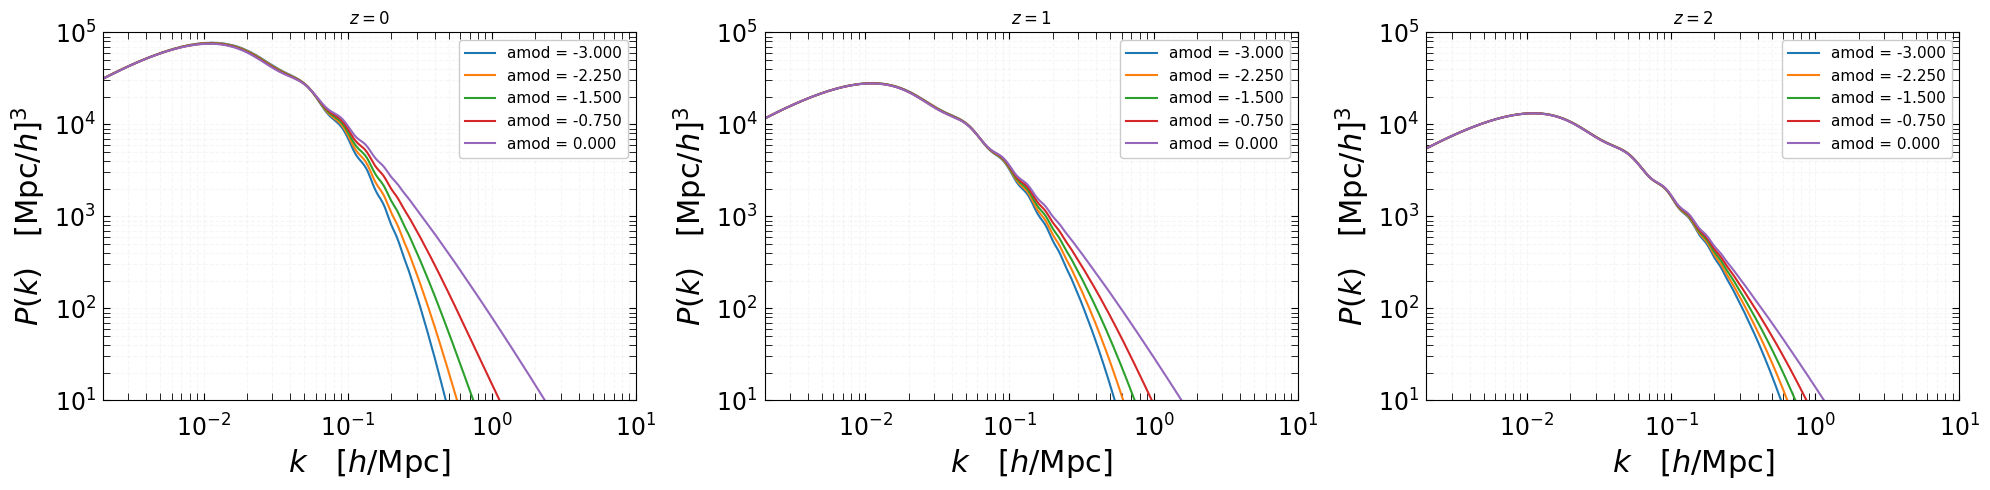

In [40]:
k1_a = np.geomspace(1e-3,10.,500)
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')
ax.set_ylabel(r'$P(k)\quad\mathrm{[Mpc}/h]^3$',size=title_size)
ax.set_xlabel(r'$k\quad[h\mathrm{/Mpc]}$',size=title_size)
for amod in amod_ar:
    M.set({'Amod':amod})
    M.set({'output':'mPk'})
    M.compute_class_szfast()
    z = 0.
    pk1_lin_fast = np.vectorize(M.pk_lin)(k1_a,z)
    ax.plot(k1_a,pk1_lin_fast,label=r'amod = %.3f'%amod,alpha=1.)
ax.loglog()

ax.set_ylim(1e1,1e5)
ax.set_xlim(2e-3,1e1)
ax.legend(loc=1,frameon=True,framealpha=1,fontsize=11)
ax.set_title(r'$z=0$')
    
ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')
ax.set_ylabel(r'$P(k)\quad\mathrm{[Mpc}/h]^3$',size=title_size)
ax.set_xlabel(r'$k\quad[h\mathrm{/Mpc]}$',size=title_size)
for amod in amod_ar:
    M.set({'Amod':amod})
    M.set({'output':'mPk'})
    M.compute_class_szfast()
    z = 1.
    pk1_lin_fast = np.vectorize(M.pk_lin)(k1_a,z)
    ax.plot(k1_a,pk1_lin_fast,label=r'amod = %.3f'%amod,alpha=1.)
ax.loglog()

ax.set_ylim(1e1,1e5)
ax.set_xlim(2e-3,1e1)
ax.legend(loc=1,frameon=True,framealpha=1,fontsize=11)
ax.set_title(r'$z=1$' )
             
ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')
ax.set_ylabel(r'$P(k)\quad\mathrm{[Mpc}/h]^3$',size=title_size)
ax.set_xlabel(r'$k\quad[h\mathrm{/Mpc]}$',size=title_size)
for amod in amod_ar:
    M.set({'Amod':amod})
    M.set({'output':'mPk'})
    M.compute_class_szfast()
    z = 2.
    pk1_lin_fast = np.vectorize(M.pk_lin)(k1_a,z)
    ax.plot(k1_a,pk1_lin_fast,label=r'amod = %.3f'%amod,alpha=1.)
ax.loglog()

ax.set_ylim(1e1,1e5)
ax.set_xlim(2e-3,1e1)
ax.legend(loc=1,frameon=True,framealpha=1,fontsize=11)
ax.set_title(r'$z=2$' )
fig.tight_layout()

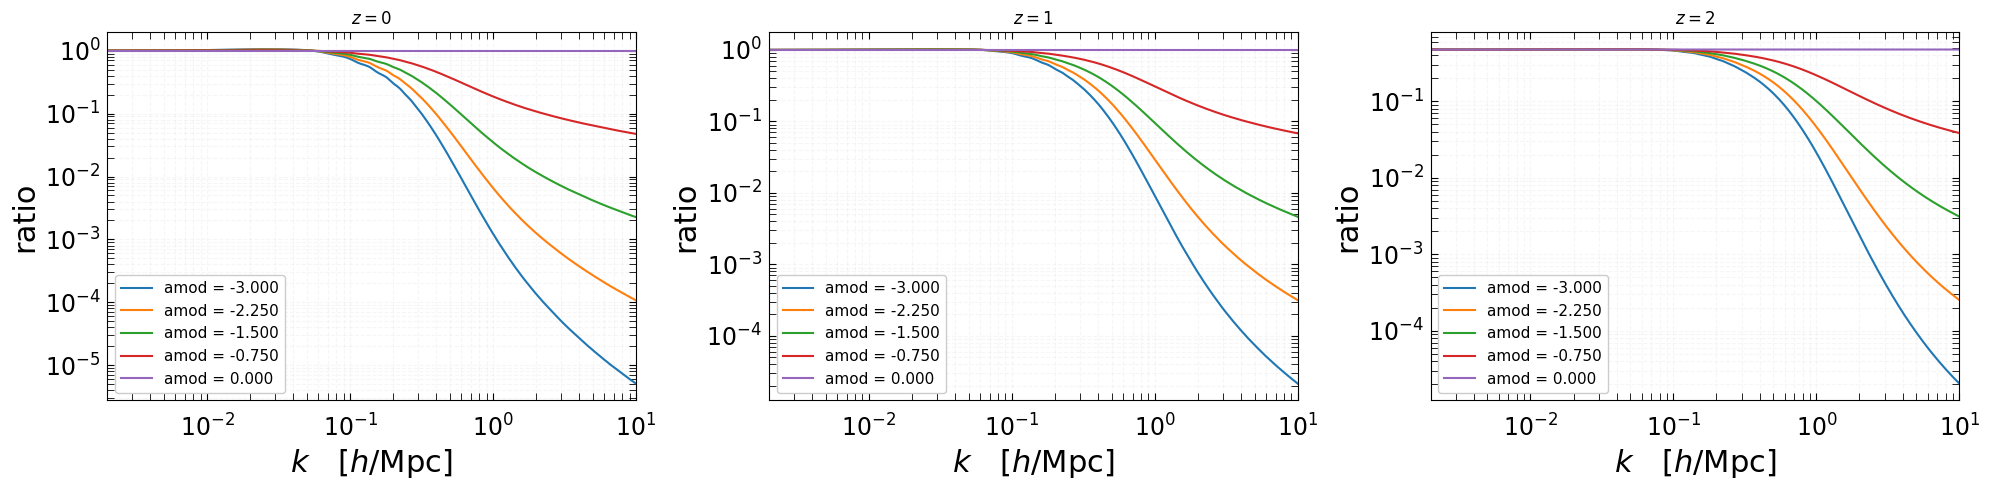

In [41]:
k1_a = np.geomspace(1e-3,10.,500)
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')
ax.set_ylabel(r'ratio',size=title_size)
ax.set_xlabel(r'$k\quad[h\mathrm{/Mpc]}$',size=title_size)

M.set({'Amod':0.})
M.set({'output':'mPk'})
M.compute_class_szfast()
z = 0.
pk1_lin_fast0 = np.vectorize(M.pk_lin)(k1_a,z)

for amod in amod_ar:
    M.set({'Amod':amod})
    M.set({'output':'mPk'})
    M.compute_class_szfast()
    z = 0.
    pk1_lin_fast = np.vectorize(M.pk_lin)(k1_a,z)
    ax.plot(k1_a,pk1_lin_fast/pk1_lin_fast0,label=r'amod = %.3f'%amod,alpha=1.)
ax.loglog()

# ax.set_ylim(1e1,1e5)
ax.set_xlim(2e-3,1e1)
ax.legend(loc=3,frameon=True,framealpha=1,fontsize=11)
ax.set_title(r'$z=0$')
    
ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')
ax.set_ylabel(r'ratio',size=title_size)
ax.set_xlabel(r'$k\quad[h\mathrm{/Mpc]}$',size=title_size)

M.set({'Amod':0.})
M.set({'output':'mPk'})
M.compute_class_szfast()
z = 1.
pk1_lin_fast0 = np.vectorize(M.pk_lin)(k1_a,z)
for amod in amod_ar:
    M.set({'Amod':amod})
    M.set({'output':'mPk'})
    M.compute_class_szfast()
    z = 1.
    pk1_lin_fast = np.vectorize(M.pk_lin)(k1_a,z)
    ax.plot(k1_a,pk1_lin_fast/pk1_lin_fast0,label=r'amod = %.3f'%amod,alpha=1.)
ax.loglog()

# ax.set_ylim(1e1,1e5)
ax.set_xlim(2e-3,1e1)
ax.legend(loc=3,frameon=True,framealpha=1,fontsize=11)
ax.set_title(r'$z=1$' )
             
ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')
ax.set_ylabel(r'ratio',size=title_size)
ax.set_xlabel(r'$k\quad[h\mathrm{/Mpc]}$',size=title_size)

for amod in amod_ar:
    M.set({'Amod':amod})
    M.set({'output':'mPk'})
    M.compute_class_szfast()
    z = 2.
    pk1_lin_fast = np.vectorize(M.pk_lin)(k1_a,z)
    ax.plot(k1_a,pk1_lin_fast/pk1_lin_fast0,label=r'amod = %.3f'%amod,alpha=1.)
ax.loglog()

# ax.set_ylim(1e1,1e5)
ax.set_xlim(2e-3,1e1)
ax.legend(loc=3,frameon=True,framealpha=1,fontsize=11)
ax.set_title(r'$z=2$' )

fig.tight_layout()

In [31]:
amod_ar = np.linspace(-3.,0.,5)
cl_sz_all = []
cl_kk_all = []
for amod in amod_ar:
    M.set({'Amod':amod,
           'ell_min': 2.,
           'ell_max':10000,
           'dlogell':0.1,
          'use_pkl_in_linbias_calc':1})
    M.set({'output':'tSZ_1h,tSZ_2h,lens_lens_hf'})
    M.compute_class_szfast()
    cl_sz_all.append(M.cl_sz())
    cl_kk_all.append(M.cl_kk())

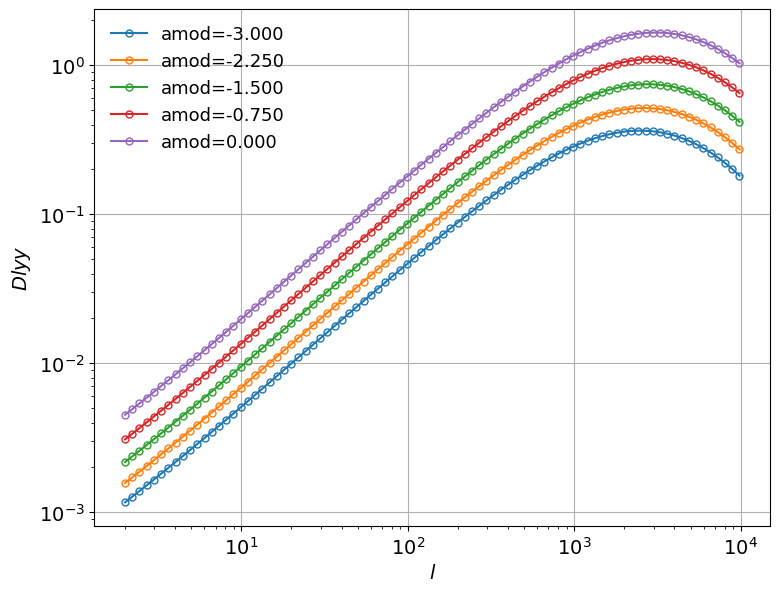

In [34]:
# color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

plt.figure(figsize=(8,6))

for ia,amod in enumerate(amod_ar):
    cl_sz = cl_sz_all[ia]
    l = np.asarray(cl_sz['ell'])
    cl_yy_1h = np.asarray(cl_sz['1h'])
    cl_yy_2h = np.asarray(cl_sz['2h'])
    plt.plot(l,cl_yy_1h+cl_yy_2h,
                marker='o',
                markersize=5.,
                fillstyle='none',
                ls='-',
                label=r'amod=%.3f'%amod)



plt.xlabel('$l$', fontsize=14)
plt.ylabel('$Dlyy$', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,frameon=False)
plt.grid()
plt.tight_layout()
plt.xscale('log')
plt.yscale('log')
plt.show()

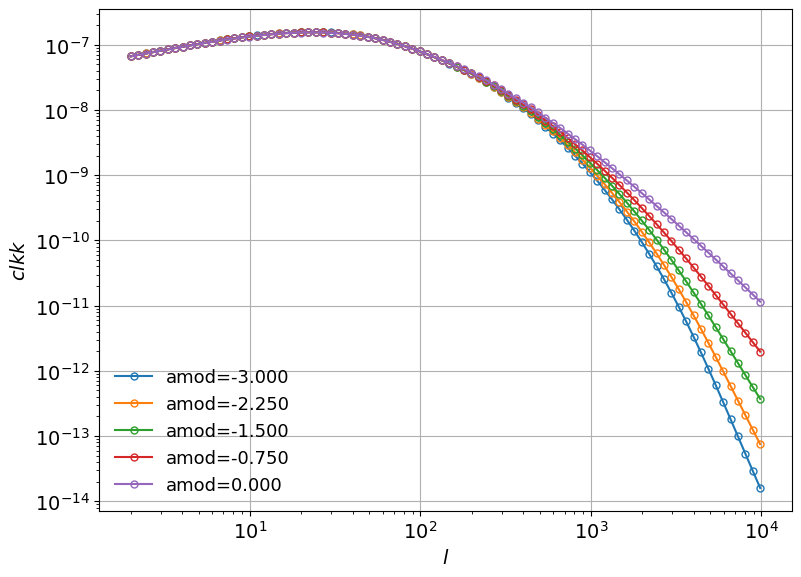

In [35]:
# color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

plt.figure(figsize=(8,6))

for ia,amod in enumerate(amod_ar):
    cl_kk = cl_kk_all[ia]
    l = np.asarray(cl_sz['ell'])
    cl_kk_hf = np.asarray(cl_kk['hf'])
    fac = l*(l+1.)/2./np.pi
    plt.plot(l,cl_kk_hf/fac,
                marker='o',
                markersize=5.,
                fillstyle='none',
                ls='-',
                label=r'amod=%.3f'%amod)



plt.xlabel('$l$', fontsize=14)
plt.ylabel('$clkk$', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,frameon=False)
plt.grid()
plt.tight_layout()
plt.xscale('log')
plt.yscale('log')
plt.show()

# SPT benchmarcking - sept 23

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
m,pm = np.loadtxt('/Users/boris/Desktop/SPT-CLJ2355-5055_pOfMass.txt',unpack=True)
m_cnc,pm_cnc = np.loadtxt('/Users/boris/Desktop/SPT-CLJ2355-5055_pOfMass_cnc.txt',unpack=True)

In [82]:
# m_cnc

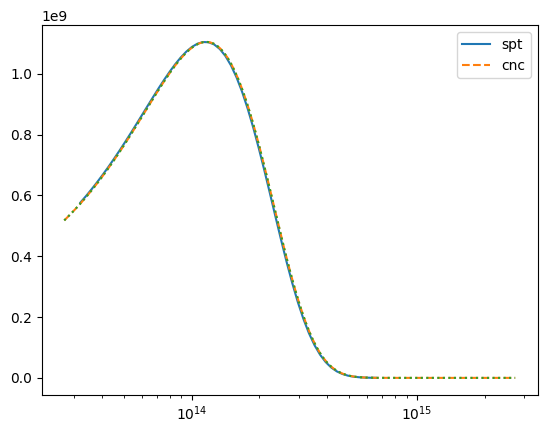

In [98]:
plt.plot(m,pm,label='spt')
plt.plot(m_cnc,pm_cnc,ls='--',label='cnc')
plt.plot(mArr,pOfMass_rcnc,ls=':')
plt.xscale('log')
plt.legend()
plt.show()

In [84]:
1./(mArr/m_cnc)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [85]:
data_spt = np.loadtxt('/Users/boris/Desktop/SPT-CLJ2355-5055_pOfMass_data.txt')
data_cnc = np.loadtxt('/Users/boris/Desktop/SPT-CLJ2355-5055_pOfMass_cnc_data.txt')
np.shape(data_spt),np.shape(data_cnc)

((8, 2), (8, 2))

In [86]:
data_spt

array([[ 0.0348346 ,  0.0253749 ],
       [ 0.0174504 ,  0.0212107 ],
       [-0.00266505,  0.021312  ],
       [ 0.0454546 ,  0.0183335 ],
       [ 0.00089144,  0.0173797 ],
       [ 0.010219  ,  0.0173505 ],
       [-0.0186086 ,  0.0164269 ],
       [ 0.00636172,  0.0161166 ]])

In [87]:
data_cnc

array([[ 0.0348346 ,  0.0253749 ],
       [ 0.0174504 ,  0.0212107 ],
       [-0.00266505,  0.021312  ],
       [ 0.0454546 ,  0.0183335 ],
       [ 0.00089144,  0.0173797 ],
       [ 0.010219  ,  0.0173505 ],
       [-0.0186086 ,  0.0164269 ],
       [ 0.00636172,  0.0161166 ]])

In [88]:
mArr,m200c,c200c,gamma_2d,kappa_2d,g_2d = np.loadtxt('/Users/boris/Desktop/SPT-CLJ2355-5055_cnc.txt',unpack=True)
mArr_spt,m200c_spt,c200c_spt,gamma_2d_spt,kappa_2d_spt,g_2d_spt = np.loadtxt('/Users/boris/Desktop/SPT-CLJ2355-5055_spt.txt',unpack=True)

In [89]:
mArr.size

128

In [90]:
mArr_spt.size

54

In [91]:
g2d = np.load('/Users/boris/Desktop/SPT-CLJ2355-5055_spt_g2d.npy',allow_pickle=True)

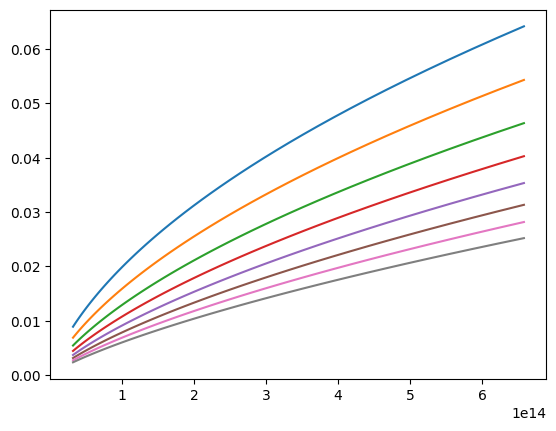

In [92]:
for i in range(8):
    plt.plot(mArr_spt,g2d[i])

In [93]:
g2d_cnc = np.load('/Users/boris/Desktop/SPT-CLJ2355-5055_pOfMass_cnc_g2d.npy',allow_pickle=True)

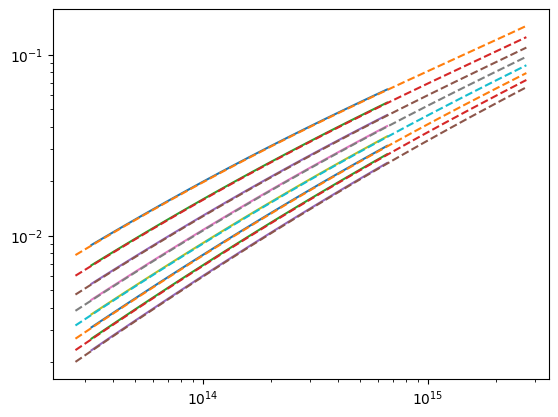

In [94]:
for i in range(8):
    plt.plot(mArr_spt,g2d[i])
    plt.plot(mArr,g2d_cnc[i],ls='--')
plt.xscale('log')
plt.yscale('log')

In [95]:
from scipy.stats import norm
np.shape(g2d_cnc)
shear = data_cnc[:,0]
shearerr = data_cnc[:,1]
np.shape(shear)
lkl_cnc = norm.pdf(g2d_cnc,shear[:,None],shearerr[:,None])
pOfMass_rcnc = np.prod(lkl_cnc, axis=0)

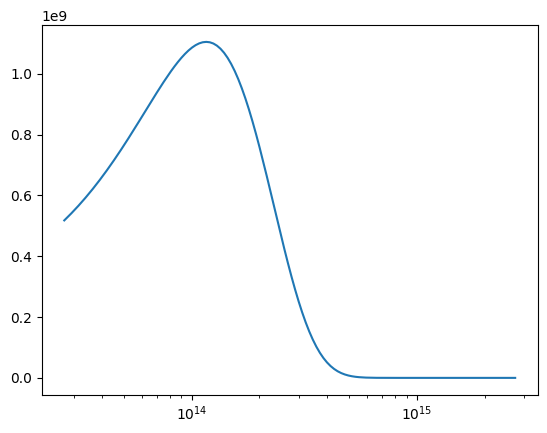

In [96]:
plt.plot(mArr,pOfMass_rcnc)
plt.xscale('log')

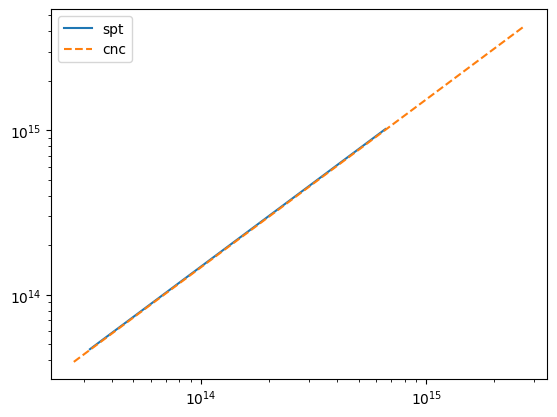

In [97]:

plt.plot(mArr_spt,m200c_spt,label='spt')
plt.plot(mArr,m200c,ls='--',label='cnc')

plt.loglog()
plt.legend()
plt.show()


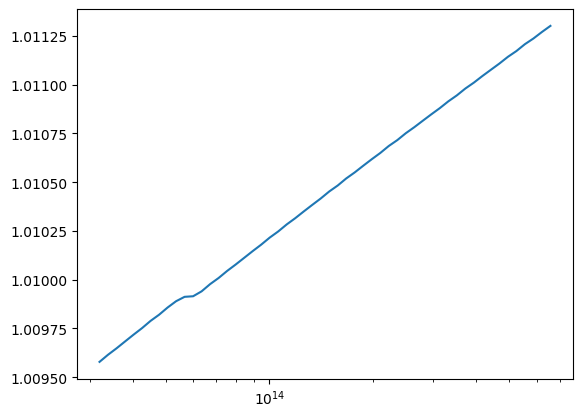

In [20]:
nmarr_cnc = np.interp(mArr_spt,mArr,m200c)
plt.plot(mArr_spt,m200c_spt/nmarr_cnc)
plt.xscale('log')
# plt.plot

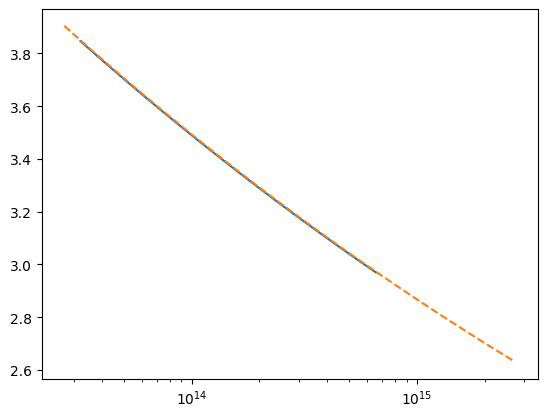

In [21]:
plt.plot(mArr_spt,c200c_spt)
plt.plot(mArr,c200c,ls='--')
plt.xscale('log')
plt.show()

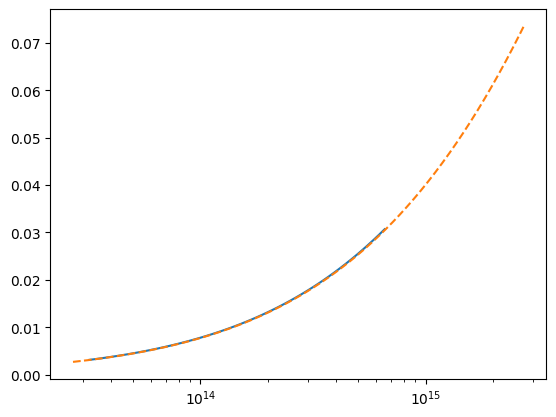

In [22]:
plt.plot(mArr_spt,gamma_2d_spt)
plt.plot(mArr,gamma_2d,ls='--')
plt.xscale('log')
plt.show()

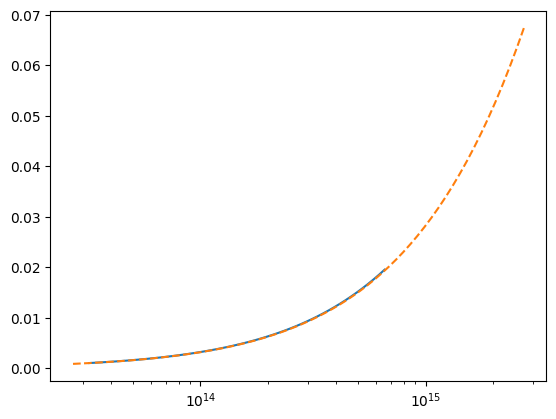

In [23]:
plt.plot(mArr_spt,kappa_2d_spt)
plt.plot(mArr,kappa_2d,ls='--')
plt.xscale('log')
plt.show()

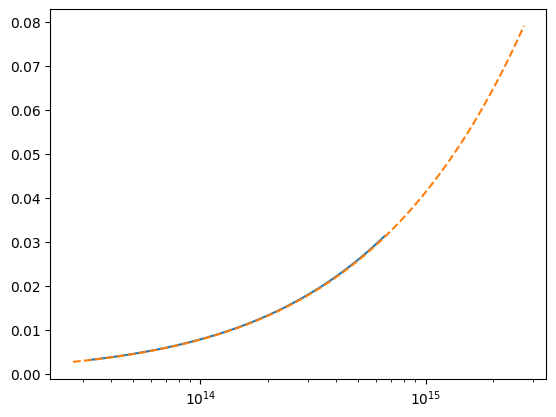

In [24]:
plt.plot(mArr_spt,g_2d_spt)
plt.plot(mArr,g_2d,ls='--')
plt.xscale('log')
plt.show()

In [46]:
np.savetxt('/Users/boris/Desktop/mg2d.txt',np.c_[mArr_spt,np.interp(mArr_spt,mArr,g_2d)])

In [2]:
mtets,g_2d = np.loadtxt('/Users/boris/Desktop/mg2d.txt',unpack=True)
g_2d

array([0.00308697, 0.00323682, 0.00339342, 0.00355721, 0.00372843,
       0.00390733, 0.00409442, 0.00428969, 0.00449387, 0.00470697,
       0.00492965, 0.00516224, 0.00540486, 0.00565826, 0.00592238,
       0.00619825, 0.00648576, 0.00678579, 0.00709863, 0.00742468,
       0.00776482, 0.00811887, 0.00848822, 0.0088726 , 0.0092732 ,
       0.00969032, 0.01012448, 0.01057679, 0.01104694, 0.01153676,
       0.01204574, 0.01257553, 0.01312636, 0.01369891, 0.01429458,
       0.01491283, 0.01555613, 0.01622355, 0.01691737, 0.01763769,
       0.01838538, 0.0191622 , 0.01996731, 0.02080399, 0.02167071,
       0.02257059, 0.02350352, 0.02447065, 0.02547414, 0.02651279,
       0.02759087, 0.02870608, 0.02986266, 0.03106015])

Notes for next time i work on this (18/09/23):


To run the spt code:
```
$ cosmosis /Users/boris/Work/CLASS-SZ/SO-SZ/SPT_SZ_cluster_likelihood/setup_nuLCDM_SPTcl_boris.ini
```

from inside the cosmosis repo: 

```
/Users/boris/Work/CLASS-SZ/SO-SZ/cosmosis-standard-library
```

There is currently a small mismatch on WL mass. Needs to be fixed. 


To run the cnc code:

change to branch:

spt-benchmarking-sept23

Then do:

```
$ cobaya-run /Users/boris/Work/CLASS-SZ/SO-SZ/cnc/mcmcs/cobaya/input_files/cobaya_cnc_spt_unbinned_WLYxmasscal_classy_sz_evaluate.yaml -f
```

That's all. 

# Testing the likelihood codes (ACT)

In [198]:
%%time
from classy_sz import Class

M = Class()

M.set({
'output': 'sz_cluster_counts,m500c_to_m200c,m200c_to_m500',

'mass function'  : 'T08M200c',
'concentration parameter' : 'B13',
    
    
    
'omega_b': 0.0224178568132,
'omega_cdm':  0.11933148326520002,
'H0': 67.66,
'ln10^{10}A_s': 2.9799585,
'tau_reio':  0.0561,
'n_s': 0.96,
    
    
'B':1.,
    
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'T_ncdm' : 0.71611,
    
'z_min': 0.,
'z_max': 2.5,
'redshift_epsrel': 1e-6,
'redshift_epsabs': 1e-100,    
    

    
'M_min': 1e13,
'M_max': 1e16,
'mass_epsrel':1e-6,
'mass_epsabs':1e-100,
'ndim_redshifts' :100,
'n_m_dndlnM' : 100,
'n_z_dndlnM' : 100,


    
'has_selection_function' : 1,
'experiment' : 1, 
'y_m_relation' : 1, 
'signal-to-noise_cut-off_for_survey_cluster_completeness' : 5.,

'sz_selection_function_thetas_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_thetas_120923_30bins.txt',
'sz_selection_function_skyfracs_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_skyfracs_120923_30bins.txt',
'sz_selection_function_ylims_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_ylims_120923_30bins.txt',    
'SZ_cat_file': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/SZ_cat_nemosimkit_130923.txt',

'bin_z_min_cluster_counts' : 0.0,
'bin_z_max_cluster_counts' : 2.0,
'bin_dz_cluster_counts' : 0.1,

'bin_dlog10_snr' : 0.25,
'log10_snr_min' : 0.6,
'log10_snr_max' : 2.,




'dlny' : 0.2,
'lnymin' : -13., 
'lnymax' : -6.,  
'dlnM_cluster_count_completeness_grid' : 0.1,


'cluster_count_completeness_grid_z_cutoff_low' : 0.4,
'cluster_count_completeness_grid_z_cutoff_mid' : 1.,

'dz_cluster_count_completeness_grid_low_z' : 1e-3,
'dz_cluster_count_completeness_grid_mid_z' : 1e-2,
'dz_cluster_count_completeness_grid_high_z' : 1e-1,



'mass_epsrel_cluster_counts' : 1e-6,
'mass_epsabs_cluster_counts' : 1e-40,

'redshift_epsrel_cluster_counts' : 1e-6,
'redshift_epsabs_cluster_counts' : 1e-40,

    
'A_ym'  : 1.9e-05,
'B_ym'  : 0.08,
'C_ym' : 0.,
'sigmaM_ym' : 0.173,
'm_pivot_ym_[Msun]' : 4.25e14,

'use_m500c_in_ym_relation' : 0,
'use_m200c_in_ym_relation' : 1,
'use_planck_binned_proba' : 0, 
'use_skyaveraged_noise': 0, 

'szcc_dof': 3.,
'szcc_qtrunc': 2.,
    
'HMF_prescription_NCDM': 1,
'no_spline_in_tinker': 1,
        })
        
M.compute_class_szfast()



CPU times: user 940 ms, sys: 149 ms, total: 1.09 s
Wall time: 415 ms


In [199]:
dNdzdy_theoretical = M.dndzdy_theoretical()['dndzdy']
z_center = M.dndzdy_theoretical()['z_center']
z_edges = M.dndzdy_theoretical()['z_edges']
log10y_center = M.dndzdy_theoretical()['log10y_center']
log10y_edges = M.dndzdy_theoretical()['log10y_edges']

N_z,N_y = np.shape(dNdzdy_theoretical)
N_clusters_z_theory = []
for iz in range(N_z):
    N_clusters_z_theory.append(np.sum(dNdzdy_theoretical[iz][0:]))
N_clusters_y_theory = []

for iy in range(N_y):
    N_clusters_y_theory.append(np.sum(np.asarray(dNdzdy_theoretical)[:,iy]))
    
# print total number of clusters: 
np.sum(N_clusters_z_theory)

2725.732739392689

In [200]:
# z_edges

In [208]:
%%time
M = Class()


szcounts_param ={
'output': 'sz_cluster_counts_fft,m500c_to_m200c,m200c_to_m500',
    
'mass function'  : 'T08M200c',
'concentration parameter' : 'B13',
    
'omega_b': 0.0224178568132,
'omega_cdm':  0.11933148326520002,
'H0': 67.66,
'ln10^{10}A_s': 2.9799585,
'tau_reio':  0.0561,
'n_s': 0.96,
    
    
    
'B':1.,
    
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'T_ncdm' : 0.71611,

    
'M_min': 1e13,
'M_max': 1e16,

'ndim_redshifts':100, 

'szcounts_fft_nz' : 100,
'n_m_dndlnM' : 100,
'n_z_dndlnM' : 100,


    
'has_selection_function' : 1,
'experiment' : 1, 
'y_m_relation' : 1,
'signal-to-noise_cut-off_for_survey_cluster_completeness' : 5.,

'sz_selection_function_thetas_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_thetas_120923_30bins.txt',
'sz_selection_function_skyfracs_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_skyfracs_120923_30bins.txt',
'sz_selection_function_ylims_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_ylims_120923_30bins.txt',    
'SZ_cat_file': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/SZ_cat_nemosimkit_130923.txt',


    
    
'A_ym'  : 1.9e-05,
'B_ym'  : 0.08,
'C_ym' : 0.,
'sigmaM_ym' : 0.173,
'm_pivot_ym_[Msun]' : 4.25e14,

'use_m500c_in_ym_relation' : 0,
'use_m200c_in_ym_relation' : 1,
'use_skyaveraged_noise': 0,
    
    

'N_samp_fftw' : 2048,

'szcounts_fft_nz' : 100,

'z_min' : 0.0,
'z_max' : 2.5,
    
'szcounts_fft_z_min' : 0.0,
'szcounts_fft_z_max' : 2.5,
    
    
    
'tol_dlnm_dlnq':0.01,
'ntab_dlnm_dlnq':80, 

'szcounts_qmax_fft_padded':200.,
    
'sigma_derivative' : 0,
'szcc_dof': 3.,
'szcc_qtrunc':2.,

    
'HMF_prescription_NCDM': 1,
'no_spline_in_tinker': 1,
        }
M.set(szcounts_param)
        
M.compute_class_szfast()
# M.compute()

CPU times: user 4.13 s, sys: 161 ms, total: 4.3 s
Wall time: 902 ms


In [209]:
M.sigma8()

0.7814144359696676

In [210]:
szcounts = M.szcounts_ntot_rates_loglike()
print(szcounts['ntot'],szcounts['loglike'])

2762.475004412449 14403.718819186022


In [211]:
szcounts = M.szcounts_ntot_rates_loglike()
print(szcounts['ntot'],szcounts['loglike'])

2762.475004412449 14403.718819186022


In [212]:
zmin = szcounts_param['szcounts_fft_z_min']
zmax = szcounts_param['szcounts_fft_z_max']
nz = szcounts_param['szcounts_fft_nz']
z_arr = np.linspace(zmin,zmax,nz)

q_threshold = 5.
q_max = 100.
nq = 5000
q_arr = np.geomspace(q_threshold, q_max,nq)
dq = (q_max-q_threshold)/(nq-1.)
dz = (zmax - zmin)/(nz-1.)
get_dndzdq = np.vectorize(M.get_szcounts_dndzdq_at_z_q)
Nz = []
for zp in z_arr:
    Nz.append(np.trapz(get_dndzdq(zp,q_arr)*q_arr,x=np.log(q_arr)))
Nz = np.asarray(Nz)
Nq = []
for qp in q_arr:
    Nq.append(np.trapz(get_dndzdq(z_arr,qp),x=z_arr))
Nq = np.asarray(Nq)
Ntot = np.trapz(Nz,x=z_arr)
# Ntot = np.sum(Nz)*dz
Ntot

z_edges_low = z_edges[:-1]
z_edges_high = z_edges[1:]
Nz_binned = []
for (zm,zp) in zip(z_edges_low,z_edges_high):
    z_arr_bin = np.linspace(zm,zp,50)
    Nz_in = []
    for zpbin in z_arr_bin:
        Nz_in.append(np.trapz(get_dndzdq(zpbin,q_arr)*q_arr,x=np.log(q_arr)))
    Nz_binned.append(np.trapz(Nz_in,x=z_arr_bin))
Nz_binned = np.asarray(Nz_binned)

q_edges_low = log10y_edges[:-1]
q_edges_low[0] = 0.6
q_edges_high = log10y_edges[1:]
Nq_binned = []
for (qm,qp) in zip(q_edges_low,q_edges_high):
    q_arr_bin = np.linspace(qm,qp,50)
    Nq_in = []
    for qpbin in q_arr_bin:
        if 10.**qpbin<q_threshold:
            Nq_in.append(0.)
        else:
            Nq_in.append(np.trapz(get_dndzdq(z_arr,10**qpbin),x=z_arr))
    Nq_binned.append(np.trapz(Nq_in,x=10**q_arr_bin))
Nq_binned = np.asarray(Nq_binned)

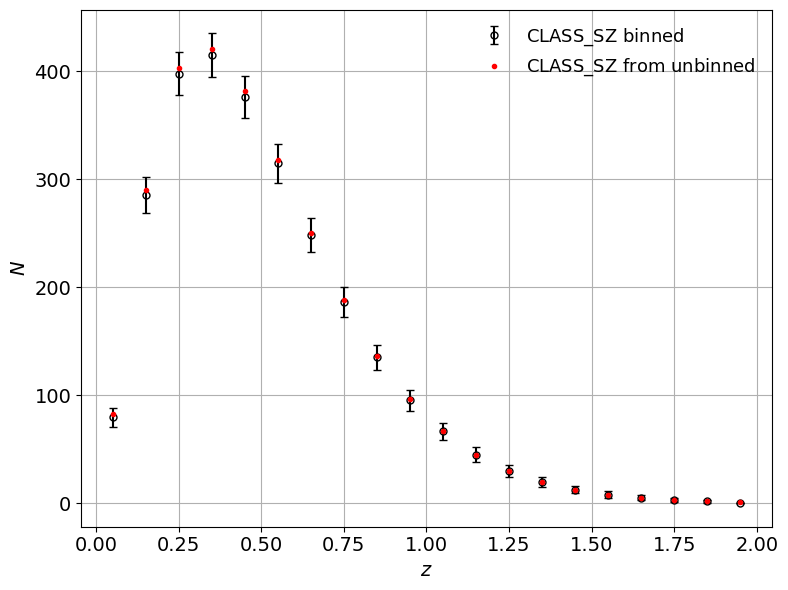

In [213]:
# color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

plt.figure(figsize=(8,6))
# plt.plot(z_slt, Nz_slt, color='green', marker='o', alpha=1., label='SOLikeT/ccl binned',
#         markerfacecolor=None,markeredgecolor='green',fillstyle='none',)
plt.errorbar(z_center,N_clusters_z_theory,yerr=np.sqrt(N_clusters_z_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,binned}$',capsize=3,c='k')
plt.errorbar(np.asarray(z_center),Nz_binned,#yerr=np.sqrt(Nz_binned),
             marker='o',markersize=3.,ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,from\,\,unbinned}$',capsize=5,c='red')


# plt.errorbar(np.asarray(z_center),Nz_binned_cnc,#yerr=np.sqrt(Nz_binned),
#              marker='o',markersize=3.,ls='none',
#             label=r'$\mathrm{CNC\,\,from\,\,unbinned}$',capsize=5,c='blue')

plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,frameon=False)
plt.grid()
plt.tight_layout()
# plt.loglog()
plt.show()

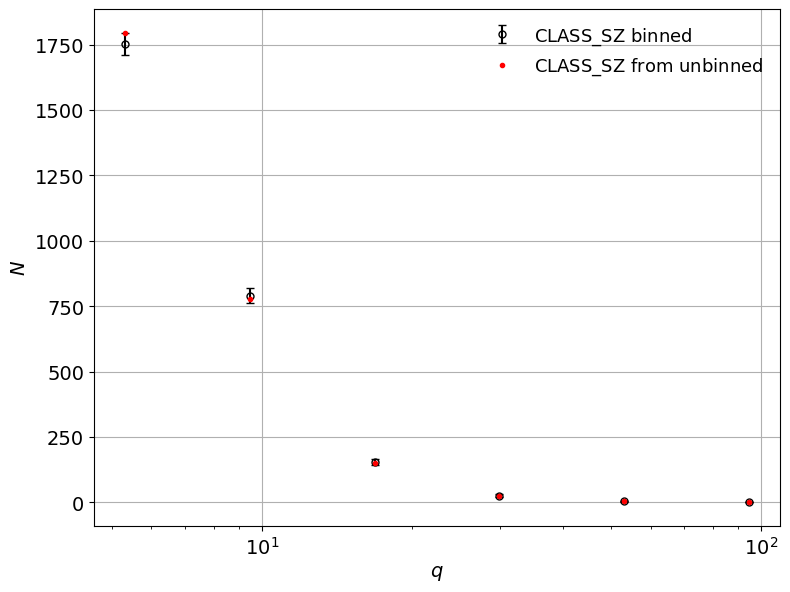

In [214]:
# color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

plt.figure(figsize=(8,6))
# plt.plot(q_slt, Nq_slt, color='green', marker='o', alpha=1.,label='SOLikeT/ccl binned', #label='SOLikeT Nq'
#          markerfacecolor=None,markeredgecolor='green',fillstyle='none',
#         )
plt.errorbar(10**np.asarray(log10y_center),N_clusters_y_theory,yerr=np.sqrt(N_clusters_y_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,binned}$',
             capsize=3,c='k')
plt.errorbar(10**(np.asarray(log10y_center)),Nq_binned,#yerr=np.sqrt(Nq_binned),
             marker='o',markersize=3.,ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,from\,\,unbinned}$',
             capsize=5,c='red')

# plt.errorbar(10**(np.asarray(log10y_center)),Nq_binned_cnc,#yerr=np.sqrt(Nq_binned),
#              marker='o',markersize=3.,ls='none',
#             label=r'$\mathrm{CNC\,\,from\,\,unbinned}$',
#              capsize=5,c='blue')


plt.xlabel('$q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,frameon=False)
plt.grid()
plt.tight_layout()
plt.xscale('log')
plt.show()

# Nemo recovered fluxes - oct 23 - run from here  (obsolete)

### Nemo extracted catalogue

In [1011]:
import os
from astropy.io import fits
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8')
import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
#path_to_nemo_selfn_dir = '/Users/boris/Work/nemosimkit/sim-kit_NemoCCL_A10tSZ_DR5Atmos_ACT-DR5-2Pass_scatter_realisation2/NemoCCL_A10tSZ_DR5Atmos_ACT-DR5-2Pass_scatter_realisation2/selFn'
# path_to_nemo_selfn_dir = '/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/MFMF_WebSkyHalos_A10tSZ_3freq_tiles_pass2/MFMF_WebSkyHalos_A10tSZ_3freq_tiles_pass2/selFn'
path_to_nemo_selfn_dir = '/Users/boris/NemoCCL_A10tSZ_DR5Atmos_ACT-DR5-largeRef-2Pass_1degTiles_realisation1/selFn/'
    
class self:
    datafile_Q = 'QFit.fits'
    data_directory = path_to_nemo_selfn_dir
    
    data = {
        'data_path': path_to_nemo_selfn_dir +'/../',
        'cat_file': "../NemoCCL_A10tSZ_DR5Atmos_ACT-DR5-largeRef-2Pass_1degTiles_realisation1_mass.fits",
        'Q_file': "QFit.fits",
        'tile_file': "tileAreas.txt",
        'rms_file': "RMSTab.fits"}
    selfunc = {
        'SNRcut': 5.,
        'method': 'SNRbased',
        'whichQ': 'fit',
        'resolution': 'downsample',
        'dwnsmpl_bins': 49,
        'save_dwsmpld': True,
        }
    datafile = data['cat_file']



In [1012]:
catf = fits.open(os.path.join(self.data_directory, self.datafile))
data = catf[1].data
zcat = data.field("redshift")
qcat = data.field("fixed_SNR") #NB note that there are another SNR in the catalogue
cat_tsz_signal = data.field("fixed_y_c")
cat_tsz_signal_err = data.field("fixed_err_y_c")
cat_tile_name = data.field("tileName")

In [1013]:
data.field("name")

chararray(['ACT-CL J0000.0-4010', 'ACT-CL J0000.0-4620',
           'ACT-CL J0000.0-5551', ..., 'ACT-CL J2359.7-5233',
           'ACT-CL J2359.8-0213', 'ACT-CL J2359.8-3034'], dtype='<U19')

In [1014]:
import pandas as pd
cat_df = pd.DataFrame()

In [1015]:
cat_df['z'] = zcat
cat_df['q_nemo'] = qcat
cat_df['fixed_yc_nemo'] = cat_tsz_signal
cat_df['fixed_err_yc_nemo'] = cat_tsz_signal_err
cat_df['RADeg'] = data.field("RADeg")
cat_df['decDeg'] = data.field("decDeg")
cat_df['qtest'] = cat_df['fixed_yc_nemo']/cat_df['fixed_err_yc_nemo']

In [1016]:
cat_df

,z,q_nemo,fixed_yc_nemo,fixed_err_yc_nemo,RADeg,decDeg,qtest
0,1.345,5.679513,0.316366,0.055703,0.001855,-40.168435,5.679513
1,0.695,3.096497,0.195048,0.062990,0.001687,-46.336727,3.096497
2,0.255,5.598946,0.569189,0.101660,0.019710,-55.860224,5.598946
3,1.615,2.702485,0.166280,0.061528,0.029834,-2.735265,2.702485
4,0.295,6.830799,0.416446,0.060966,0.026159,-38.423793,6.830799
...,...,...,...,...,...,...,...
15662,0.325,8.580643,0.491336,0.057261,359.942348,1.025623,8.580643
15663,0.105,8.910557,0.668481,0.075021,359.937824,-7.941782,8.910557
15664,0.865,4.346295,0.441385,0.101554,359.948103,-52.565237,4.346295
15665,0.585,3.549972,0.217830,0.061361,359.966707,-2.226896,3.549972


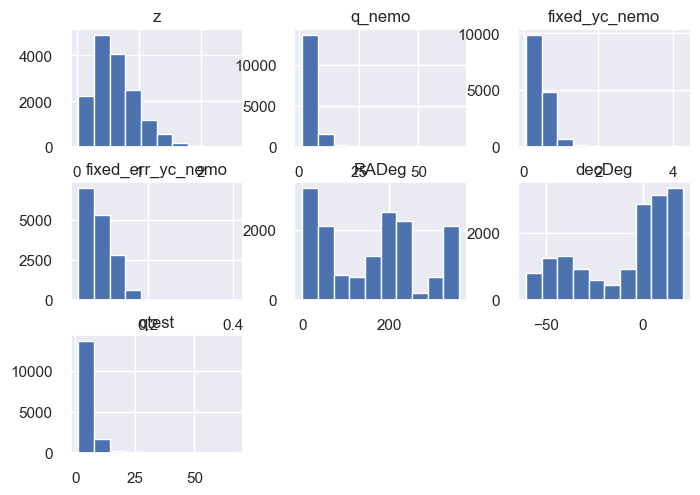

In [1017]:
import seaborn as sns
# Apply the default theme
sns.set_theme()
_ = cat_df.hist()

### Forced photometry catalogue

In [1018]:
catf_forced = fits.open(os.path.join(self.data_directory, '../NemoCCL_A10tSZ_DR5Atmos_ACT-DR5-largeRef-2Pass_1degTiles_realisation1_truthCatalog_forced.fits'))
data_forced = catf_forced[1].data
zcat_forced = data_forced.field("redshift")
qcat_forced = data_forced.field('true_fixed_SNR')
yc_forced = data_forced.field('true_fixed_y_c')
eyc_forced = data_forced.field('true_fixed_err_y_c')


## get Q:
# thisQ=Q.getQ(signals.calcTheta500Arcmin(row['redshift'], row['true_M500c']*1e14,
#                                         selFn.mockSurvey.cosmoModel), tileName = row['tileName'])
# row['true_Q']=thisQ
# row['rec_true_fixed_y_c']=row['true_y_c']*thisQ
true_Q = data_forced.field('true_Q')

In [1019]:
# catf_forced[1].header

In [1020]:
eyc_forced

array([1.38583928e-05, 1.24226053e-05, 1.08944896e-05, ...,
       5.91343951e-06, 1.41882774e-05, 1.22667179e-05])

In [1021]:
cat_df_forced = pd.DataFrame()
cat_df_forced['z'] = zcat_forced
cat_df_forced['q_forced'] = qcat_forced
cat_df_forced['true_fixed_yc_forced'] = y_forced/1e-4
cat_df_forced['true_fixed_err_yc_forced'] = eyc_forced/1e-4
cat_df_forced['Q'] = true_Q

In [1022]:
data_forced.field("name")

chararray(['MOCK-CL J2202.1-3659', 'MOCK-CL J2107.5-5254',
           'MOCK-CL J0011.9+1508', ..., 'MOCK-CL J0210.8-0112',
           'MOCK-CL J0457.4+0252', 'MOCK-CL J2149.8+1535'], dtype='<U20')

In [1023]:
cat_df_forced['Q']

0         0.412368
1         0.401866
2         0.412249
3         0.339808
4         0.392939
            ...   
120086    0.101372
120087    0.095524
120088    0.090548
120089    0.088828
120090    0.084657
Name: Q, Length: 120091, dtype: float64

### Truth catalogue (from sim)

In [1201]:
catf_truth = fits.open(os.path.join(self.data_directory, '../NemoCCL_A10tSZ_DR5Atmos_ACT-DR5-largeRef-2Pass_1degTiles_realisation1_truthCatalog.fits'))
data_truth = catf_truth[1].data
zcat_truth = data_truth.field("redshift")
yc_truth = data_truth.field("true_y_c")


In [1202]:
catf_truth[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   88 / length of dimension 1                          
NAXIS2  =               120091 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    9 / number of table fields                         
TTYPE1  = 'name    '                                                            
TFORM1  = '20A     '                                                            
TTYPE2  = 'RADeg   '                                                            
TFORM2  = 'D       '                                                            
TTYPE3  = 'decDeg  '        

In [1205]:
cat_df_truth = pd.DataFrame()
cat_df_truth['z'] = zcat_truth
cat_df_truth['name'] = data_truth.field("name")
cat_df_truth['RADeg'] = data_truth.field("RADeg")
cat_df_truth['decDeg'] = data_truth.field("decDeg")
cat_df_truth['m200c'] = data_truth.field("true_M200c")
cat_df_truth['true_yc']=yc_truth

In [1206]:
cat_df_truth

,z,name,RADeg,decDeg,m200c,true_yc
0,0.015,MOCK-CL J2202.1-3659,330.541667,-36.991667,2.104147,0.189859
1,0.015,MOCK-CL J2107.5-5254,316.883333,-52.908333,1.753061,0.155887
2,0.015,MOCK-CL J0011.9+1508,2.991667,15.141667,1.587564,0.140055
3,0.015,MOCK-CL J0145.7-3539,26.441667,-35.658333,2.211303,0.200322
4,0.015,MOCK-CL J1959.5-3148,299.875000,-31.808333,2.742476,0.252757
...,...,...,...,...,...,...
120086,2.445,MOCK-CL J0019.3+1227,4.850000,12.458333,2.506590,3.025322
120087,2.455,MOCK-CL J2307.6-3953,346.925000,-39.891667,1.846125,2.192342
120088,2.545,MOCK-CL J0210.8-0112,32.700000,-1.208333,1.973243,2.535154
120089,2.545,MOCK-CL J0457.4+0252,74.350000,2.883333,1.883793,2.411266


In [1028]:
cat_df_forced

,z,q_forced,true_fixed_yc_forced,true_fixed_err_yc_forced,Q
0,0.015,1.531015,0.212797,0.138584,0.412368
1,0.015,-0.487904,-0.069340,0.124226,0.401866
2,0.015,0.875789,0.095108,0.108945,0.412249
3,0.015,0.866569,0.070428,0.079804,0.339808
4,0.015,-0.245648,-0.037402,0.149309,0.392939
...,...,...,...,...,...
120086,2.445,1.491057,0.183558,0.120819,0.101372
120087,2.455,4.044242,0.277494,0.067640,0.095524
120088,2.545,2.982043,0.180330,0.059134,0.090548
120089,2.545,1.461079,0.209477,0.141883,0.088828


## join truth and forced dataframe

In [1029]:
cat_df_truth_forced = cat_df_truth.copy()

In [1030]:
for c2 in cat_df_forced.columns:
    if c2 not in cat_df_truth_forced.columns:
        cat_df_truth_forced = cat_df_truth_forced.join(cat_df_forced[c2])

In [1031]:
cat_df_truth_forced['true_fixed_yc_truth'] = cat_df_truth_forced.true_yc*cat_df_truth_forced.Q

In [1032]:
cat_df_truth_forced

,z,name,RADeg,decDeg,true_yc,q_forced,true_fixed_yc_forced,true_fixed_err_yc_forced,Q,true_fixed_yc_truth
0,0.015,MOCK-CL J2202.1-3659,330.541667,-36.991667,0.189859,1.531015,0.212797,0.138584,0.412368,0.078292
1,0.015,MOCK-CL J2107.5-5254,316.883333,-52.908333,0.155887,-0.487904,-0.069340,0.124226,0.401866,0.062646
2,0.015,MOCK-CL J0011.9+1508,2.991667,15.141667,0.140055,0.875789,0.095108,0.108945,0.412249,0.057738
3,0.015,MOCK-CL J0145.7-3539,26.441667,-35.658333,0.200322,0.866569,0.070428,0.079804,0.339808,0.068071
4,0.015,MOCK-CL J1959.5-3148,299.875000,-31.808333,0.252757,-0.245648,-0.037402,0.149309,0.392939,0.099318
...,...,...,...,...,...,...,...,...,...,...
120086,2.445,MOCK-CL J0019.3+1227,4.850000,12.458333,3.025322,1.491057,0.183558,0.120819,0.101372,0.306682
120087,2.455,MOCK-CL J2307.6-3953,346.925000,-39.891667,2.192342,4.044242,0.277494,0.067640,0.095524,0.209421
120088,2.545,MOCK-CL J0210.8-0112,32.700000,-1.208333,2.535154,2.982043,0.180330,0.059134,0.090548,0.229553
120089,2.545,MOCK-CL J0457.4+0252,74.350000,2.883333,2.411266,1.461079,0.209477,0.141883,0.088828,0.214187


## cross-match redshift, ra and dec

In [1033]:
import numpy as np
match_cat_xc_all = pd.DataFrame()
match_cat_xc = pd.DataFrame()

confusions = []
notfound = []
for p in cat_df.index[:]:
    # get current z:
    zc = cat_df.z[p]
    # get current RA: 
    rac = cat_df.RADeg[p]
    # get current Dec: 
    dec = cat_df.decDeg[p]
    
    # filter truth_cat at that z
    match_cat_xc = cat_df_truth_forced[cat_df_truth_forced.z == zc]

    match_cat_xc = match_cat_xc[np.abs(match_cat_xc.RADeg - rac)<=0.05]

    match_cat_xc = match_cat_xc[np.abs(match_cat_xc.decDeg - dec)<=0.05]
    
    if len(match_cat_xc)>1:
        confusions.append('confusion')
        continue
    if len(match_cat_xc)<1:
        notfound.append('notfound')
        continue
    
    match_cat_xc["q_nemo"] = cat_df.q_nemo[p]
    match_cat_xc["fixed_err_yc_nemo"] = cat_df['fixed_err_yc_nemo'][p]
    match_cat_xc["fixed_yc_nemo"] = cat_df['fixed_yc_nemo'][p]
    
    match_cat_xc["true_fixed_yc_forced"] = cat_df_truth_forced['true_fixed_yc_forced'][match_cat_xc.index[0]] # index of single cross-match cluster
    match_cat_xc["q_forced"] = cat_df_truth_forced["q_forced"][match_cat_xc.index[0]] # index of single cross-match cluster
    match_cat_xc["Q"] = cat_df_truth_forced["Q"][match_cat_xc.index[0]] # index of single cross-match cluster
    match_cat_xc["true_fixed_err_yc_forced"] = cat_df_truth_forced['true_fixed_err_yc_forced'][match_cat_xc.index[0]]
    
    
    match_cat_xc_all = pd.concat([match_cat_xc_all,match_cat_xc],ignore_index=True)

In [1034]:
# match_cat_xc_all['q_true'] = match_cat_xc_all.true_fixed_yc_truth/match_cat_xc_all.true_fixed_err_yc_forced 
match_cat_xc_all['q_true'] = match_cat_xc_all.true_fixed_yc_truth/match_cat_xc_all.fixed_err_yc_nemo 
match_cat_xc_all['q_nemo_over_q_true'] = match_cat_xc_all['q_nemo']/match_cat_xc_all['q_true']
match_cat_xc_all['q_nemo_over_q_forced'] = match_cat_xc_all['q_nemo']/match_cat_xc_all['q_forced']
match_cat_xc_all['y_nemo_over_y_forced'] = match_cat_xc_all['fixed_yc_nemo']/match_cat_xc_all['true_fixed_yc_forced']

In [1035]:
len(match_cat_xc_all),len(confusions)

(15648, 15)

In [1036]:
match_cat_xc_all.head()

,z,name,RADeg,decDeg,true_yc,q_forced,true_fixed_yc_forced,true_fixed_err_yc_forced,Q,true_fixed_yc_truth,q_nemo,fixed_err_yc_nemo,fixed_yc_nemo,q_true,q_nemo_over_q_true,q_nemo_over_q_forced,y_nemo_over_y_forced
0,1.345,MOCK-CL J0000.0-4009,0.000000,-40.166667,1.588894,5.606506,0.312357,0.055074,0.234447,0.372512,5.679513,0.055703,0.316366,6.687462,0.849278,1.013022,1.012834
1,0.695,MOCK-CL J0000.0-4619,0.008333,-46.333333,0.623297,2.869118,0.180673,0.062277,0.362055,0.225668,3.096497,0.062990,0.195048,3.582598,0.864316,1.079251,1.079566
2,0.255,MOCK-CL J0000.0-5551,0.008333,-55.858333,0.677031,5.272097,0.535910,0.100798,0.869525,0.588695,5.598946,0.101660,0.569189,5.790822,0.966865,1.061996,1.062097
3,1.615,MOCK-CL J0000.1-0243,0.025000,-2.733333,1.169365,2.608881,0.160410,0.060467,0.138020,0.161395,2.702485,0.061528,0.166280,2.623103,1.030263,1.035879,1.036593
4,0.295,MOCK-CL J0000.1-3824,0.025000,-38.416667,0.439425,6.625233,0.404107,0.060595,0.763832,0.335647,6.830799,0.060966,0.416446,5.505476,1.240728,1.031028,1.030535


### scatter plot -- Nemo vs Forced

In [1037]:
len(match_cat_xc_all['q_forced'][(match_cat_xc_all.q_forced>1) & (match_cat_xc_all.q_forced<18)])

15432

(1.0, 18.0)

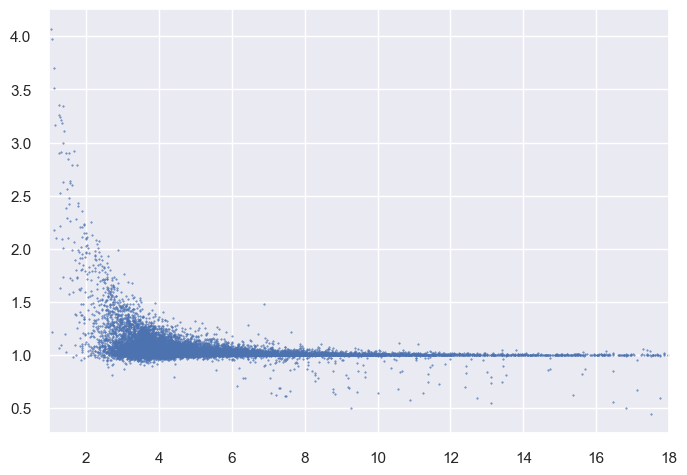

In [1038]:
plt.scatter(match_cat_xc_all['q_forced'][(match_cat_xc_all.q_forced>1) & (match_cat_xc_all.q_forced<18)],
            match_cat_xc_all['y_nemo_over_y_forced'][(match_cat_xc_all.q_forced>1) & (match_cat_xc_all.q_forced<18)],
            s=0.2)
# plt.ylim(0.,2)
plt.xlim(1,18)

### bin the data -- Nemo vs Forced

In [1039]:
q_forced_bin_edges = np.linspace(4,20,41)
q_forced_bin_intervals = pd.IntervalIndex.from_breaks(q_forced_bin_edges)
match_cat_xc_all['q_forced_bin'] = pd.cut(match_cat_xc_all['q_forced'][(match_cat_xc_all.q_forced>4) & (match_cat_xc_all.q_forced<20)], 
                                          q_forced_bin_edges,labels=False)
match_cat_xc_all['q_forced_bin'] = match_cat_xc_all['q_forced_bin'].fillna(-1).astype(int)

In [1040]:
match_cat_xc_all.head()

,z,name,RADeg,decDeg,true_yc,q_forced,true_fixed_yc_forced,true_fixed_err_yc_forced,Q,true_fixed_yc_truth,q_nemo,fixed_err_yc_nemo,fixed_yc_nemo,q_true,q_nemo_over_q_true,q_nemo_over_q_forced,y_nemo_over_y_forced,q_forced_bin
0,1.345,MOCK-CL J0000.0-4009,0.000000,-40.166667,1.588894,5.606506,0.312357,0.055074,0.234447,0.372512,5.679513,0.055703,0.316366,6.687462,0.849278,1.013022,1.012834,4
1,0.695,MOCK-CL J0000.0-4619,0.008333,-46.333333,0.623297,2.869118,0.180673,0.062277,0.362055,0.225668,3.096497,0.062990,0.195048,3.582598,0.864316,1.079251,1.079566,-1
2,0.255,MOCK-CL J0000.0-5551,0.008333,-55.858333,0.677031,5.272097,0.535910,0.100798,0.869525,0.588695,5.598946,0.101660,0.569189,5.790822,0.966865,1.061996,1.062097,3
3,1.615,MOCK-CL J0000.1-0243,0.025000,-2.733333,1.169365,2.608881,0.160410,0.060467,0.138020,0.161395,2.702485,0.061528,0.166280,2.623103,1.030263,1.035879,1.036593,-1
4,0.295,MOCK-CL J0000.1-3824,0.025000,-38.416667,0.439425,6.625233,0.404107,0.060595,0.763832,0.335647,6.830799,0.060966,0.416446,5.505476,1.240728,1.031028,1.030535,6


In [1041]:
# Group the DataFrame by the 'x_bin' column
groups = match_cat_xc_all.groupby('q_forced_bin')
groups['y_nemo_over_y_forced'].count().sum()

15648

In [1042]:
mean_y_nemo_over_y_forced_in_each_bin = groups['y_nemo_over_y_forced'].median()
std_y_nemo_over_y_forced_in_each_bin = groups['y_nemo_over_y_forced'].std()/np.sqrt(groups['y_nemo_over_y_forced'].count())


In [1043]:
mean_y_nemo_over_y_forced_in_each_bin

q_forced_bin
-1     1.061834
 0     1.031589
 1     1.022006
 2     1.018533
 3     1.018608
 4     1.012858
 5     1.013299
 6     1.010454
 7     1.008490
 8     1.007391
 9     1.006191
 10    1.006068
 11    1.007828
 12    1.003970
 13    1.004763
 14    1.004104
 15    1.004224
 16    1.003691
 17    1.004146
 18    1.002915
 19    1.002841
 20    1.004643
 21    1.002432
 22    1.002757
 23    1.001128
 24    1.002252
 25    1.002312
 26    1.000570
 27    1.002364
 28    1.002675
 29    1.002528
 30    1.002093
 31    1.000452
 32    1.001745
 33    1.001695
 34    1.001448
 35    1.000244
 36    1.001430
 37    1.001283
 38    1.001413
 39    1.000991
Name: y_nemo_over_y_forced, dtype: float64

In [1044]:
# mean_q_nemo_over_q_true_in_each_bin.iloc[1:]

In [1045]:
mean_y_nemo_over_y_forced_in_each_bin.index

Int64Index([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
            16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
            33, 34, 35, 36, 37, 38, 39],
           dtype='int64', name='q_forced_bin')

In [1046]:
q_forced_bin_intervals

IntervalIndex([(4.0, 4.4], (4.4, 4.8], (4.8, 5.2], (5.2, 5.6], (5.6, 6.0] ... (18.0, 18.4], (18.4, 18.8], (18.8, 19.200000000000003], (19.200000000000003, 19.6], (19.6, 20.0]], dtype='interval[float64, right]')

In [1047]:
bin_centers = [q_forced_bin_intervals[i-1].mid for i in range(1,len(mean_y_nemo_over_y_forced_in_each_bin.index))]
bin_low = [q_forced_bin_intervals[i-1].left for i in range(1,len(mean_y_nemo_over_y_forced_in_each_bin.index))]
# bin_centers?

In [1048]:
bin_centers[:5],bin_low[:5]

([4.2, 4.6, 5.0, 5.4, 5.8], [4.0, 4.4, 4.8, 5.2, 5.6])

(4.0, 20.0)

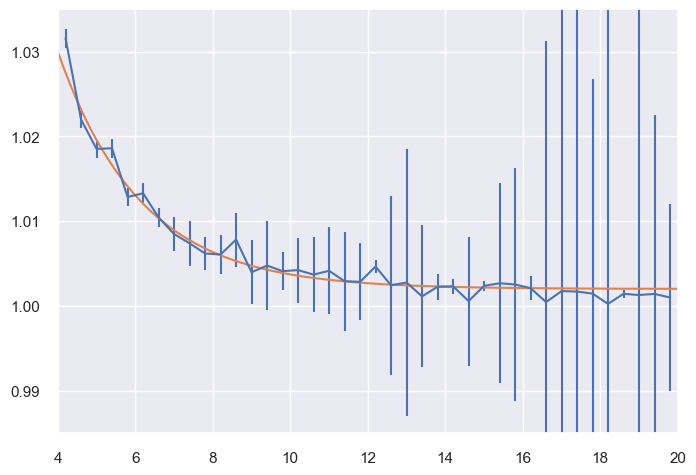

In [1049]:
plt.errorbar(bin_centers,mean_y_nemo_over_y_forced_in_each_bin.iloc[1:].values,yerr = std_y_nemo_over_y_forced_in_each_bin.iloc[1:].values)
# plt.errorbar(bin_low,mean_y_nemo_over_y_forced_in_each_bin.iloc[1:].values,yerr = std_y_nemo_over_y_forced_in_each_bin.iloc[1:].values)

true_SNR = np.linspace(4,20,100)
opt_bias_efold = 2.15
opt_bias_ped = 1.002
opt_bias_norm = 0.18
corr_factor = opt_bias_norm * np.exp (-true_SNR / opt_bias_efold) + opt_bias_ped
# def f(x,a):
#     return np.sqrt(x**2+a)
# xdata = true_SNR
# ydata = corr_factor*true_SNR
# import scipy
# r = scipy.optimize.curve_fit(f,xdata,ydata,bounds=(0,np.inf))
# print(r[0])
plt.plot(true_SNR,corr_factor,label='exp')
# plt.plot(true_SNR,f(xdata,r[0])/true_SNR,label='sqrt')
plt.ylim(0.985,1.035)
plt.xlim(4,20)

#### manual calculation of standard deviation in bin i

In [1050]:
binid = 10
# expected:
mean_y_nemo_over_y_forced_in_each_bin.iloc[1:].values[binid],std_y_nemo_over_y_forced_in_each_bin.iloc[1:].values[binid]

(1.0060683861431228, 0.0023531937208421537)

In [1051]:
mydat = match_cat_xc_all[match_cat_xc_all.q_forced_bin==binid]['y_nemo_over_y_forced']
mydat.describe()

count    232.000000
mean       1.004790
std        0.035843
min        0.758266
25%        1.001470
50%        1.006068
75%        1.014772
max        1.072074
Name: y_nemo_over_y_forced, dtype: float64

In [1052]:
mydat.kurtosis()

23.374662854696485

In [1053]:
import scipy.stats as scs
scs.kurtosis(mydat)
scs.skew(mydat)
scs.kurtosistest(mydat)
scs.skewtest(mydat)

SkewtestResult(statistic=-12.645808737984066, pvalue=1.1800401307094946e-36)

In [1054]:
x = mydat.values

In [1055]:
mu = x.sum()/len(x)
print(mu)

1.0047900281451634


In [1056]:
std = np.sqrt(((x-mu)**2).sum()/len(x))
print(std)

0.03576544811524563


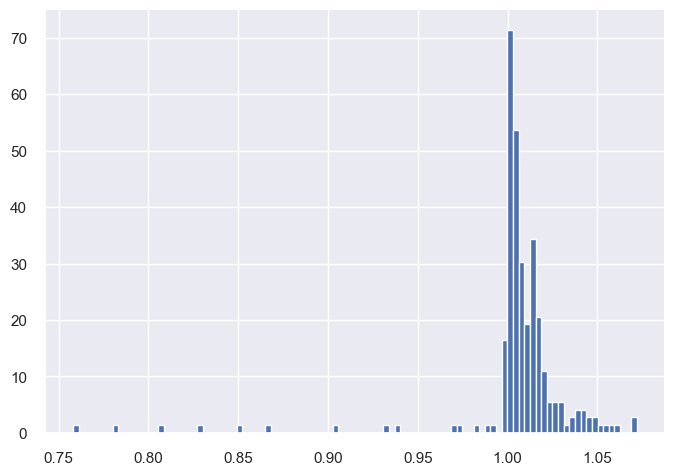

In [1057]:
_= plt.hist(x,density=True,bins=100)


#### plot distributions in all bins

### scatter plot -- Nemo vs Truth

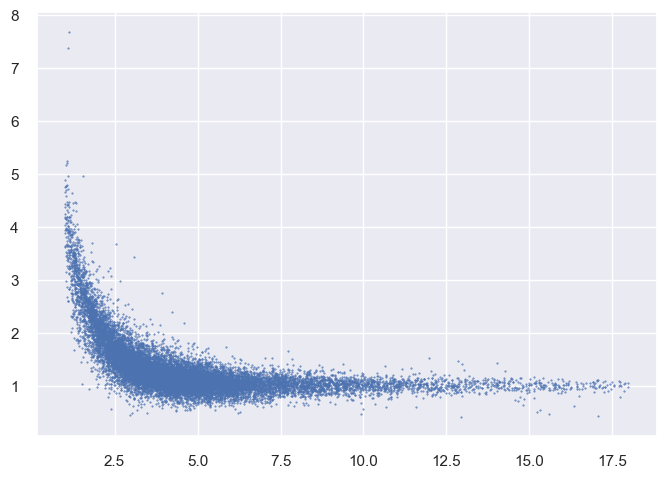

In [1058]:


plt.scatter(match_cat_xc_all['q_true'][(match_cat_xc_all.q_true>1) & (match_cat_xc_all.q_true<18)],
            match_cat_xc_all['q_nemo_over_q_true'][(match_cat_xc_all.q_true>1) & (match_cat_xc_all.q_true<18)],
            s=0.2)
# plt.ylim(0.9,1.5)
# plt.xlim(4,18)


### bin the data -- Nemo vs Truth

In [1059]:
q_true_bin_edges = np.linspace(1,18,30)
q_true_bin_intervals = pd.IntervalIndex.from_breaks(q_true_bin_edges)
match_cat_xc_all['q_true_bin'] = pd.cut(match_cat_xc_all['q_true'][(match_cat_xc_all.q_true>1) & (match_cat_xc_all.q_true<18)], 
                                          q_true_bin_edges,labels=False)
match_cat_xc_all['q_true_bin'] = match_cat_xc_all['q_true_bin'].fillna(-1).astype(int)

In [1060]:
# Group the DataFrame by the 'x_bin' column
groups = match_cat_xc_all.groupby('q_true_bin')

In [1061]:
mean_q_nemo_over_q_true_in_each_bin = groups['q_nemo_over_q_true'].median()
std_q_nemo_over_q_true_in_each_bin = groups['q_nemo_over_q_true'].std()/np.sqrt(groups['q_nemo_over_q_true'].count())


In [1062]:
# mean_q_nemo_over_q_true_in_each_bin

In [1063]:
groups['q_nemo_over_q_true'].count().sum()

15648

In [1064]:
bin_centers = [q_true_bin_intervals[i-1].mid for i in range(1,len(mean_q_nemo_over_q_true_in_each_bin.index))]
# bin_centers?

[2.27361561]


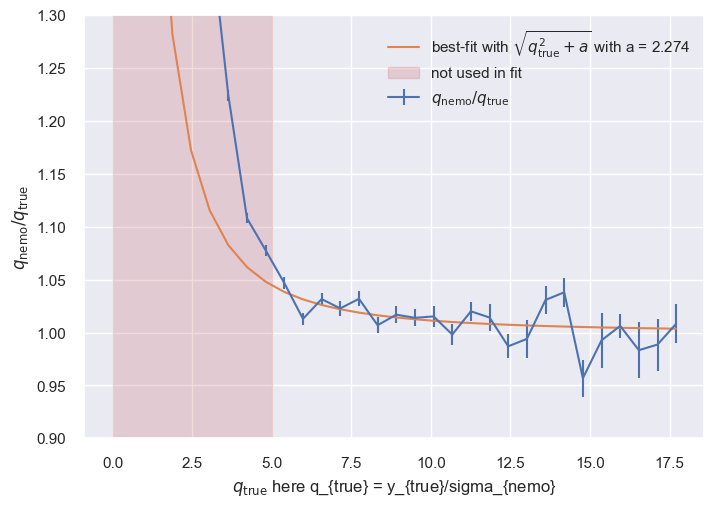

In [1073]:
plt.errorbar(bin_centers,mean_q_nemo_over_q_true_in_each_bin.values[1:],
             yerr = std_q_nemo_over_q_true_in_each_bin.values[1:], label=r'$q_\mathrm{nemo}/q_\mathrm{true}$')



def f(x,a):
    return np.sqrt(x**2+a)

xdata = np.asarray(bin_centers)
ydata = mean_q_nemo_over_q_true_in_each_bin.values[1:]
sigma=std_q_nemo_over_q_true_in_each_bin.values[1:]

qcut_fit = 5

import scipy
r = scipy.optimize.curve_fit(f,
                             xdata[xdata>qcut_fit],
                             ydata[xdata>qcut_fit]*xdata[xdata>qcut_fit],
                             sigma=sigma[xdata>qcut_fit]*xdata[xdata>qcut_fit],
                             bounds=(0,np.inf))
print(r[0])

plt.plot(xdata,f(xdata,r[0])/xdata,label=r'best-fit with $\sqrt{q_\mathrm{true}^2+a}$ with a = %.3f'%(r[0]))
plt.axvspan(0,qcut_fit,color='r',alpha=0.2,label='not used in fit')

residuals = f(xdata,r[0])[xdata>qcut_fit]-ydata[xdata>qcut_fit]*xdata[xdata>qcut_fit]


plt.ylim(0.9,1.3)

plt.xlabel(r'$q_\mathrm{true}$ here q_{true} = y_{true}/sigma_{nemo}')
plt.ylabel(r'$q_\mathrm{nemo}/q_\mathrm{true}$')
plt.legend()

In [1076]:
pcov = r[1]
perr = np.sqrt(np.diag(pcov))
print(perr)

[0.29222926]


Text(0, 0.5, 'residuals')

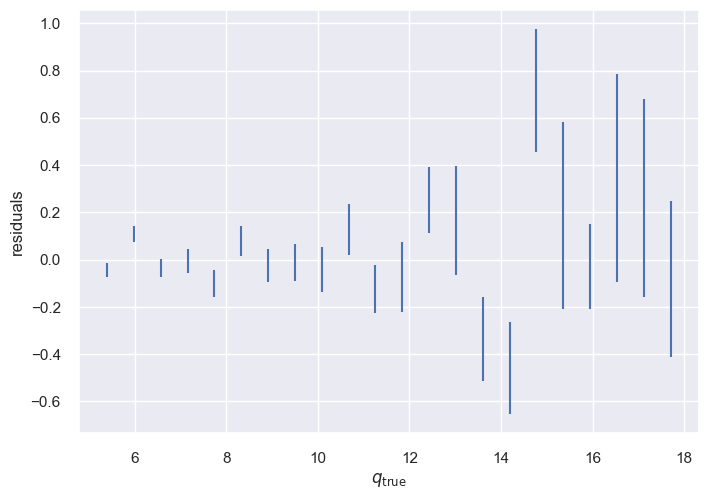

In [1066]:
eresiduals = sigma[xdata>qcut_fit]*xdata[xdata>qcut_fit]
x = xdata[xdata>qcut_fit]
plt.errorbar(xdata[xdata>qcut_fit],residuals,yerr = eresiduals,ls='None')
plt.xlabel(r'$q_\mathrm{true}$')
plt.ylabel(r'residuals')
# plt.legend()

In [1067]:
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata[xdata>qcut_fit]*xdata[xdata>qcut_fit]-np.mean(ydata[xdata>qcut_fit]*xdata[xdata>qcut_fit]))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)

0.9957889391422667


In [1068]:
# Chi-Square Goodness of Fit Test 
chi2 = np.sum((residuals/eresiduals)**2)
print(chi2)
dof = len(residuals)-1.
print(dof)
p_value = 1 - scs.chi2.cdf(chi2, df=dof)
print(p_value)

44.03249041173618
21.0
0.002315632838921333


In [1071]:
# Number of random numbers to generate
N = len(eresiduals)

# Generate N normally distributed random numbers
random_numbers = np.random.randn(N)

# Scale the random numbers based on the errors
gresiduals = random_numbers * eresiduals

In [1072]:
gresiduals
gchi2 = np.sum((gresiduals/eresiduals)**2)
print(gchi2)
dof = len(residuals)-1.
print(dof)
p_value = 1 - scs.chi2.cdf(gchi2, df=dof)
print(p_value)

22.73083736392467
21.0
0.3584957895632618


### forced versus truth

In [977]:
match_cat_xc_all['q_forced_over_q_true'] = match_cat_xc_all.q_forced/match_cat_xc_all.q_true

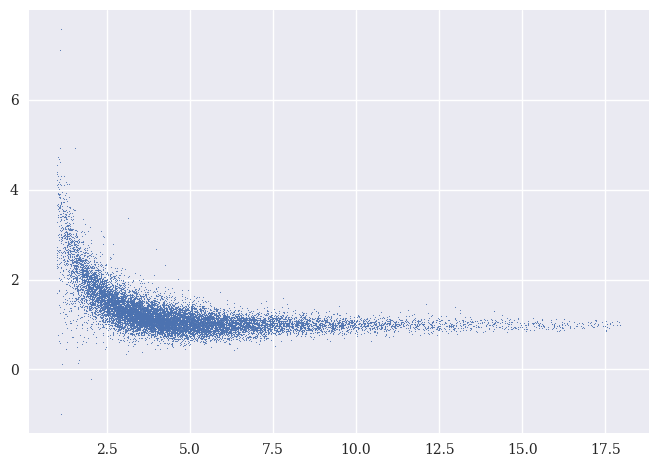

In [978]:


plt.scatter(match_cat_xc_all['q_true'][(match_cat_xc_all.q_true>1) & (match_cat_xc_all.q_true<18)],
            match_cat_xc_all['q_forced_over_q_true'][(match_cat_xc_all.q_true>1) & (match_cat_xc_all.q_true<18)],
            s=0.2)
# plt.ylim(0.9,1.5)
# plt.xlim(4,18)


In [979]:
q_true_bin_edges = np.linspace(1,18,30)
q_true_bin_intervals = pd.IntervalIndex.from_breaks(q_true_bin_edges)
match_cat_xc_all['q_true_bin'] = pd.cut(match_cat_xc_all['q_true'][(match_cat_xc_all.q_true>1) & (match_cat_xc_all.q_true<18)], 
                                          q_true_bin_edges,labels=False)
match_cat_xc_all['q_true_bin'] = match_cat_xc_all['q_true_bin'].fillna(-1).astype(int)

In [980]:
# Group the DataFrame by the 'x_bin' column
groups = match_cat_xc_all.groupby('q_true_bin')

In [984]:
mean_q_forced_over_q_true_in_each_bin = groups['q_forced_over_q_true'].median()
std_q_forced_over_q_true_in_each_bin = groups['q_forced_over_q_true'].std()/np.sqrt(groups['q_forced_over_q_true'].count())


In [985]:
# mean_q_nemo_over_q_true_in_each_bin

In [987]:
groups['q_forced_over_q_true'].count().sum()

15648

In [989]:
bin_centers = [q_true_bin_intervals[i-1].mid for i in range(1,len(mean_q_forced_over_q_true_in_each_bin.index))]
# bin_centers?

[4.12551131e-11]


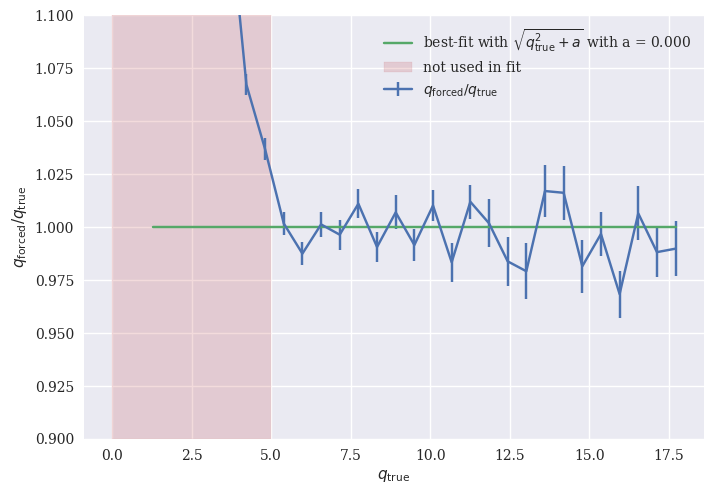

In [1006]:
plt.errorbar(bin_centers,mean_q_forced_over_q_true_in_each_bin.values[1:],
             yerr = std_q_forced_over_q_true_in_each_bin.values[1:], label=r'$q_\mathrm{forced}/q_\mathrm{true}$')



def f(x,a):
    return np.sqrt(x**2+a)

xdata = np.asarray(bin_centers)
ydata = mean_q_forced_over_q_true_in_each_bin.values[1:]
sigma=std_q_forced_over_q_true_in_each_bin.values[1:]

qcut_fit = 5

import scipy
r = scipy.optimize.curve_fit(f,
                             xdata[xdata>qcut_fit],
                             ydata[xdata>qcut_fit]*xdata[xdata>qcut_fit],
                             sigma=sigma[xdata>qcut_fit]*xdata[xdata>qcut_fit],
                             bounds=(0,np.inf))
print(r[0])

plt.plot(xdata,f(xdata,r[0])/xdata,label=r'best-fit with $\sqrt{q_\mathrm{true}^2+a}$ with a = %.3f'%(r[0]))
plt.axvspan(0,qcut_fit,color='r',alpha=0.2,label='not used in fit')

residuals = f(xdata,r[0])[xdata>qcut_fit]-ydata[xdata>qcut_fit]*xdata[xdata>qcut_fit]


plt.ylim(0.9,1.1)

plt.xlabel(r'$q_\mathrm{true}$')
plt.ylabel(r'$q_\mathrm{forced}/q_\mathrm{true}$')
plt.legend()

Text(0, 0.5, 'residuals')

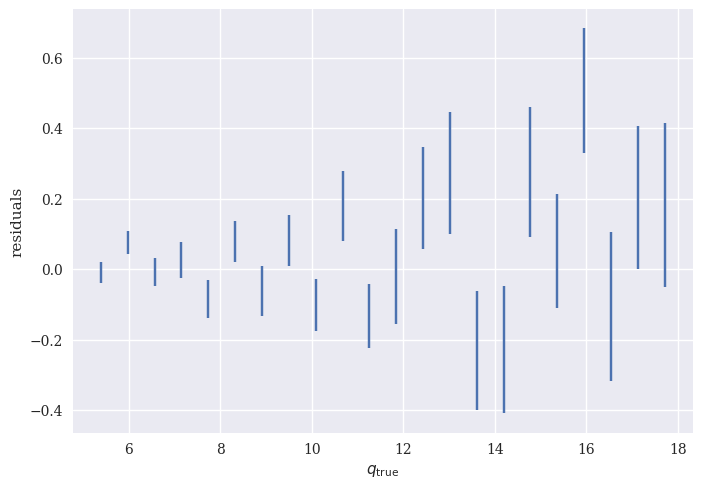

In [1007]:
eresiduals = sigma[xdata>qcut_fit]*xdata[xdata>qcut_fit]
x = xdata[xdata>qcut_fit]
plt.errorbar(xdata[xdata>qcut_fit],residuals,yerr = eresiduals,ls='None')
plt.xlabel(r'$q_\mathrm{true}$')
plt.ylabel(r'residuals')
# plt.legend()

In [1008]:
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata[xdata>qcut_fit]*xdata[xdata>qcut_fit]-np.mean(ydata[xdata>qcut_fit]*xdata[xdata>qcut_fit]))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)

0.9975390956393626


In [1010]:
# Chi-Square Goodness of Fit Test 
chi2 = np.sum((residuals/eresiduals)**2)
print(chi2)
dof = len(residuals)
print(dof)
p_value = 1 - scs.chi2.cdf(chi2, df=dof)
print(p_value)

39.520312202712994
22
0.012293448638737159


## compute theory prediction (obsolete)

In [1135]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl,plt
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [1078]:
%%time
from scipy import special, stats, interpolate, integrate
import os
import nemo as nm
from astropy.io import fits
#path_to_nemo_selfn_dir = '/Users/boris/Work/nemosimkit/sim-kit_NemoCCL_A10tSZ_DR5Atmos_ACT-DR5-2Pass_scatter_realisation2/NemoCCL_A10tSZ_DR5Atmos_ACT-DR5-2Pass_scatter_realisation2/selFn'
# path_to_nemo_selfn_dir = '/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/MFMF_WebSkyHalos_A10tSZ_3freq_tiles_pass2/MFMF_WebSkyHalos_A10tSZ_3freq_tiles_pass2/selFn'
# path_to_nemo_selfn_dir = '/Users/boris/Work/CLASS-SZ/SO-SZ/SOLikeT/soliket/clusters/data/advact/DR5CosmoSims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/selFn'
path_to_nemo_selfn_dir = '/Users/boris/NemoCCL_A10tSZ_DR5Atmos_ACT-DR5-largeRef-2Pass_1degTiles_realisation1/selFn/'

class self:
    datafile_Q = 'QFit.fits'
    data_directory = path_to_nemo_selfn_dir
    
    data = {
        'data_path': path_to_nemo_selfn_dir +'/../',
        'cat_file': "../NemoCCL_A10tSZ_DR5Atmos_ACT-DR5-largeRef-2Pass_1degTiles_realisation1_mass.fits",
        'Q_file': "QFit.fits",
        'tile_file': "tileAreas.txt",
        'rms_file': "RMSTab.fits"}
    selfunc = {
        'SNRcut': 5.,
        'method': 'SNRbased',
        'whichQ': 'fit',
        'resolution': 'downsample',
        'dwnsmpl_bins': 49,
        'save_dwsmpld': True,
        }
    datafile = data['cat_file']

catf = fits.open(os.path.join(self.data_directory, self.datafile))
data = catf[1].data
zcat = data.field("redshift")
qcat = data.field("fixed_SNR") #NB note that there are another SNR in the catalogue
cat_tsz_signal = data.field("fixed_y_c")
cat_tsz_signal_err = data.field("fixed_err_y_c")
cat_tile_name = data.field("tileName")

CPU times: user 20 ms, sys: 6.36 ms, total: 26.4 ms
Wall time: 45.8 ms


In [1079]:
zcat

array([1.345, 0.695, 0.255, ..., 0.865, 0.585, 0.685])

In [1080]:
qcat

array([5.67951271, 3.09649727, 5.59894557, ..., 4.34629524, 3.54997188,
       3.98339977])

In [1081]:
zerocat = qcat*0

In [1082]:
# szcat = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/SZ_cat.txt')

In [1084]:
szcat = np.dstack([zcat,zerocat,qcat])[0]
np.shape(szcat)

(15667, 3)

In [1088]:
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/SZ_cat_nemosimkit_r1_021123.txt',
           np.c_[zcat,zerocat,qcat])

In [1123]:
szcat = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/SZ_cat_nemosimkit_r1_021123.txt')
np.shape(szcat)

(15667, 3)

In [1124]:
np.shape(szcat)

(15667, 3)

In [1125]:
import pandas as pd
df_szcat = pd.DataFrame(szcat)

In [1126]:
df_szcat

,0,1,2
0,1.345,0.0,5.679513
1,0.695,0.0,3.096497
2,0.255,0.0,5.598946
3,1.615,0.0,2.702485
4,0.295,0.0,6.830799
...,...,...,...
15662,0.325,0.0,8.580643
15663,0.105,0.0,8.910557
15664,0.865,0.0,4.346295
15665,0.585,0.0,3.549972


In [1128]:
new_column_labels = ['z','na','q_nemo']
df_szcat.set_axis(new_column_labels, axis=1, inplace=True)

/var/folders/h0/4_tf3pcn1h32ks9grh325v400000gn/T/ipykernel_72827/334723819.py:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_szcat.set_axis(new_column_labels, axis=1, inplace=True)


In [1131]:
df_szcat.drop('na',axis=1,inplace=True)

array([[<AxesSubplot: title={'center': 'z'}>,
        <AxesSubplot: title={'center': 'q_nemo'}>]], dtype=object)

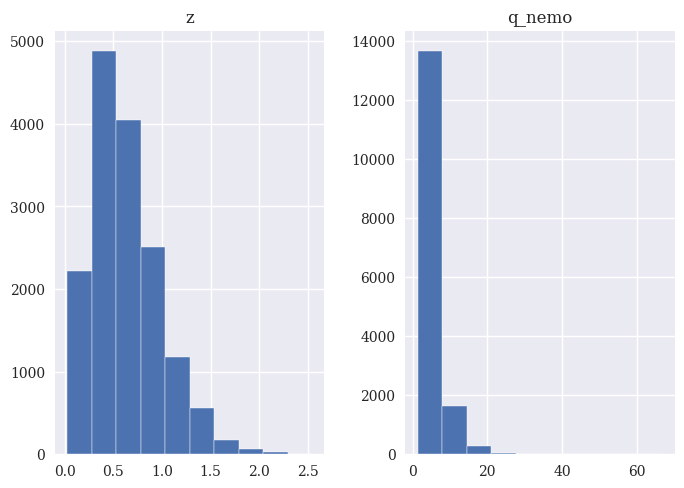

In [1136]:
df_szcat.hist()

<AxesSubplot: >

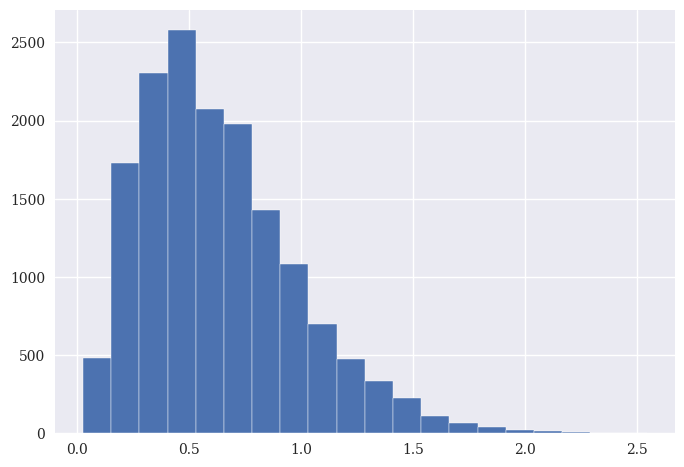

In [1138]:
df_szcat['z'].hist(bins=20)

<AxesSubplot: >

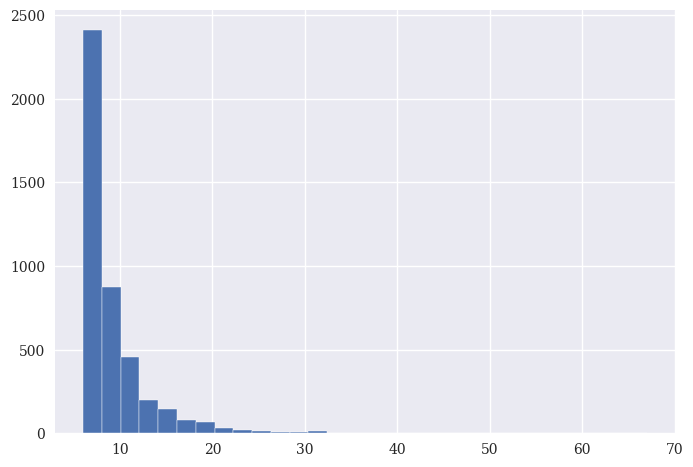

In [1141]:
df_szcat['q_nemo'][df_szcat['q_nemo']>6.].hist(bins=30)

In [1142]:
%%time
from scipy import special, stats, interpolate, integrate
import os
import nemo as nm
from astropy.io import fits
#path_to_nemo_selfn_dir = '/Users/boris/Work/nemosimkit/sim-kit_NemoCCL_A10tSZ_DR5Atmos_ACT-DR5-2Pass_scatter_realisation2/NemoCCL_A10tSZ_DR5Atmos_ACT-DR5-2Pass_scatter_realisation2/selFn'
# path_to_nemo_selfn_dir = '/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/MFMF_WebSkyHalos_A10tSZ_3freq_tiles_pass2/MFMF_WebSkyHalos_A10tSZ_3freq_tiles_pass2/selFn'
path_to_nemo_selfn_dir = '/Users/boris/NemoCCL_A10tSZ_DR5Atmos_ACT-DR5-largeRef-2Pass_1degTiles_realisation1/selFn/'

class self:
    datafile_Q = 'QFit.fits'
    data_directory = path_to_nemo_selfn_dir
    data = {
        'data_path': path_to_nemo_selfn_dir +'/../',
        # 'cat_file': "NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_mass.fits",
        'Q_file': "QFit.fits",
        'tile_file': "tileAreas.txt",
        'rms_file': "RMSTab.fits"}
    selfunc = {
        'SNRcut': 5.,
        'method': 'SNRbased',
        'whichQ': 'fit',
        'resolution': 'downsample',
        'dwnsmpl_bins': 49,
        'save_dwsmpld': True,
        }
filename_Q, ext = os.path.splitext(self.datafile_Q)


self.datafile_rms = self.data['rms_file']
self.datafile_Q = self.data['Q_file']
self.datafile_tile = self.data['tile_file']

list = fits.open(os.path.join(self.data_directory, self.datafile_rms))
file_rms = list[1].data
# self.log.info("Reading in full Q function.")
tile_info = np.genfromtxt(os.path.join(self.data_directory, self.data['tile_file']), dtype=str)

# removing tiles with zero areas
tile_area0 = tile_info[:, 1]
zero_index = np.where(tile_area0 == '0.000000')[0]
tile_area = np.delete(tile_info, zero_index, 0)

tile_name = tile_area[:, 0]
QFit = nm.signals.QFit(QFitFileName=os.path.join(self.data_directory, self.datafile_Q),
                       tileNames=tile_name, QSource=self.selfunc['whichQ'], selFnDir=self.data_directory+'/selFn')
Nt = len(tile_name)
# self.log.info("Number of tiles = {}.".format(Nt))
self.tname = file_rms['tileName']

hdulist = fits.open(os.path.join(self.data_directory, self.datafile_Q))
data = hdulist[1].data
tt500 = data.field("theta500Arcmin")

# reading in all Q functions
allQ = np.zeros((len(tt500), Nt))
for i in range(Nt):
    allQ[:, i] = QFit.getQ(tt500, tileName=tile_name[i])
assert len(tt500) == len(allQ[:, 0])
self.tt500 = tt500
self.Q = allQ

filename_rms, ext = os.path.splitext(self.datafile_rms)
filename_tile, ext = os.path.splitext(self.datafile_tile)
datafile_Q_dwsmpld = os.path.join(self.data_directory,
    filename_Q + 'dwsmpld_nbins={}'.format(self.selfunc['dwnsmpl_bins']) + '.npz')
datafile_rms_dwsmpld = os.path.join(self.data_directory,
        filename_rms + 'dwsmpld_nbins={}'.format(self.selfunc['dwnsmpl_bins']) + '.npz')
datafile_tiles_dwsmpld = os.path.join(self.data_directory,
        filename_tile + 'dwsmpld_nbins={}'.format(self.selfunc['dwnsmpl_bins']) + '.npy')

self.noise = file_rms['y0RMS']
self.skyfracs = file_rms['areaDeg2'] * np.deg2rad(1.) ** 2
# self.log.info("Number of RMS values = {}.".format(self.skyfracs.size))
# self.log.info("Down-sampling RMS and Q function using {} bins.".format(self.selfunc['dwnsmpl_bins']))
binned_stat = stats.binned_statistic(self.noise, self.skyfracs, statistic='sum',
                                           bins=self.selfunc['dwnsmpl_bins'])
binned_area = binned_stat[0]
binned_rms_edges = binned_stat[1]

bin_ind = np.digitize(self.noise, binned_rms_edges)
tiledict = dict(zip(tile_name, np.arange(tile_area[:, 0].shape[0])))

Qdwnsmpld = np.zeros((self.Q.shape[0], self.selfunc['dwnsmpl_bins']))
tiles_dwnsmpld = {}

for i in range(self.selfunc['dwnsmpl_bins']):
    tempind = np.where(bin_ind == i + 1)[0]
    if len(tempind) == 0:
        #self.log.info('Found empty bin.')
        Qdwnsmpld[:, i] = np.zeros(self.Q.shape[0])
    else:
        #print('dowsampled rms bin ',i)
        temparea = self.skyfracs[tempind]
        #print('areas of tiles in bin',temparea)
        temptiles = self.tname[tempind]
        #print('names of tiles in bin',temptiles)
        for t in temptiles:
            tiles_dwnsmpld[t] = i

        test = [tiledict[key] for key in temptiles]
        Qdwnsmpld[:, i] = np.average(self.Q[:, test], axis=1, weights=temparea)

self.noise = 0.5*(binned_rms_edges[:-1] + binned_rms_edges[1:])
self.skyfracs = binned_area
self.Q = Qdwnsmpld
self.tiles_dwnsmpld = tiles_dwnsmpld

# self.log.info("Number of down-sampled RMS = {}.".format(self.skyfracs.size))
# self.log.info("Number of down-sampled Q funcs = {}.".format(len(self.Q[0])))

assert self.noise.shape[0] == self.skyfracs.shape[0] and self.noise.shape[0] == self.Q.shape[1]


np.savez(datafile_Q_dwsmpld, Q_dwsmpld=Qdwnsmpld, tt500=self.tt500)
np.savez(datafile_rms_dwsmpld, noise=self.noise, skyfracs=self.skyfracs)
np.save(datafile_tiles_dwsmpld, self.tiles_dwnsmpld)


CPU times: user 10.6 s, sys: 247 ms, total: 10.8 s
Wall time: 10.9 s


In [1143]:
rad_in_deg2 = (np.deg2rad(1.))**2.
datafile_Q_dwsmpld = path_to_nemo_selfn_dir+'/QFitdwsmpld_nbins=49.npz'
Qfile = np.load(datafile_Q_dwsmpld)
allQ = Qfile['Q_dwsmpld']
tt500 = Qfile['tt500']

datafile_rms_dwsmpld = path_to_nemo_selfn_dir+'/RMSTabdwsmpld_nbins=49.npz'
rms = np.load(datafile_rms_dwsmpld)
noise = rms['noise']
skyfracs = rms['skyfracs']

In [1144]:
path_to_save = '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/'
np.savetxt(path_to_save+'nemo_sim_skyfracs_021123_49bins.txt',np.c_[skyfracs/rad_in_deg2/41253.])
so_skyfracs = np.loadtxt(path_to_save+'nemo_sim_skyfracs_021123_49bins.txt')
so_ylims = []
for index_thetas in range(tt500.size):
    for id_patches in range(so_skyfracs.size):
        allQ[allQ==0] = 1e-100
        so_ylims.append(noise[id_patches]/allQ[index_thetas,id_patches])
so_ylims = np.asarray(so_ylims)
np.savetxt(path_to_save+'nemo_sim_ylims_021123_49bins.txt',np.c_[so_ylims])
np.savetxt(path_to_save+'nemo_sim_thetas_021123_49bins.txt',np.c_[tt500])

In [1274]:
wsim = np.sum(so_skyfracs)

Use simkit config:
```
B0: 0.08
CMBSource: 76523
H0: 68.0
Mpivot: 425000000000000.0
Ob0: 0.049
Om0: 0.31
applyPoissonScatter: false
delta: 200
haloCatalog: Nemo
lKnee:
  f090: 2000
  f150: 3000
massFunction: Tinker08
minM500c: 100000000000000.0
nodes: 5
noiseSource: /home/mhilton/lustre/ACT-DR5-clusters/maps/act_dr5.01_s08s18_AA_$BAND_daynight_ivar.fits
ns: 0.965
outputLabel: NemoCCL_A10tSZ_DR5Atmos_ACT-DR5-largeRef-2Pass_1degTiles_realisation1
relativisticCorrection: false
rhoType: critical
sigma8: 0.81
sigma_int: 0.0
templateNemoConfig: templates/ACT-DR5-largeRef-2Pass_1degTiles.yml
tenToA0: 4.0e-05
transferFunction: boltzmann_camb
truthCatalogSeed: 35129
```

In [1439]:
%%time
from classy_sz import Class

M = Class()

M.set({
'output': 'sz_cluster_counts,m500c_to_m200c,m200c_to_m500',

'mass function'  : 'T08M200c',
'concentration parameter' : 'B13',
    
    
    
'Omega_b': 0.049,
'Omega_cdm':  0.31-0.049,
'H0': 67.66,
'sigma8': 0.81,
'tau_reio':  0.0561, ## doesnt matter 
'n_s': 0.965,
    
    
'B':1.,
    
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.0,
'T_ncdm' : 0.71611,
    
'z_min': 0.,
'z_max': 2.02,
'redshift_epsrel': 1e-6,
'redshift_epsabs': 1e-100,    
    

    
'M_min': 0.9488346486646685e14,#1.13992147e+14,#0.9488346486646685e14, 
'M_max': 18.99775950097109e14,
'mass_epsrel':1e-6,
'mass_epsabs':1e-100,
# 'ndim_redshifts':200, 
'ndim_redshifts' :500,
# 'ndim_masses' : 200,
'n_m_dndlnM' : 500,
'n_z_dndlnM' : 500,

# 'm_pivot_ym_[Msun]': 3e14,  
    
'has_selection_function' : 1,
'experiment' : 1, # Planck: 0 / ACT or SO: 1
'y_m_relation' : 1, # ycenter : 1, # y500 : 0
'signal-to-noise_cut-off_for_survey_cluster_completeness' : 5.,

'sz_selection_function_thetas_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_thetas_021123_49bins.txt',
'sz_selection_function_skyfracs_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_skyfracs_021123_49bins.txt',
'sz_selection_function_ylims_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_ylims_021123_49bins.txt',    


'bin_z_min_cluster_counts' : 0.01,
'bin_z_max_cluster_counts' : 2.01,
'bin_dz_cluster_counts' : 0.1,

'bin_dlog10_snr' : 0.25,
'log10_snr_min' : 0.6,#np.log10(5.),
'log10_snr_max' : 2.,
# 'bin_dlog10_snr' : 0.25,
# 'log10_snr_min' : np.log10(5.),
# 'log10_snr_max' : 2.,



'dlny' : 0.05,
'lnymin' : -20., # planck  -11.5 so/act -11
'lnymax' : 10.,  # planck 10. so/act -5
'dlnM_cluster_count_completeness_grid' : 0.005,


'cluster_count_completeness_grid_z_cutoff_low' : 0.4,
'cluster_count_completeness_grid_z_cutoff_mid' : 1.,

'dz_cluster_count_completeness_grid_low_z' : 1e-3,
'dz_cluster_count_completeness_grid_mid_z' : 1e-2,
'dz_cluster_count_completeness_grid_high_z' : 1e-1,



'mass_epsrel_cluster_counts' : 1e-6,
'mass_epsabs_cluster_counts' : 1e-40,

'redshift_epsrel_cluster_counts' : 1e-6,
'redshift_epsabs_cluster_counts' : 1e-40,

    
'A_ym'  : 4e-05,
'B_ym'  : 0.08,
'C_ym' : 0.,
'sigmaM_ym' : 0.,
# 'sigmaM_ym' :0.,
'm_pivot_ym_[Msun]' : 4.25e14,

'use_m500c_in_ym_relation' : 0,
'use_m200c_in_ym_relation' : 1,
'use_planck_binned_proba' : 0, #use diff of erfs
'use_skyaveraged_noise': 0, # this will speed-up everything

'szcc_dof': 2.27361561, #2.27361561
'szcc_qtrunc': 0.,
    
'HMF_prescription_NCDM': 1,
'no_spline_in_tinker': 1,
        })
        
# M.compute_class_szfast()
M.compute()


CPU times: user 3min 33s, sys: 737 ms, total: 3min 33s
Wall time: 26.4 s


In [1440]:
M.Neff()

3.0459982214534222

In [1442]:
dNdzdy_theoretical = M.dndzdy_theoretical()['dndzdy']
z_center = M.dndzdy_theoretical()['z_center']
z_edges = M.dndzdy_theoretical()['z_edges']
log10y_center = M.dndzdy_theoretical()['log10y_center']
log10y_edges = M.dndzdy_theoretical()['log10y_edges']

N_z,N_y = np.shape(dNdzdy_theoretical)
N_clusters_z_theory = []
for iz in range(N_z):
    N_clusters_z_theory.append(np.sum(dNdzdy_theoretical[iz][0:]))
N_clusters_y_theory = []

for iy in range(N_y):
    N_clusters_y_theory.append(np.sum(np.asarray(dNdzdy_theoretical)[:,iy]))
    
# print total number of clusters: 
np.sum(N_clusters_z_theory)

7767.69278847743

In [1443]:
z_edges

[0.010000000000000002,
 0.11,
 0.21000000000000002,
 0.31000000000000005,
 0.41000000000000003,
 0.51,
 0.61,
 0.71,
 0.81,
 0.91,
 1.01,
 1.11,
 1.21,
 1.31,
 1.4100000000000001,
 1.51,
 1.61,
 1.71,
 1.81,
 1.9100000000000001]

In [1444]:
z_bin_edges = z_edges
z_bin_intervals = pd.IntervalIndex.from_breaks(z_bin_edges)
# df_szcat['z_bin'] = pd.cut(df_szcat['z'][(df_szcat.z>z_edges[0]) & (df_szcat.z<z_edges[-1])], 
#                                           z_bin_edges,labels=False)
df_szcat['z_bin'] = pd.cut(df_szcat['z'][(df_szcat.q_nemo>5)], 
                                          z_bin_edges,labels=False)

df_szcat['z_bin'] = df_szcat['z_bin'].fillna(-1).astype(int)

In [1445]:
df_szcat

,z,q_nemo,z_bin
0,1.345,5.679513,13
1,0.695,3.096497,-1
2,0.255,5.598946,2
3,1.615,2.702485,-1
4,0.295,6.830799,2
...,...,...,...
15662,0.325,8.580643,3
15663,0.105,8.910557,0
15664,0.865,4.346295,-1
15665,0.585,3.549972,-1


In [1446]:
# Group the DataFrame by the 'x_bin' column
groups = df_szcat.groupby('z_bin')

In [1447]:
# mean_q_nemo_over_q_true_in_each_bin = groups['q_nemo_over_q_true'].median()
# std_q_nemo_over_q_true_in_each_bin = groups['q_nemo_over_q_true'].std()/np.sqrt(groups['q_nemo_over_q_true'].count())


In [1448]:
# mean_q_nemo_over_q_true_in_each_bin

In [1449]:
szcounts = groups['z_bin'].count()

In [1450]:
szcounts[1:].sum()

7036

In [1451]:
bin_centers = [z_bin_intervals[i-1].mid for i in range(1,len(szcounts.index))]
# bin_centers?

In [1452]:
bin_centers

[0.06,
 0.16,
 0.26,
 0.36000000000000004,
 0.46,
 0.56,
 0.6599999999999999,
 0.76,
 0.8600000000000001,
 0.96,
 1.06,
 1.1600000000000001,
 1.26,
 1.36,
 1.46,
 1.56,
 1.6600000000000001,
 1.76,
 1.86]

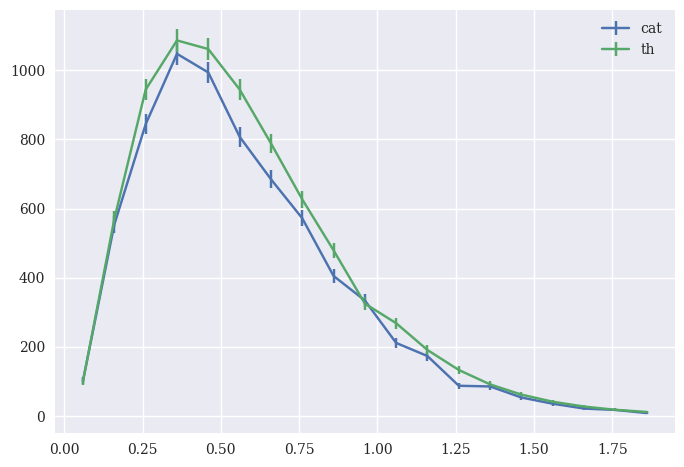

In [1453]:
plt.errorbar(bin_centers,szcounts[1:],yerr = np.sqrt(szcounts[1:]),label='cat')
plt.errorbar(bin_centers,N_clusters_z_theory,
             yerr = np.sqrt(N_clusters_z_theory),label='th')
plt.legend()

In [1454]:
'%.5e'%100000000000000.0

'1.00000e+14'

In [1455]:
M.get_dndlnM_at_z_and_M(0.2,2e14)

8.195387269177203e-06

<AxesSubplot: >

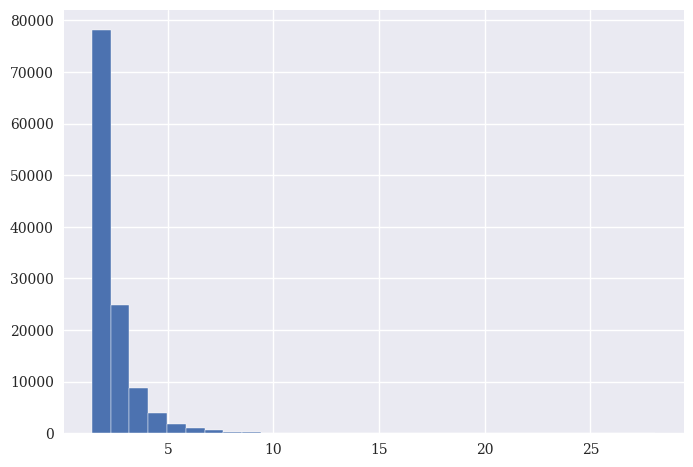

In [1456]:
cat_df_truth['m200c'].hist(bins=30)

In [1457]:
M.h()

0.6766

In [1458]:
# z_bin_edges
# cat_df_truth
mmin = 1e14
cat_df_truth['M200c'] = cat_df_truth['m200c']*1e14*M.h()
# cat_df_truth['z_bin'] = pd.cut(cat_df_truth['z'][(cat_df_truth.M200c>mmin)], 
#                                                   z_bin_edges,labels=False)
# cat_df_truth['z_bin'] = cat_df_truth['z_bin'].fillna(-1).astype(int)
# groups = cat_df_truth.groupby('z_bin')
# dndz_sim = groups['z_bin'].count()

In [1459]:
z_min = min(z_edges)
z_max = max(z_edges)


m200_min = cat_df_truth['M200c'].values.min() # but the catalogu is not complete at very low mass... so need to cut there: 1.13992147e+14 
m200_max = cat_df_truth['M200c'].values.max()
m_edges = np.linspace(np.log(m200_min),np.log(m200_max),50)
m_center = (m_edges[:-1] + m_edges[1:])/2.

In [1460]:
m200_min/1e14,m200_max/1e14

(0.9488346486646685, 18.99775950097109)

In [1461]:
nms = 5000
nzs = 5000
lnms = np.linspace(np.log(m200_min*1.000001),np.log(m200_max*0.99999),nms)
zs = np.linspace(z_min,z_max,nzs)
dndmdz = np.zeros((nms,nzs))
for (im,mm) in enumerate(lnms):
    dndmdz[im,:] = wsim*np.vectorize(M.get_volume_dVdzdOmega_at_z)(zs)*np.vectorize(M.get_dndlnM_at_z_and_M)(zs,np.exp(mm))

In [1462]:
# integrate over massses at each z:
filter_bin = (lnms>np.log(m200_min))
dndz = np.trapz(dndmdz[filter_bin],x=lnms[filter_bin],axis=0)
nz = np.zeros((len(z_center)))

for (iz,zz) in enumerate(z_center): 
    filter_bin = (zs>z_edges[iz]) & (zs<z_edges[iz+1])
    nz[iz] = 4.*np.pi*np.trapz(dndz[filter_bin],x=zs[filter_bin] )

    
# integrate over zs at each m:
# filter_bin = (lnms>np.log(1e15*h))
dndm = np.trapz(dndmdz,x=zs,axis=1)
nm = np.zeros((len(m_center)))

for (im,mm) in enumerate(m_center): 
    filter_bin = (lnms>m_edges[im]) & (lnms<m_edges[im+1])
    nm[im] = 4.*np.pi*np.trapz(dndm[filter_bin],x=lnms[filter_bin] )

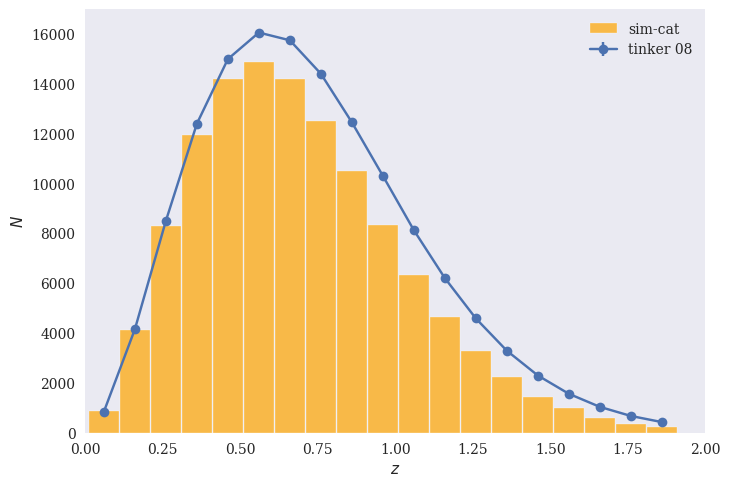

In [1466]:
filter_bin = cat_df_truth['M200c'].values > m200_min
M200_truthcat = cat_df_truth['M200c'][filter_bin]
z_truthcat = cat_df_truth['z'][filter_bin]
N_clusters_z_truthcat, xedges_truthcat = np.histogram(z_truthcat, bins=z_edges)

n, bins, patches = plt.hist(x=np.repeat(z_center,
                                        N_clusters_z_truthcat), 
                            bins=z_edges, 
                            color='orange',
                            alpha=0.7, 
                            rwidth=0.95,
                            label='sim-cat')
plt.errorbar(z_center,nz,yerr=np.sqrt(nz),label='tinker 08',marker='o')

plt.grid()
plt.xlim(0,2.)
plt.legend(loc=1)
plt.xlabel(r'$z$')
plt.ylabel(r'$N$')
plt.yscale('linear')
plt.show()

<ErrorbarContainer object of 3 artists>

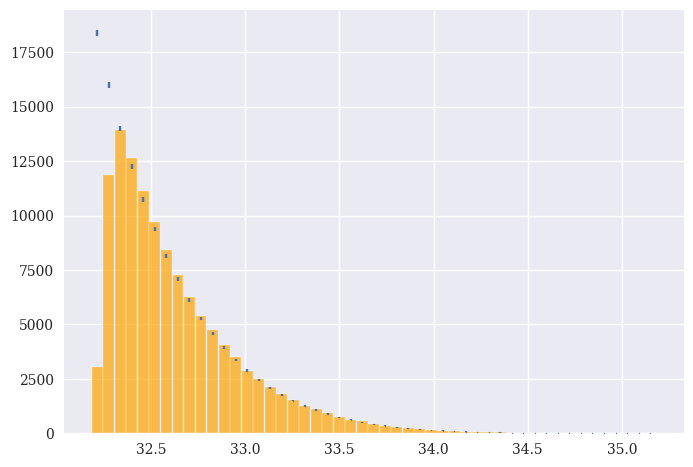

In [1467]:
N_clusters_m_truthcat, xedges_truthcat = np.histogram(np.log(M200_truthcat), bins=m_edges)
n, bins, patches = plt.hist(x=np.repeat(m_center,
                                        N_clusters_m_truthcat), 
                            bins=m_edges, 
                            color='orange',
                            alpha=0.7, 
                            rwidth=0.95,
                            label='sim-cat')
plt.errorbar(m_center,nm,yerr=np.sqrt(nm),label='tinker 08',marker='o',markersize=1,ls='None')

In [ ]:
M.get_m200c_to_m500c_at_z_and_M

In [ ]:
M.get_y_at_m_and_z(

In [1468]:
M.T_cmb()

2.7255

# Illustrating effect of sigma8 on act counts

In [2]:
%%time
from classy_sz import Class

CPU times: user 14 µs, sys: 3 µs, total: 17 µs
Wall time: 21.9 µs


In [12]:
%%time
M = Class()

M.set({
'output': 'sz_cluster_counts,m500c_to_m200c,m200c_to_m500',

'mass function'  : 'T08M200c',
'concentration parameter' : 'B13',
    
    
    
'Omega_b': 0.049,
'Omega_cdm':  0.31-0.049,
'H0': 67.66,
'sigma8': 0.81,
'tau_reio':  0.0561, ## doesnt matter 
'n_s': 0.965,
    
    
'B':1.,
    
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.0,
'T_ncdm' : 0.71611,
    
'z_min': 0.,
'z_max': 2.02,
'redshift_epsrel': 1e-6,
'redshift_epsabs': 1e-100,    
    

    
'M_min': 0.9488346486646685e14,#1.13992147e+14,#0.9488346486646685e14, 
'M_max': 18.99775950097109e14,
'mass_epsrel':1e-6,
'mass_epsabs':1e-100,
# 'ndim_redshifts':200, 
'ndim_redshifts' :100,
# 'ndim_masses' : 200,
'n_m_dndlnM' : 100,
'n_z_dndlnM' : 100,

# 'm_pivot_ym_[Msun]': 3e14,  
    
'has_selection_function' : 1,
'experiment' : 1, # Planck: 0 / ACT or SO: 1
'y_m_relation' : 1, # ycenter : 1, # y500 : 0
'signal-to-noise_cut-off_for_survey_cluster_completeness' : 5.,

'sz_selection_function_thetas_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_thetas_021123_49bins.txt',
'sz_selection_function_skyfracs_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_skyfracs_021123_49bins.txt',
'sz_selection_function_ylims_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/nemo_sim_ylims_021123_49bins.txt',    


'bin_z_min_cluster_counts' : 0.01,
'bin_z_max_cluster_counts' : 2.01,
'bin_dz_cluster_counts' : 0.1,

'bin_dlog10_snr' : 0.25,
'log10_snr_min' : 0.6,#np.log10(5.),
'log10_snr_max' : 2.,
# 'bin_dlog10_snr' : 0.25,
# 'log10_snr_min' : np.log10(5.),
# 'log10_snr_max' : 2.,



'dlny' : 0.05,
'lnymin' : -20., # planck  -11.5 so/act -11
'lnymax' : 10.,  # planck 10. so/act -5
'dlnM_cluster_count_completeness_grid' : 0.01,


'cluster_count_completeness_grid_z_cutoff_low' : 0.4,
'cluster_count_completeness_grid_z_cutoff_mid' : 1.,

'dz_cluster_count_completeness_grid_low_z' : 1e-3,
'dz_cluster_count_completeness_grid_mid_z' : 1e-2,
'dz_cluster_count_completeness_grid_high_z' : 1e-1,



'mass_epsrel_cluster_counts' : 1e-6,
'mass_epsabs_cluster_counts' : 1e-40,

'redshift_epsrel_cluster_counts' : 1e-6,
'redshift_epsabs_cluster_counts' : 1e-40,

    
'A_ym'  : 4e-05,
'B_ym'  : 0.08,
'C_ym' : 0.,
'sigmaM_ym' : 0.,
# 'sigmaM_ym' :0.,
'm_pivot_ym_[Msun]' : 4.25e14,

'use_m500c_in_ym_relation' : 0,
'use_m200c_in_ym_relation' : 1,
'use_planck_binned_proba' : 0, #use diff of erfs
'use_skyaveraged_noise': 0, # this will speed-up everything

'szcc_dof': 2.27361561, #2.27361561
'szcc_qtrunc': 0.,
    
'HMF_prescription_NCDM': 1,
'no_spline_in_tinker': 1,
        })
        
M.compute_class_szfast()
# M.compute()

CPU times: user 1min 6s, sys: 358 ms, total: 1min 6s
Wall time: 11.5 s


In [13]:
M.Neff()

3.0459982214534222

In [14]:
import numpy as np
dNdzdy_theoretical = M.dndzdy_theoretical()['dndzdy']
z_center = M.dndzdy_theoretical()['z_center']
z_edges = M.dndzdy_theoretical()['z_edges']
log10y_center = M.dndzdy_theoretical()['log10y_center']
log10y_edges = M.dndzdy_theoretical()['log10y_edges']

N_z,N_y = np.shape(dNdzdy_theoretical)
N_clusters_z_theory = []
for iz in range(N_z):
    N_clusters_z_theory.append(np.sum(dNdzdy_theoretical[iz][0:]))
N_clusters_y_theory = []

for iy in range(N_y):
    N_clusters_y_theory.append(np.sum(np.asarray(dNdzdy_theoretical)[:,iy]))
    
# print total number of clusters: 
np.sum(N_clusters_z_theory)

7760.9676587089225

# ACT benchmarking (feb 24)

In [6]:
# import nemo
# import yaml
from classy_sz import Class
# import pyccl
# import astropy.io.fits as pyfits
# from astLib import astWCS, astImages
# import nemo
# from nemo.maps import simCMBMap
# import pixell
# from pixell import reproject, utils, curvedsky
# from pixell.enplot import *
# from enlib import enplot
# import enlib
# def eshow(x,**kwargs): 
#     ''' Define a function to help us plot the maps neatly '''
#     plots = enplot.get_plots(x, **kwargs)
#     enplot.show(plots, method = "ipython")
# from astropy.io import fits

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import scipy
# from scipy.interpolate import interp1d
from astropy.io import fits
import os
# import healpy as hp

### noiseless data vector

In [11]:
# data_directory = '/Users/boris/ACTSZPhil24/data/'
hdulist = fits.open('/Users/boris/ACTSZPhil24/data/noiselessDataVector.fits')
data = hdulist[1].data

In [16]:
data

FITS_rec([('MOCK-CL J0000.6-2452', 1.58333333e-01, -24.88333333, 1.63903981, 1.09041357, 0.20372799, 0.77552342, 0., '1_17_1', 0.09316177, 0.22654058, 0.41123655),
          ('MOCK-CL J2144.1-0729', 3.26041667e+02,  -7.49166667, 1.47335643, 1.01244004, 0.12375466, 0.4591577 , 0., '1_26_1', 0.08709779, 0.26396534, 0.32995918),
          ('MOCK-CL J0545.0-5814', 8.62666667e+01, -58.25      , 1.28829825, 0.79858154, 0.3911285 , 1.58371996, 0., '1_1_0', 0.08274297, 0.22257434, 0.3717543 ),
          ...,
          ('MOCK-CL J0533.4-2256', 8.33666667e+01, -22.94166667, 1.82523678, 1.18379936, 0.30584736, 1.0189143 , 0., '1_18_0', 0.11407072, 0.20696329, 0.55116405),
          ('MOCK-CL J2127.1-3117', 3.21783333e+02, -31.3       , 1.00721265, 0.6919876 , 0.0887402 , 0.52410122, 0., '1_14_2', 0.04730938, 0.25082893, 0.18861215),
          ('MOCK-CL J0325.5+1326', 5.13750000e+01,  13.44166667, 1.19021639, 0.81108589, 0.1140455 , 0.5823355 , 0., '1_36_0', 0.05992454, 0.17557593, 0.34130272)],
 

In [13]:
zcat = data.field("redshift")
qcat = data.field("fixed_SNR") #NB note that there are another SNR in the catalogue
# cat_tsz_signal = data.field("fixed_y_c")
# cat_tsz_signal_err = data.field("fixed_err_y_c")
# cat_tile_name = data.field("tileName")

In [14]:
zcat

array([0.77552342, 0.4591577 , 1.58371996, ..., 1.0189143 , 0.52410122,
       0.5823355 ])

In [15]:
qcat

array([0.41123655, 0.32995918, 0.3717543 , ..., 0.55116405, 0.18861215,
       0.34130272])

### create selection function files for class_sz and cnc

In [17]:
%%time
from scipy import special, stats, interpolate, integrate
import os
import nemo as nm
from astropy.io import fits
#path_to_nemo_selfn_dir = '/Users/boris/Work/nemosimkit/sim-kit_NemoCCL_A10tSZ_DR5Atmos_ACT-DR5-2Pass_scatter_realisation2/NemoCCL_A10tSZ_DR5Atmos_ACT-DR5-2Pass_scatter_realisation2/selFn'
# path_to_nemo_selfn_dir = '/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/MFMF_WebSkyHalos_A10tSZ_3freq_tiles_pass2/MFMF_WebSkyHalos_A10tSZ_3freq_tiles_pass2/selFn'
path_to_nemo_selfn_dir = '/Users/boris/ACTSZPhil24/data/sim-kit_NemoCLASS-SZ_A10tSZ_DR5Atmos_fineTruthBins_tenToA0Tuned_ACT-DR5-2Pass_2degTiles_realisation1/sim-kit_NemoCLASS-SZ_A10tSZ_DR5Atmos_fineTruthBins_tenToA0Tuned_ACT-DR5-2Pass_2degTiles_realisation1/selFn'
class self:
    datafile_Q = 'QFit.fits'
    data_directory = path_to_nemo_selfn_dir
    data = {
        'data_path': path_to_nemo_selfn_dir +'/../',
        # 'cat_file': "NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_mass.fits",
        'Q_file': "QFit.fits",
        'tile_file': "tileAreas.txt",
        'rms_file': "RMSTab.fits"}
    selfunc = {
        'SNRcut': 5.,
        'method': 'SNRbased',
        'whichQ': 'fit',
        'resolution': 'downsample',
        'dwnsmpl_bins': 30,
        'save_dwsmpld': True,
        }
filename_Q, ext = os.path.splitext(self.datafile_Q)


self.datafile_rms = self.data['rms_file']
self.datafile_Q = self.data['Q_file']
self.datafile_tile = self.data['tile_file']

list = fits.open(os.path.join(self.data_directory, self.datafile_rms))
file_rms = list[1].data
# self.log.info("Reading in full Q function.")
tile_info = np.genfromtxt(os.path.join(self.data_directory, self.data['tile_file']), dtype=str)

# removing tiles with zero areas
tile_area0 = tile_info[:, 1]
zero_index = np.where(tile_area0 == '0.000000')[0]
tile_area = np.delete(tile_info, zero_index, 0)

tile_name = tile_area[:, 0]
QFit = nm.signals.QFit(QFitFileName=os.path.join(self.data_directory, self.datafile_Q),
                       tileNames=tile_name, QSource=self.selfunc['whichQ'], selFnDir=self.data_directory+'/selFn')
Nt = len(tile_name)
# self.log.info("Number of tiles = {}.".format(Nt))
self.tname = file_rms['tileName']

hdulist = fits.open(os.path.join(self.data_directory, self.datafile_Q))
data = hdulist[1].data
tt500 = data.field("theta500Arcmin")

# reading in all Q functions
allQ = np.zeros((len(tt500), Nt))
for i in range(Nt):
    allQ[:, i] = QFit.getQ(tt500, tileName=tile_name[i])
assert len(tt500) == len(allQ[:, 0])
self.tt500 = tt500
self.Q = allQ

filename_rms, ext = os.path.splitext(self.datafile_rms)
filename_tile, ext = os.path.splitext(self.datafile_tile)
datafile_Q_dwsmpld = os.path.join(self.data_directory,
    filename_Q + 'dwsmpld_nbins={}'.format(self.selfunc['dwnsmpl_bins']) + '.npz')
datafile_rms_dwsmpld = os.path.join(self.data_directory,
        filename_rms + 'dwsmpld_nbins={}'.format(self.selfunc['dwnsmpl_bins']) + '.npz')
datafile_tiles_dwsmpld = os.path.join(self.data_directory,
        filename_tile + 'dwsmpld_nbins={}'.format(self.selfunc['dwnsmpl_bins']) + '.npy')

self.noise = file_rms['y0RMS']
self.skyfracs = file_rms['areaDeg2'] * np.deg2rad(1.) ** 2
# self.log.info("Number of RMS values = {}.".format(self.skyfracs.size))
# self.log.info("Down-sampling RMS and Q function using {} bins.".format(self.selfunc['dwnsmpl_bins']))
binned_stat = stats.binned_statistic(self.noise, self.skyfracs, statistic='sum',
                                           bins=self.selfunc['dwnsmpl_bins'])
binned_area = binned_stat[0]
binned_rms_edges = binned_stat[1]

bin_ind = np.digitize(self.noise, binned_rms_edges)
tiledict = dict(zip(tile_name, np.arange(tile_area[:, 0].shape[0])))

Qdwnsmpld = np.zeros((self.Q.shape[0], self.selfunc['dwnsmpl_bins']))
tiles_dwnsmpld = {}

for i in range(self.selfunc['dwnsmpl_bins']):
    tempind = np.where(bin_ind == i + 1)[0]
    if len(tempind) == 0:
        #self.log.info('Found empty bin.')
        Qdwnsmpld[:, i] = np.zeros(self.Q.shape[0])
    else:
        #print('dowsampled rms bin ',i)
        temparea = self.skyfracs[tempind]
        #print('areas of tiles in bin',temparea)
        temptiles = self.tname[tempind]
        #print('names of tiles in bin',temptiles)
        for t in temptiles:
            tiles_dwnsmpld[t] = i

        test = [tiledict[key] for key in temptiles]
        Qdwnsmpld[:, i] = np.average(self.Q[:, test], axis=1, weights=temparea)

self.noise = 0.5*(binned_rms_edges[:-1] + binned_rms_edges[1:])
self.skyfracs = binned_area
self.Q = Qdwnsmpld
self.tiles_dwnsmpld = tiles_dwnsmpld

# self.log.info("Number of down-sampled RMS = {}.".format(self.skyfracs.size))
# self.log.info("Number of down-sampled Q funcs = {}.".format(len(self.Q[0])))

assert self.noise.shape[0] == self.skyfracs.shape[0] and self.noise.shape[0] == self.Q.shape[1]


np.savez(datafile_Q_dwsmpld, Q_dwsmpld=Qdwnsmpld, tt500=self.tt500)
np.savez(datafile_rms_dwsmpld, noise=self.noise, skyfracs=self.skyfracs)
np.save(datafile_tiles_dwsmpld, self.tiles_dwnsmpld)


ModuleNotFoundError: No module named 'pixell'